In [ ]:
### Content

# 1- Libraries
# 2- API Integration
# 3- Download the Files
# 4- Read the Files

# 5.2 ???

# 6- Exploratory Data Analysis
# 6.1- Statistical Analysis
# 6.2- Histograms
# 6.3- Distributions
# 6.4- Scatter-Plotting
# 6.5- Outliers Checking

# 7- Building Model-0 // Benchmark
# 7.1- Logistic Regression

# 8- Data Cleaning
# 8.1- Drop Outliers
# 8.1.1- Balance
# 8.1.2- EstimatedSalary
# 8.2- Standart Scaler
# 5.3 Drop Unnecessary Columns 


# 9- Building Alternative Models
# 9.1- Model 1 - Decision Trees
# 9.2- Model 2 - Random Forest
# 9.3- Model 3 - Gradient Boosting Machines
# 9.4- Model 4 - xgboost

# 10- Handling Imbalanced Data
# 11- Re-Train Best Performed Model with Balanced Dataset 

# 12- Feature Engineering
# 12.1 Correlation Test
# 12.2 Recursive Feature Elimination

# 13- Hyperparameter Tuning
# 13.1- Grid Search
# 13.2- Random Search

# 14- Cross Validation
# 15- Prediction

### 1- Libraries

In [35]:
### 1- Libraries

# Data Manipulation and Cleaning Libraries
import pandas as pd  # For data manipulation and data frames
import numpy as np  # For numerical operations and arrays

# File and System Operations Libraries
import os  # For operating system interactions, like file handling
import sys
import zipfile  # For working with zip files

# Dataset Access Libraries
from kaggle.api.kaggle_api_extended import KaggleApi  # For accessing datasets from Kaggle
from config import *  # Importing custom configurations
from model_eval_func import *  # Custom model evaluation functions

# Data Visualization Libraries
import seaborn as sns  # For advanced data visualization
from matplotlib import pyplot as plt  # For plotting graphs and charts
import matplotlib  # For customizing matplotlib settings

# Machine Learning Libraries

# Visible All Rows and Columns 
pd.set_option("display.max_rows", None, "display.max_columns", None)


### 2- API

In [2]:
# Specify the correct file paths
raw_data_directory = path_1
extracted_path     = path_2

In [3]:
# Kaggle API
api = KaggleApi()
api.authenticate()

competition = comp
api.competition_download_files(competition, path=raw_data_directory)


### 3- Download the Files

In [4]:
# Download the file
zip_file_path = os.path.join(raw_data_directory, 'sberbank-russian-housing-market.zip')  # Burada dosya adını doğru şekilde belirtin

# Extract the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(raw_data_directory)

print(f"Zip Files Saved...")

Zip Files Saved...


### 4- Read the Files

In [5]:
# Klasörün içindeki dosyaları listeleme
if os.path.exists(raw_data_directory) and os.path.isdir(raw_data_directory):
    files = os.listdir(raw_data_directory)
    print("Files in the Raw Folder:")
    print(" ")
    for file in files:
        print(file)
else:
    print("Belirtilen klasör yok veya bir dizin değil.")

Files in the Raw Folder:
 
data_dictionary.txt
extracted
macro.csv.zip
sample_submission.csv.zip
sberbank-russian-housing-market.zip
test.csv.zip
train.csv.zip


In [6]:
# Create a directory for the extracted files
os.makedirs(extracted_path, exist_ok=True)

# List files in the directory
files = os.listdir(path_1)

# Extract zip files
for file in files:
    if file.endswith('.zip'):
        file_path = os.path.join(path_1, file)
        
        # Open the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_path)

print("Extraction complete.")


Extraction complete.


In [7]:
# List files in the extracted directory
files = os.listdir(extracted_path)

print("Dataframes: ")
print("")

# Read only the test and train CSV files and save them as variables
for file in files:
    if file.endswith('.csv') and ('test' in file or 'train' in file):
        file_path = os.path.join(extracted_path, file)
        print(f"Reading file: {file}")
        
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"File does not exist: {file}")
            continue
        
        # Read the CSV file
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='latin1')
            except pd.errors.EmptyDataError:
                print(f"EmptyDataError: No columns to parse from file {file}")
                continue
            except Exception as e:
                print(f"Unexpected error while reading {file}: {e}")
                continue
        except pd.errors.EmptyDataError:
            print(f"EmptyDataError: No columns to parse from file {file}")
            continue
        except Exception as e:
            print(f"Unexpected error while reading {file}: {e}")
            continue

        # Determine variable name using the file name
        var_name = os.path.splitext(file)[0] + '_df'
        
        # Save the DataFrame using globals() function
        globals()[var_name] = df
        
        print(f"{var_name} saved...")

Dataframes: 

Reading file: test.csv
test_df saved...
Reading file: train.csv
train_df saved...


### 6- Save Original Data

In [23]:
# Combine dataframes
df = pd.concat([train_df, test_df])

In [24]:
# Copy the original dataframes
df_2 = df.copy()

### 6- Exploratory Data Analysis

In [ ]:
# Drop id column
df_2 = df_2.drop("id", axis=1)

In [43]:
# Check datatype and blanks
df_2.info(verbose=True, show_counts=True)
df_2.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 38133 entries, 0 to 7661
Data columns (total 291 columns):
 #    Column                                 Non-Null Count  Dtype  
---   ------                                 --------------  -----  
 0    timestamp                              38133 non-null  object 
 1    full_sq                                38133 non-null  float64
 2    life_sq                                30574 non-null  float64
 3    floor                                  37966 non-null  float64
 4    max_floor                              28561 non-null  float64
 5    material                               28561 non-null  float64
 6    build_year                             23479 non-null  float64
 7    num_room                               28561 non-null  float64
 8    kitch_sq                               28561 non-null  float64
 9    state                                  23880 non-null  float64
 10   product_type                           38100 non-null  object 

timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0  2011-08-20     43.0     27.0    4.0        NaN       NaN         NaN   
1  2011-08-23     34.0     19.0    3.0        NaN       NaN         NaN   

   num_room  kitch_sq  state product_type           sub_area       area_m  \
0       NaN       NaN    NaN   Investment           Bibirevo  6407578.100   
1       NaN       NaN    NaN   Investment  Nagatinskij Zaton  9589336.912   

   raion_popul  green_zone_part  indust_part  children_preschool  \
0       155572         0.189727     0.000070                9576   
1       115352         0.372602     0.049637                6880   

   preschool_quota  preschool_education_centers_raion  children_school  \
0           5001.0                                  5            10309   
1           3119.0                                  5             7759   

   school_quota  school_education_centers_raion  \
0       11065.0                               5   
1        6237.0                               8   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0                240.0   
1                                      0                229.0   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                      16             1   
1                             1                       3             0   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   

  radiation_raion railroad_terminal_raion big_market_raion  \
0              no                      no               no   
1              no                      no               no   

  nuclear_reactor_raion detention_facility_raion  full_all  male_f  female_f  \
0                    no                       no     86206   40477     45729   
1                    no                       no     76284   34200     42084   

   young_all  young_male  young_female  work_all  work_male  work_female  \
0      21154       11007         10147     98207      52277        45930   
1      15727        7925          7802     70194      35622        34572   

   ekder_all  ekder_male  ekder_female  0_6_all  0_6_male  0_6_female  \
0      36211       10580         25631     9576      4899        4677   
1      29431        9266         20165     6880      3466        3414   

   7_14_all  7_14_male  7_14_female  0_17_all  0_17_male  0_17_female  \
0     10309       5463         4846     23603      12286        11317   
1      7759       3909         3850     17700       8998         8702   

   16_29_all  16_29_male  16_29_female  0_13_all  0_13_male  0_13_female  \
0      17508        9425          8083     18654       9709         8945   
1      15164        7571          7593     13729       6929         6800   

   raion_build_count_with_material_info  build_count_block  build_count_wood  \
0                                 211.0               25.0               0.0   
1                                 245.0               83.0               1.0   

   build_count_frame  build_count_brick  build_count_monolith  \
0                0.0                0.0                   2.0   
1                0.0               67.0                   4.0   

   build_count_panel  build_count_foam  build_count_slag  build_count_mix  \
0              184.0               0.0               0.0              0.0   
1               90.

#### 6.1- Missing Data

In [44]:
# Count missing data
missing_data = df_2.isnull().sum()

# Missing data columns
missing_data = missing_data[missing_data > 0]

missing_data

life_sq                                   7559
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               14654
num_room                                  9572
kitch_sq                                  9572
state                                    14253
product_type                                33
preschool_quota                           8284
school_quota                              8280
hospital_beds_raion                      17859
raion_build_count_with_material_info      6209
build_count_block                         6209
build_count_wood                          6209
build_count_frame                         6209
build_count_brick                         6209
build_count_monolith                      6209
build_count_panel                         6209
build_count_foam                          6209
build_count_slag                          6209
build_count_m

In [45]:
# Calculate the number of missing values
missing_data = df_2.isnull().sum()

# Calculate the percentage of missing values
missing_data_percentage = (df_2.isnull().sum() / len(df_2)) * 100

# Create a DataFrame that shows both the number and the percentage of missing values
missing_data_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})

# Filter to show only columns where the number of missing values is greater than 0
missing_data_df = missing_data_df[missing_data_df['Missing Values'] > 0]

# Sort the DataFrame by the number of missing values in descending order
missing_data_df = missing_data_df.sort_values(by='Missing Values', ascending=False)

missing_data_df


Missing Values  Percentage
hospital_beds_raion                             17859   46.833451
cafe_sum_500_min_price_avg                      16440   43.112265
cafe_avg_price_500                              16440   43.112265
cafe_sum_500_max_price_avg                      16440   43.112265
build_year                                      14654   38.428658
state                                           14253   37.377075
max_floor                                        9572   25.101618
material                                         9572   25.101618
num_room                                         9572   25.101618
kitch_sq                                         9572   25.101618
preschool_quota                                  8284   21.723966
school_quota                                     8280   21.713477
cafe_avg_price_1000                              7746   20.313115
cafe_sum_1000_max_price_avg                      7746   20.313115
cafe_sum_1000_min_price_avg                      7746   20.313115
price_doc                                        7662   20.092833
life_sq                                          7559   19.822726
build_count_monolith                             6209   16.282485
build_count_1946-1970                            6209   16.282485
raion_build_count_with_material_info             6209   16.282485
build_count_block                                6209   16.282485
build_count_panel                                6209   16.282485
build_count_frame                                6209   16.282485
build_count_brick                                6209   16.282485
build_count_1971-1995                            6209   16.282485
build_count_wood                                 6209   16.282485
build_count_1921-1945                            6209   16.282485
build_count_before_1920                          6209   16.282485
build_count_foam                                 6209   16.282485
build_count_slag                                 6209   16.282485
build_count_mix                                  6209   16.282485
raion_build_count_with_builddate_info            6209   16.282485
build_count_after_1995                           6209   16.282485
cafe_sum_1500_max_price_avg                      5020   13.164451
cafe_sum_1500_min_price_avg                      5020   13.164451
cafe_avg_price_1500                              5020   13.164451
cafe_avg_price_2000                              2149    5.635539
cafe_sum_2000_max_price_avg                      2149    5.635539
cafe_sum_2000_min_price_avg                      2149    5.635539
cafe_sum_3000_min_price_avg                      1173    3.076076
cafe_sum_3000_max_price_avg                      1173    3.076076
cafe_avg_price_3000                              1173    3.076076
cafe_sum_5000_min_price_avg                       425    1.114520
cafe_sum_5000_max_price_avg                       425    1.114520
cafe_avg_price_5000                               425    1.114520
prom_part_5000                                    270    0.708048
floor                                             167    0.437941
metro_min_walk                                     59    0.154722
railroad_station_walk_min                          59    0.154722
metro_km_walk                                      59    0.154722
railroad_station_walk_km                           59    0.154722
ID_railroad_station_walk                           59    0.154722
product_type                                       33    0.086539
green_part_2000                                    19    0.049826

The dataset contains a significant amount of missing data, particularly in columns such as hospital_beds_raion (46.83%) and various cafe-related pricing metrics (around 43%). Additionally, important columns like build_year and state have over 30% missing values. This high percentage of missing data could impact the reliability and accuracy of any analysis, and it may require careful handling through imputation or exclusion strategies.

#### 6.1- Statistical Analysis

In [46]:
# Statistical Distribution
df_2.describe()

full_sq       life_sq         floor     max_floor      material  \
count  38133.000000  30574.000000  37966.000000  28561.000000  28561.000000   
mean      54.111172     34.033460      7.667123     12.567592      1.834390   
std       35.171162     47.581529      5.276156      6.730496      1.490923   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%       38.900000     20.000000      3.000000      9.000000      1.000000   
50%       50.000000     30.000000      7.000000     12.000000      1.000000   
75%       63.000000     43.000000     11.000000     17.000000      2.000000   
max     5326.000000   7478.000000     77.000000    117.000000      6.000000   

         build_year      num_room      kitch_sq         state        area_m  \
count  2.347900e+04  28561.000000  28561.000000  23880.000000  3.813300e+04   
mean   2.716785e+03      1.900844      6.543995      2.071650  1.766282e+07   
std    1.308521e+05      0.847620     27.571630      0.864795  2.095034e+07   
min    0.000000e+00      0.000000      0.000000      1.000000  2.081628e+06   
25%    1.966000e+03      1.000000      1.000000      1.000000  7.307411e+06   
50%    1.980000e+03      2.000000      6.000000      2.000000  1.020722e+07   
75%    2.006000e+03      2.000000      9.000000      3.000000  1.803644e+07   
max    2.005201e+07     19.000000   2014.000000     33.000000  2.060718e+08   

         raion_popul  green_zone_part   indust_part  children_preschool  \
count   38133.000000     38133.000000  38133.000000        38133.000000   
mean    84752.862298         0.220199      0.119531         5183.292345   
std     57576.253327         0.175476      0.120275         3807.969978   
min      2546.000000         0.001879      0.000000          175.000000   
25%     26943.000000         0.065409      0.017647         1792.000000   
50%     83844.000000         0.167526      0.072158         4926.000000   
75%    122862.000000         0.338151      0.195781         7103.000000   
max    247469.000000         0.852923      0.521867        19223.000000   

       preschool_quota  preschool_education_centers_raion  children_school  \
count     29849.000000                       38133.000000     38133.000000   
mean       3269.047841                           4.058532      5397.529253   
std        2170.030191                           2.989401      3975.654268   
min           0.000000                           0.000000       168.000000   
25%        1874.000000                           2.000000      1660.000000   
50%        2881.000000                           4.000000      5285.000000   
75%        3953.000000                           6.000000      7287.000000   
max       11926.000000                          13.000000     19083.000000   

       school_quota  school_education_centers_raion  \
count  29853.000000                    38133.000000   
mean    8300.673333                        4.715548   
std     4303.306519                        3.449838   
min     1012.000000                        0.000000   
25%     5782.000000                        2.000000   
50%     7327.000000                        5.000000   
75%     9891.000000                        7.000000   
max    24750.000000                       14.000000   

       school_education_centers_top_20_raion  hospital_beds_raion  \
count                           38133.000000         20274.000000   
mean                                0.109328          1193.585035   
std                                 0.332874          1059.940646   
min                                 0.000000             0.000000   
25%                                 0.000000           350.000000   
50%                                 0.000000           990.000000   
75%                                 0.000000          1786.000000   
max                                 2.000000          4849.000000   

       healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
count     

### Observations:

Standard Deviation Issues: 
The data has high standard deviations, indicating that the data is not normally distributed.

Unit Differences: 
Different columns are measured in different units, leading to inconsistencies.

Scaling and Transformation Needed: 
The data needs to be scaled and transformed to be suitable for modeling.

#### 6.2- Histograms

In [47]:
# List all the numeric columns
numeric_columns = df_2.select_dtypes(include=['float64', 'int64']).columns

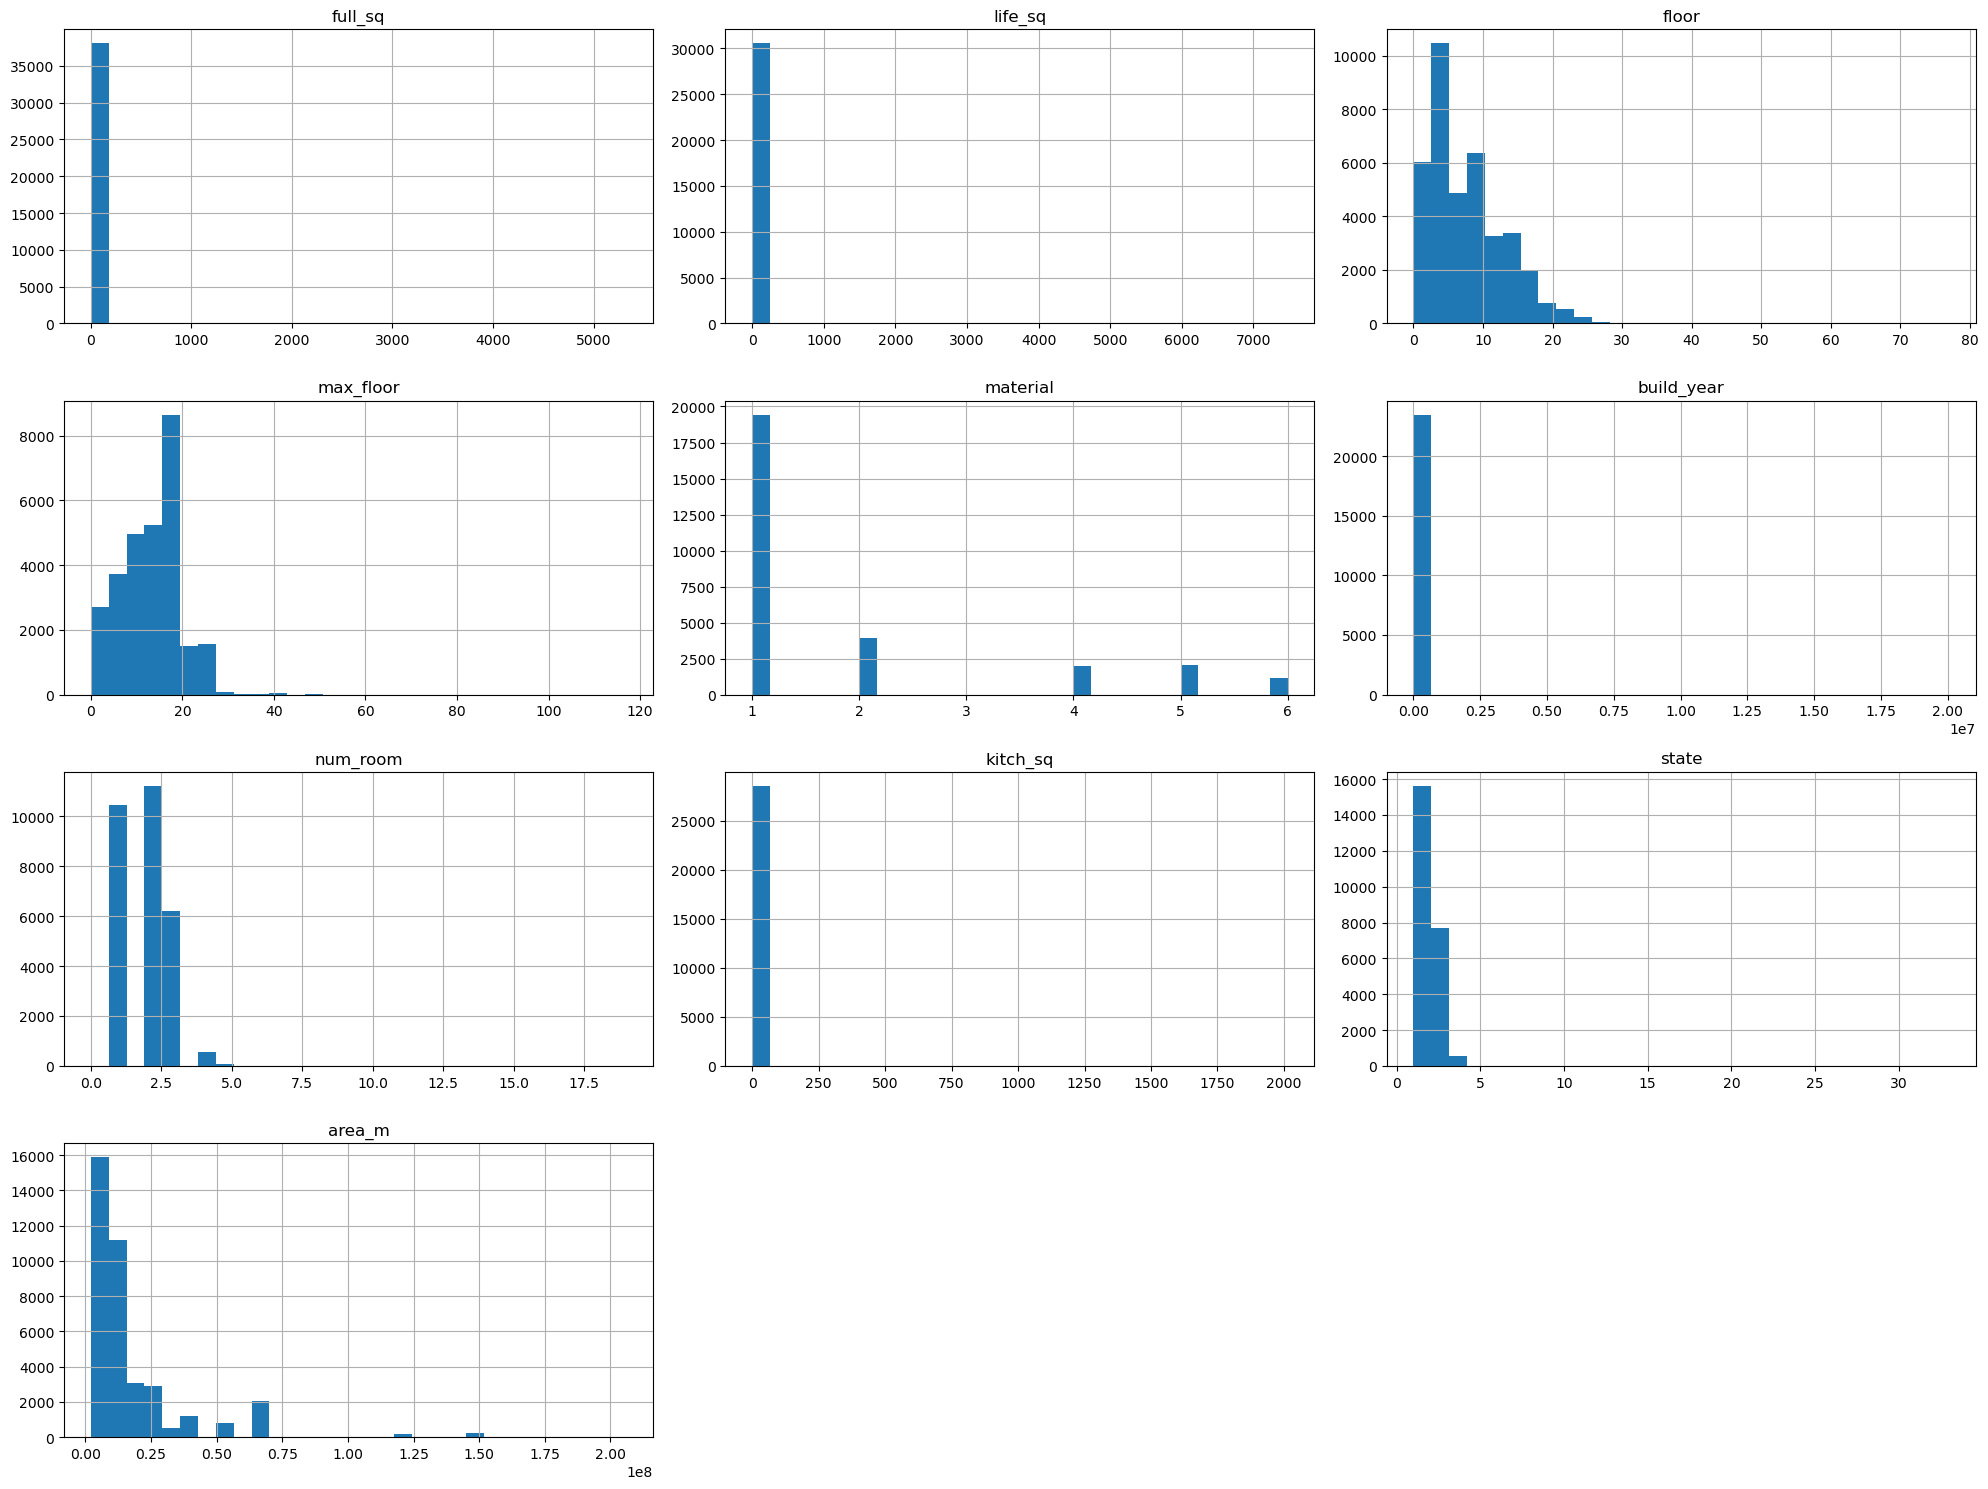

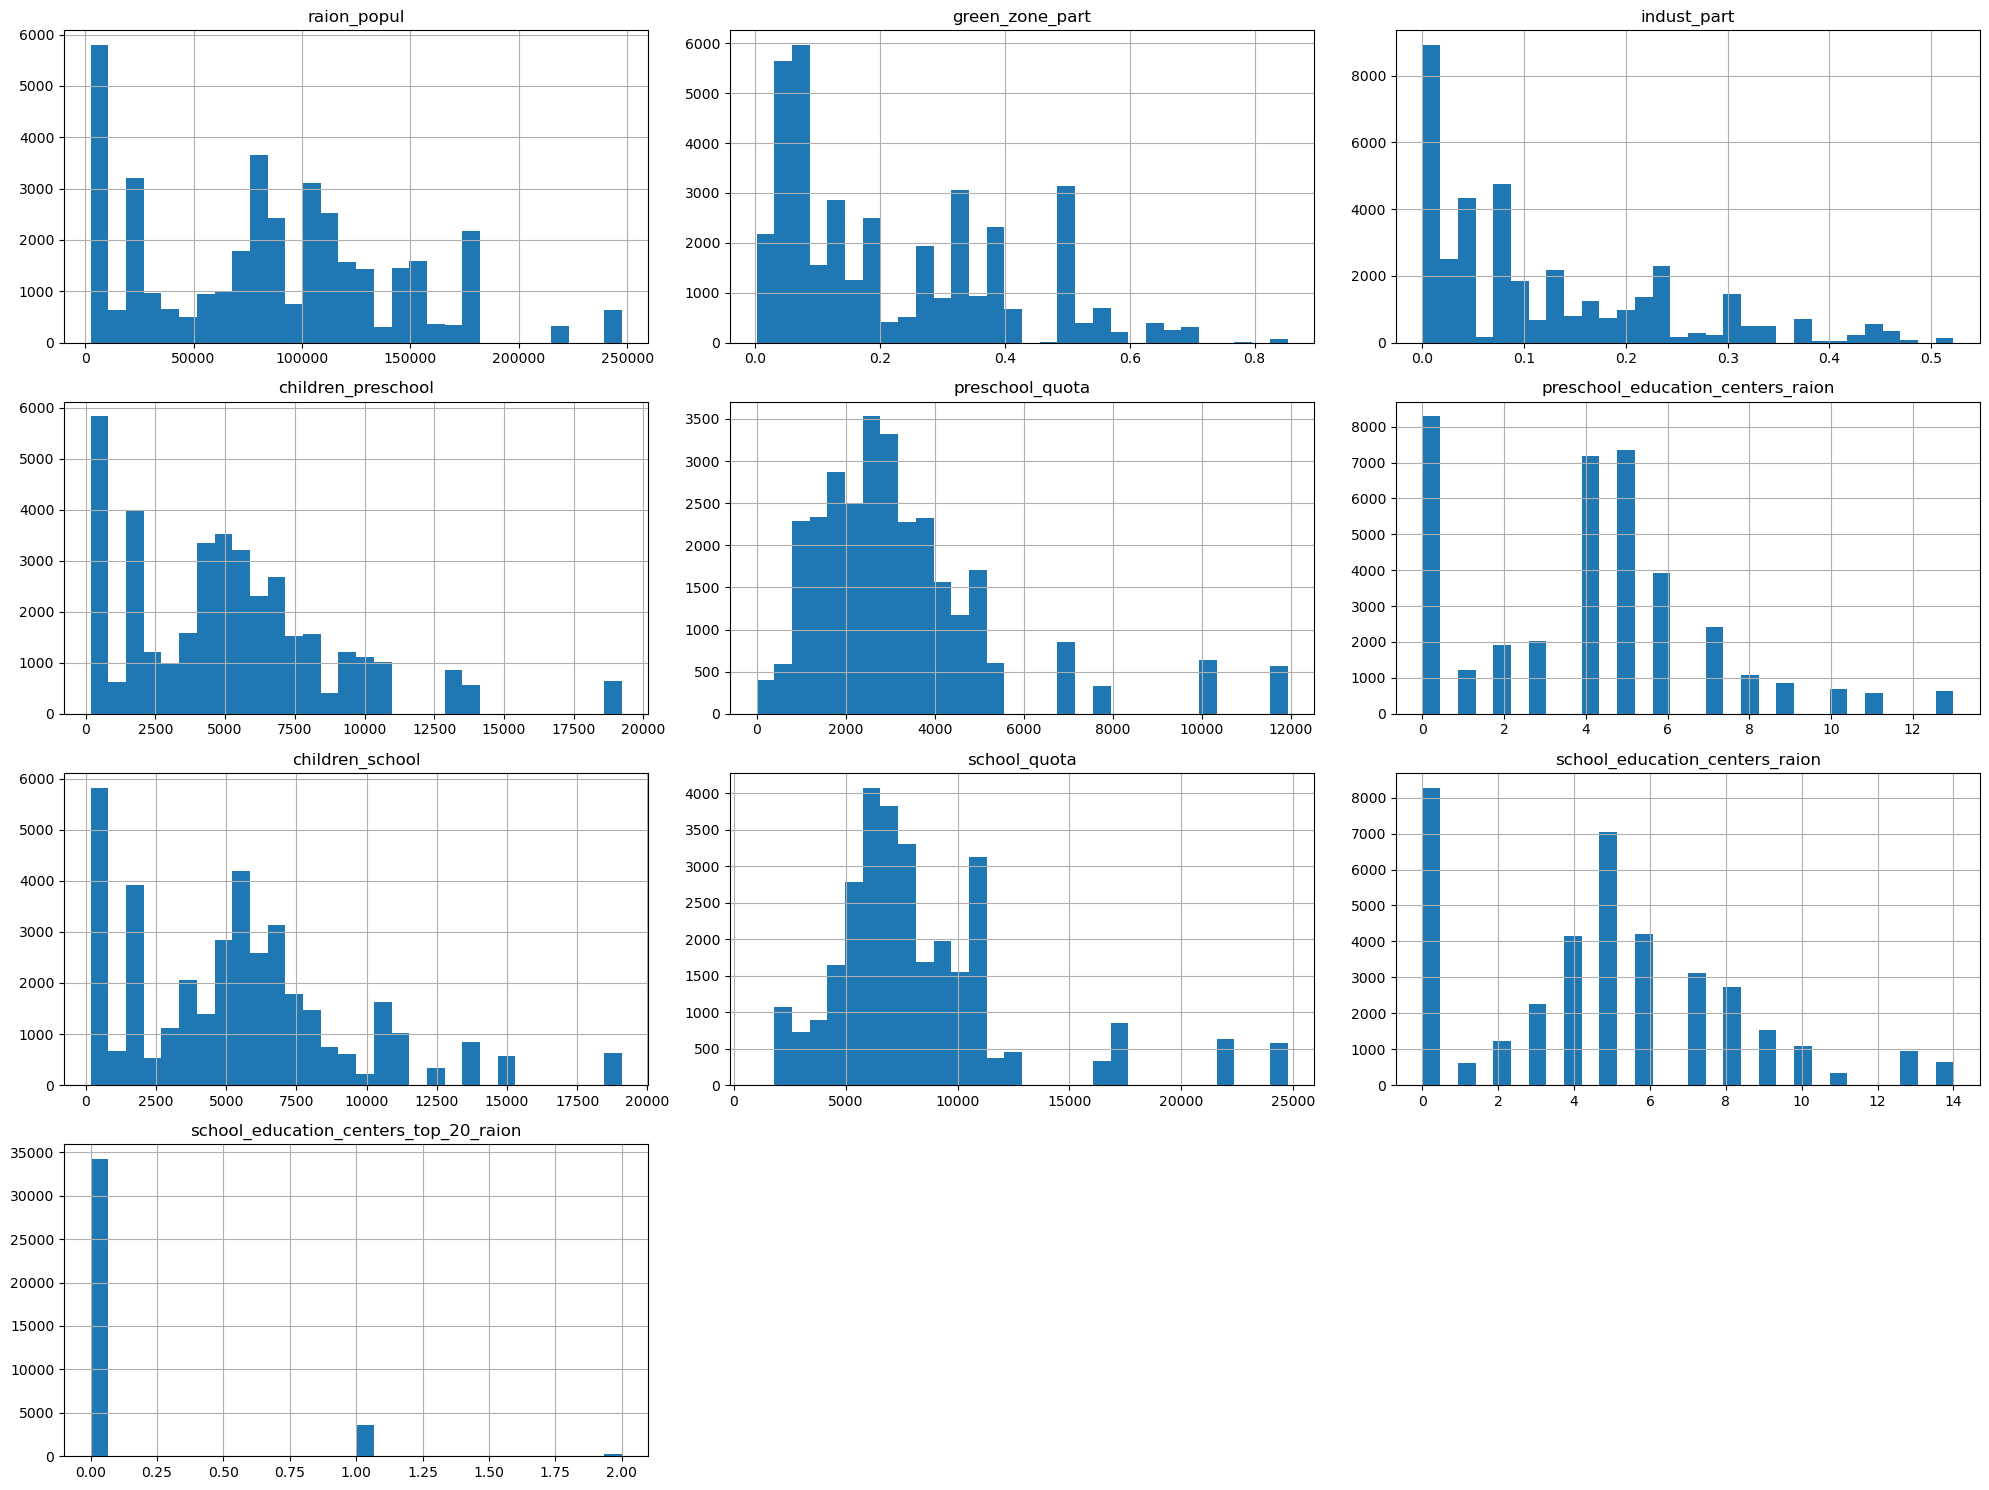

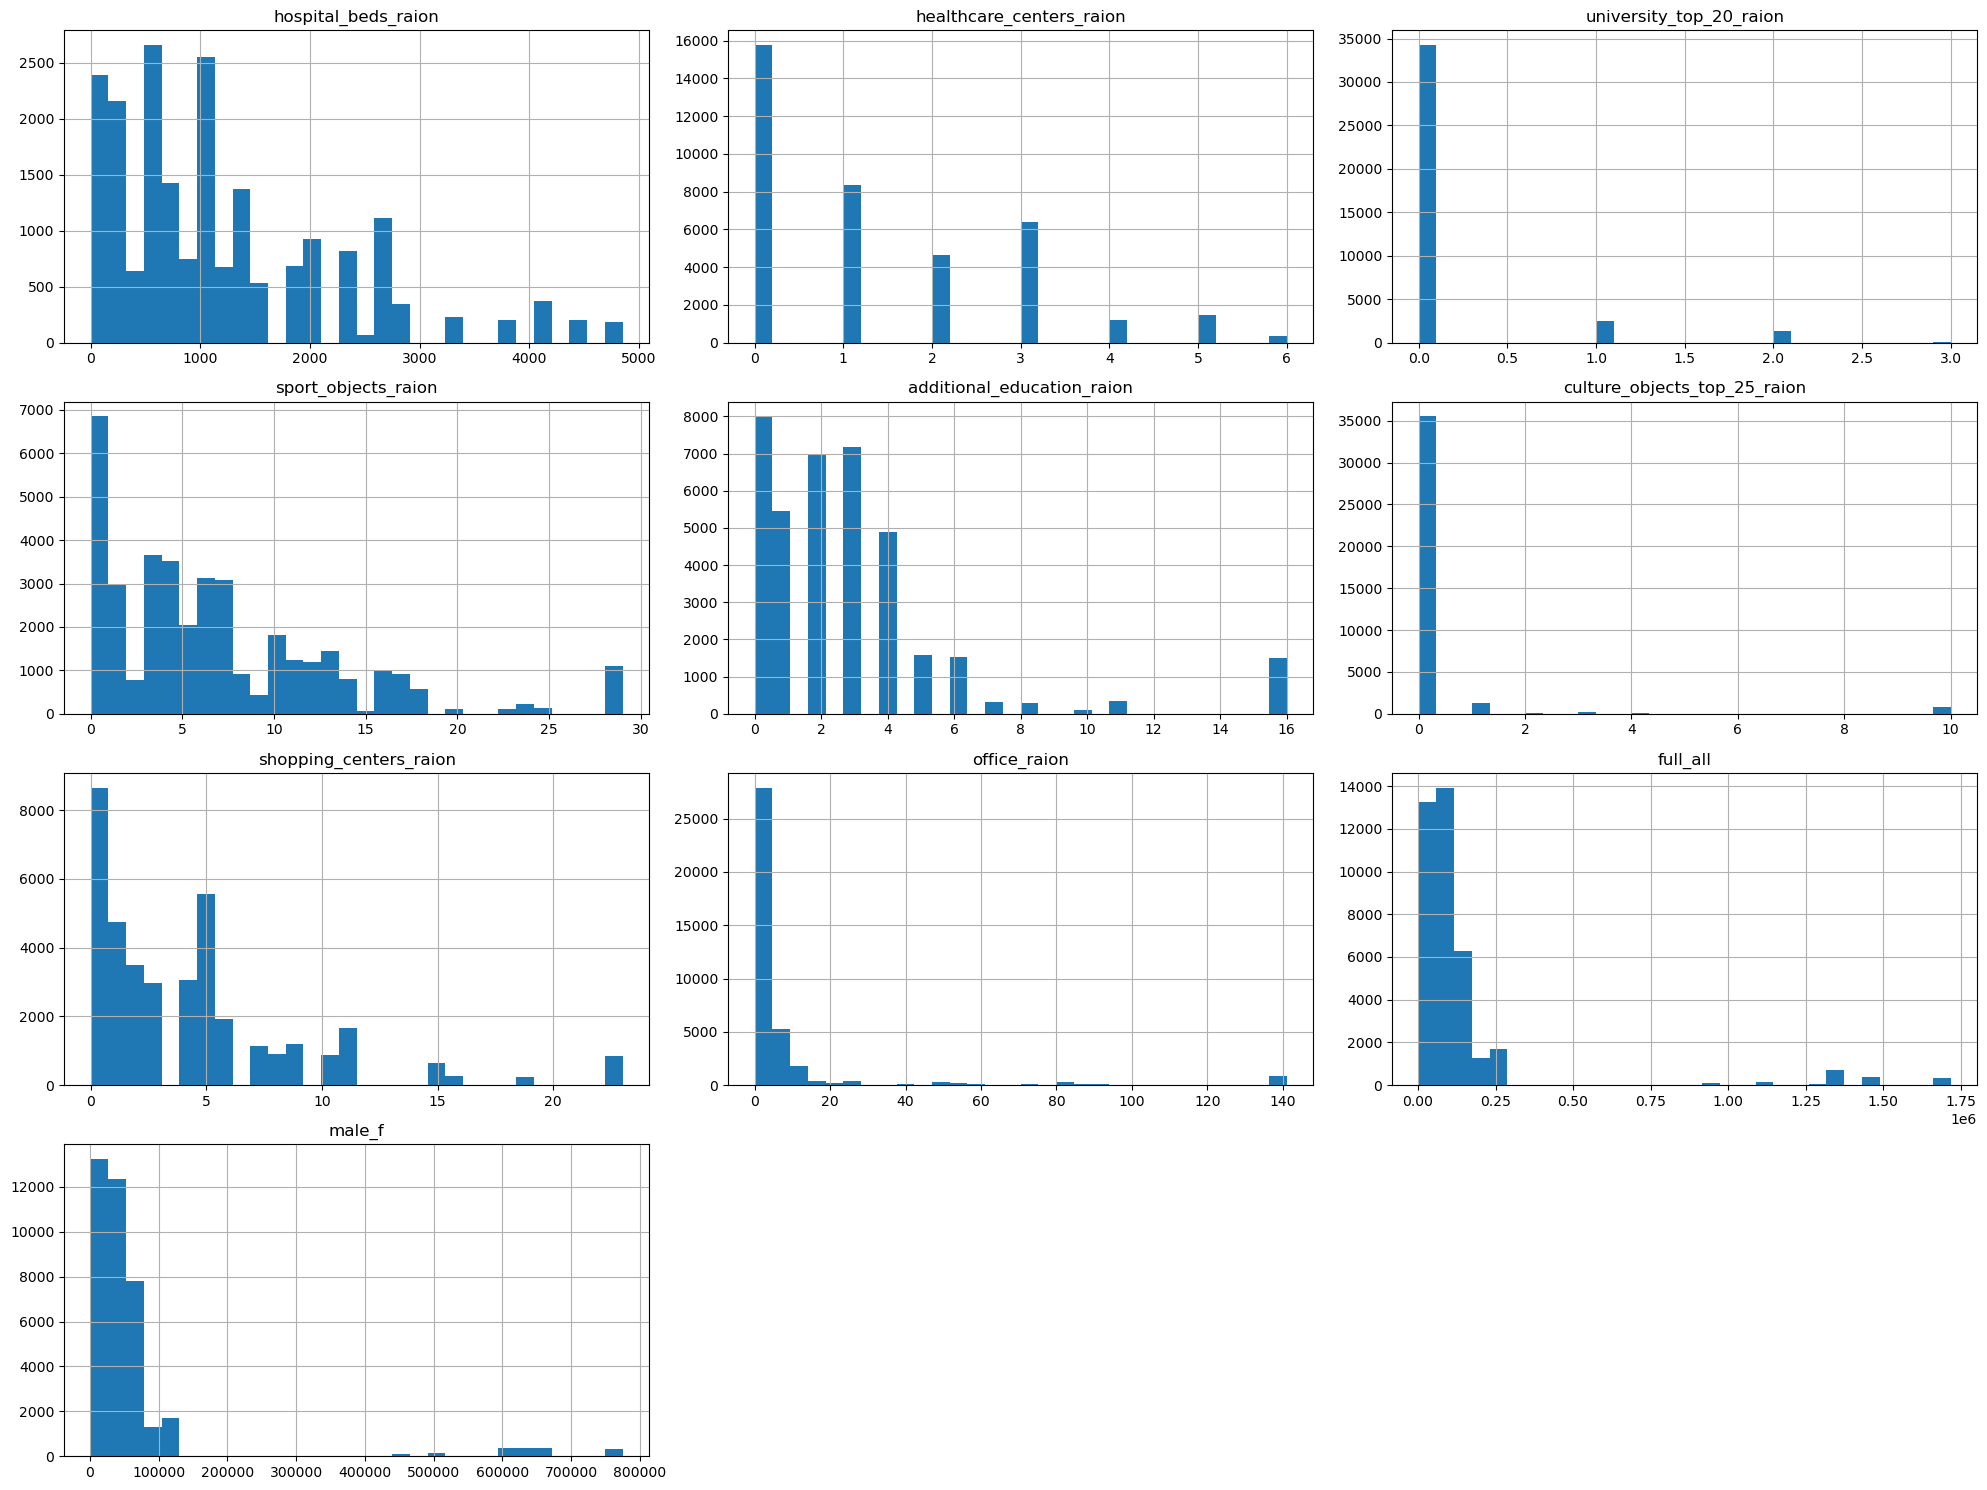

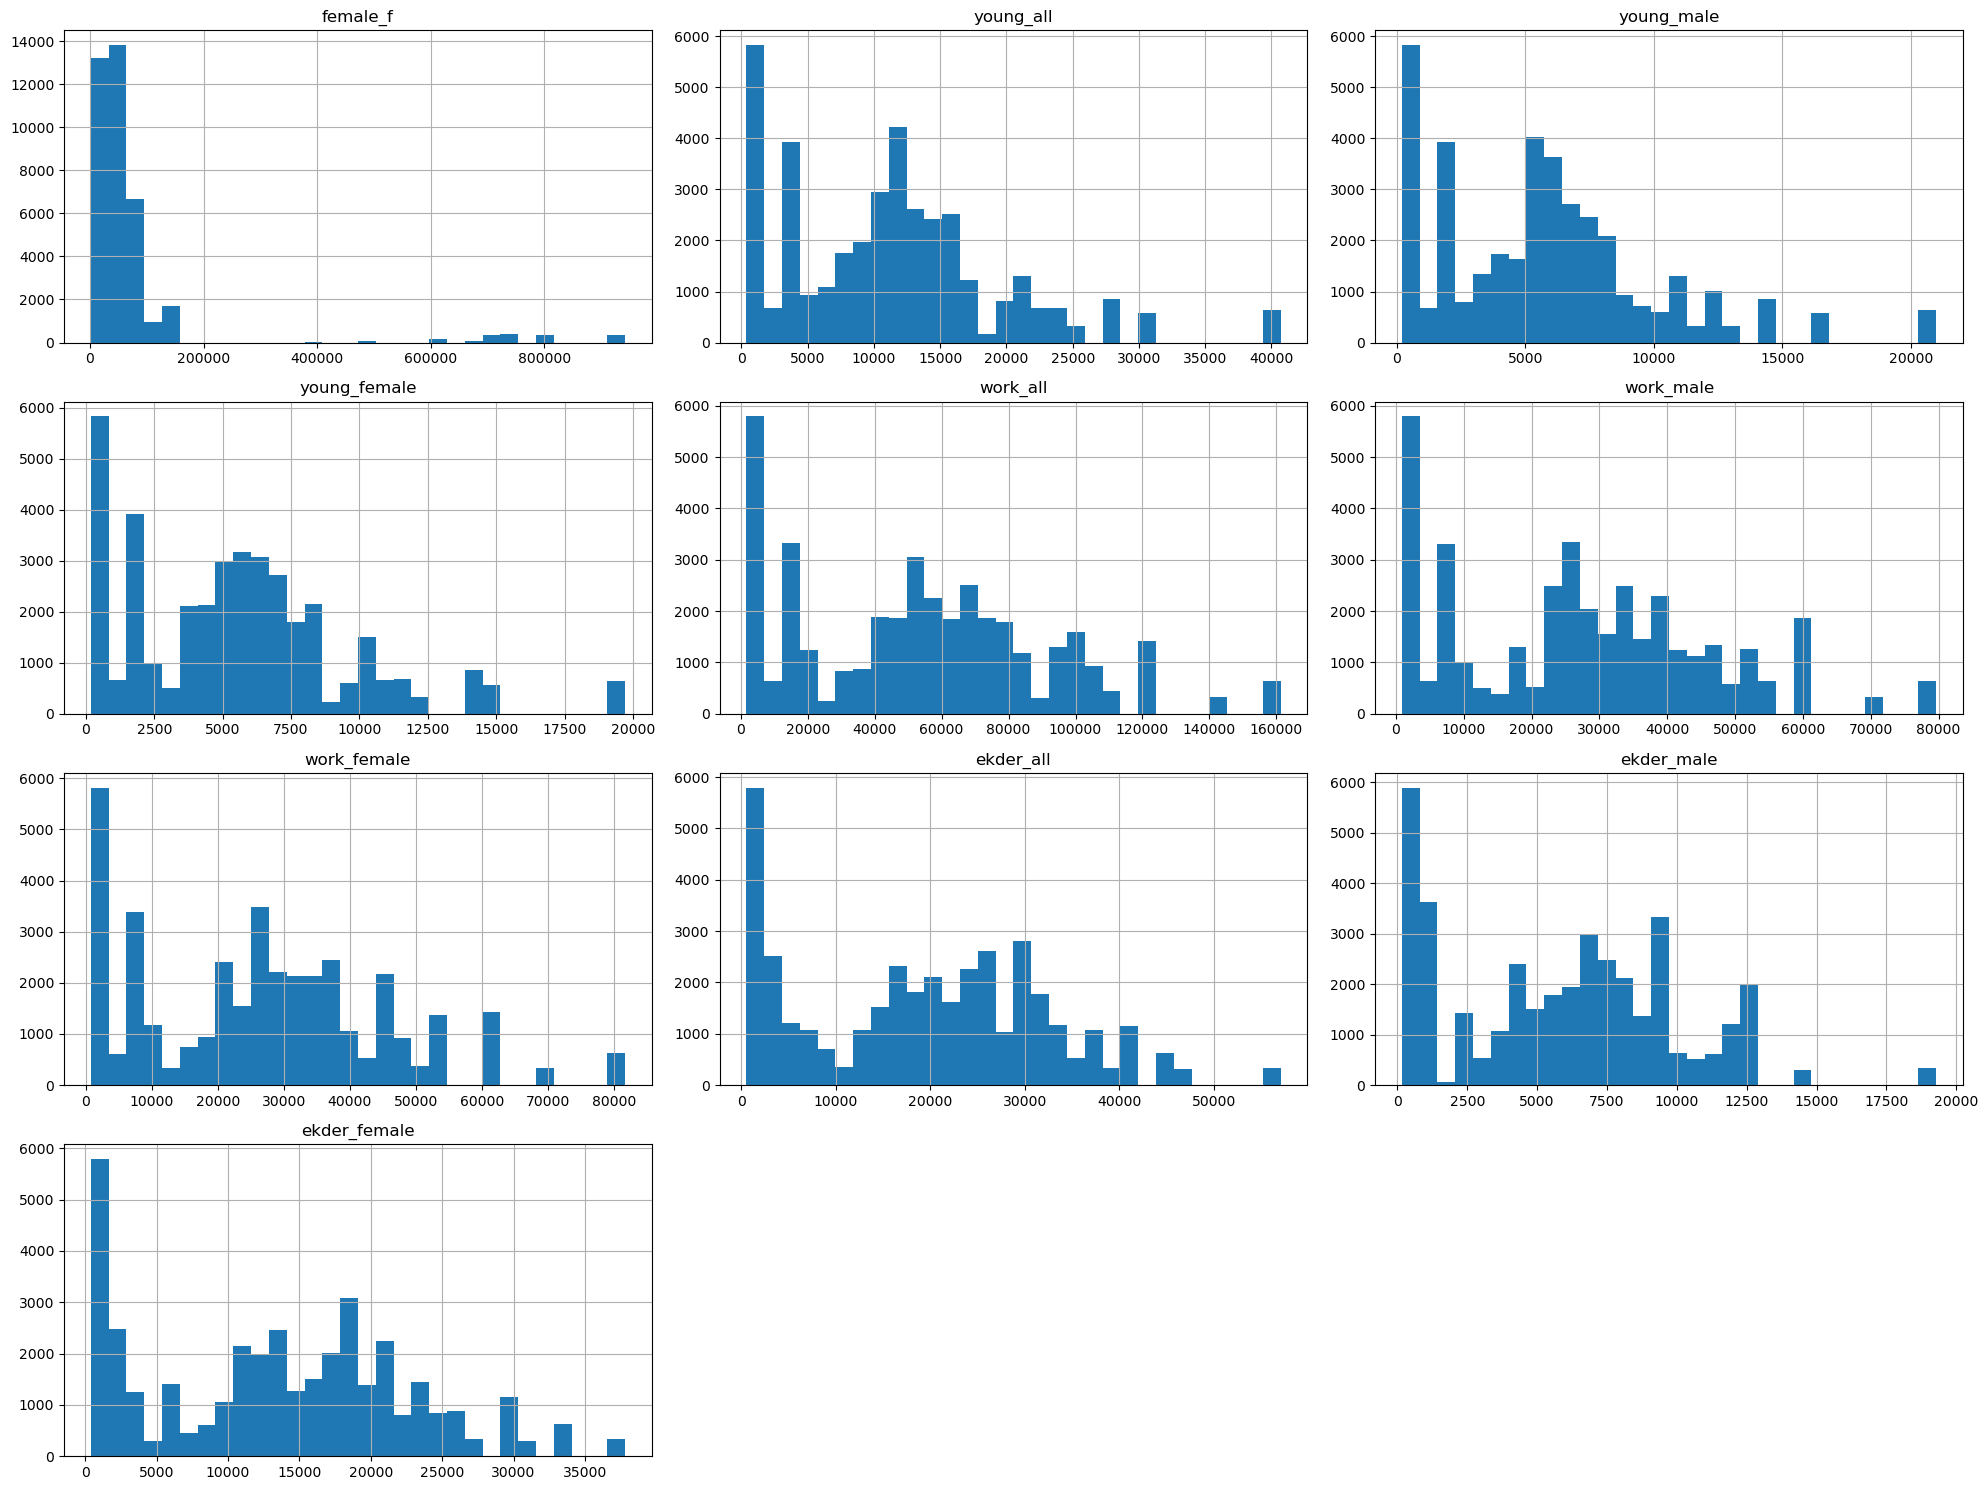

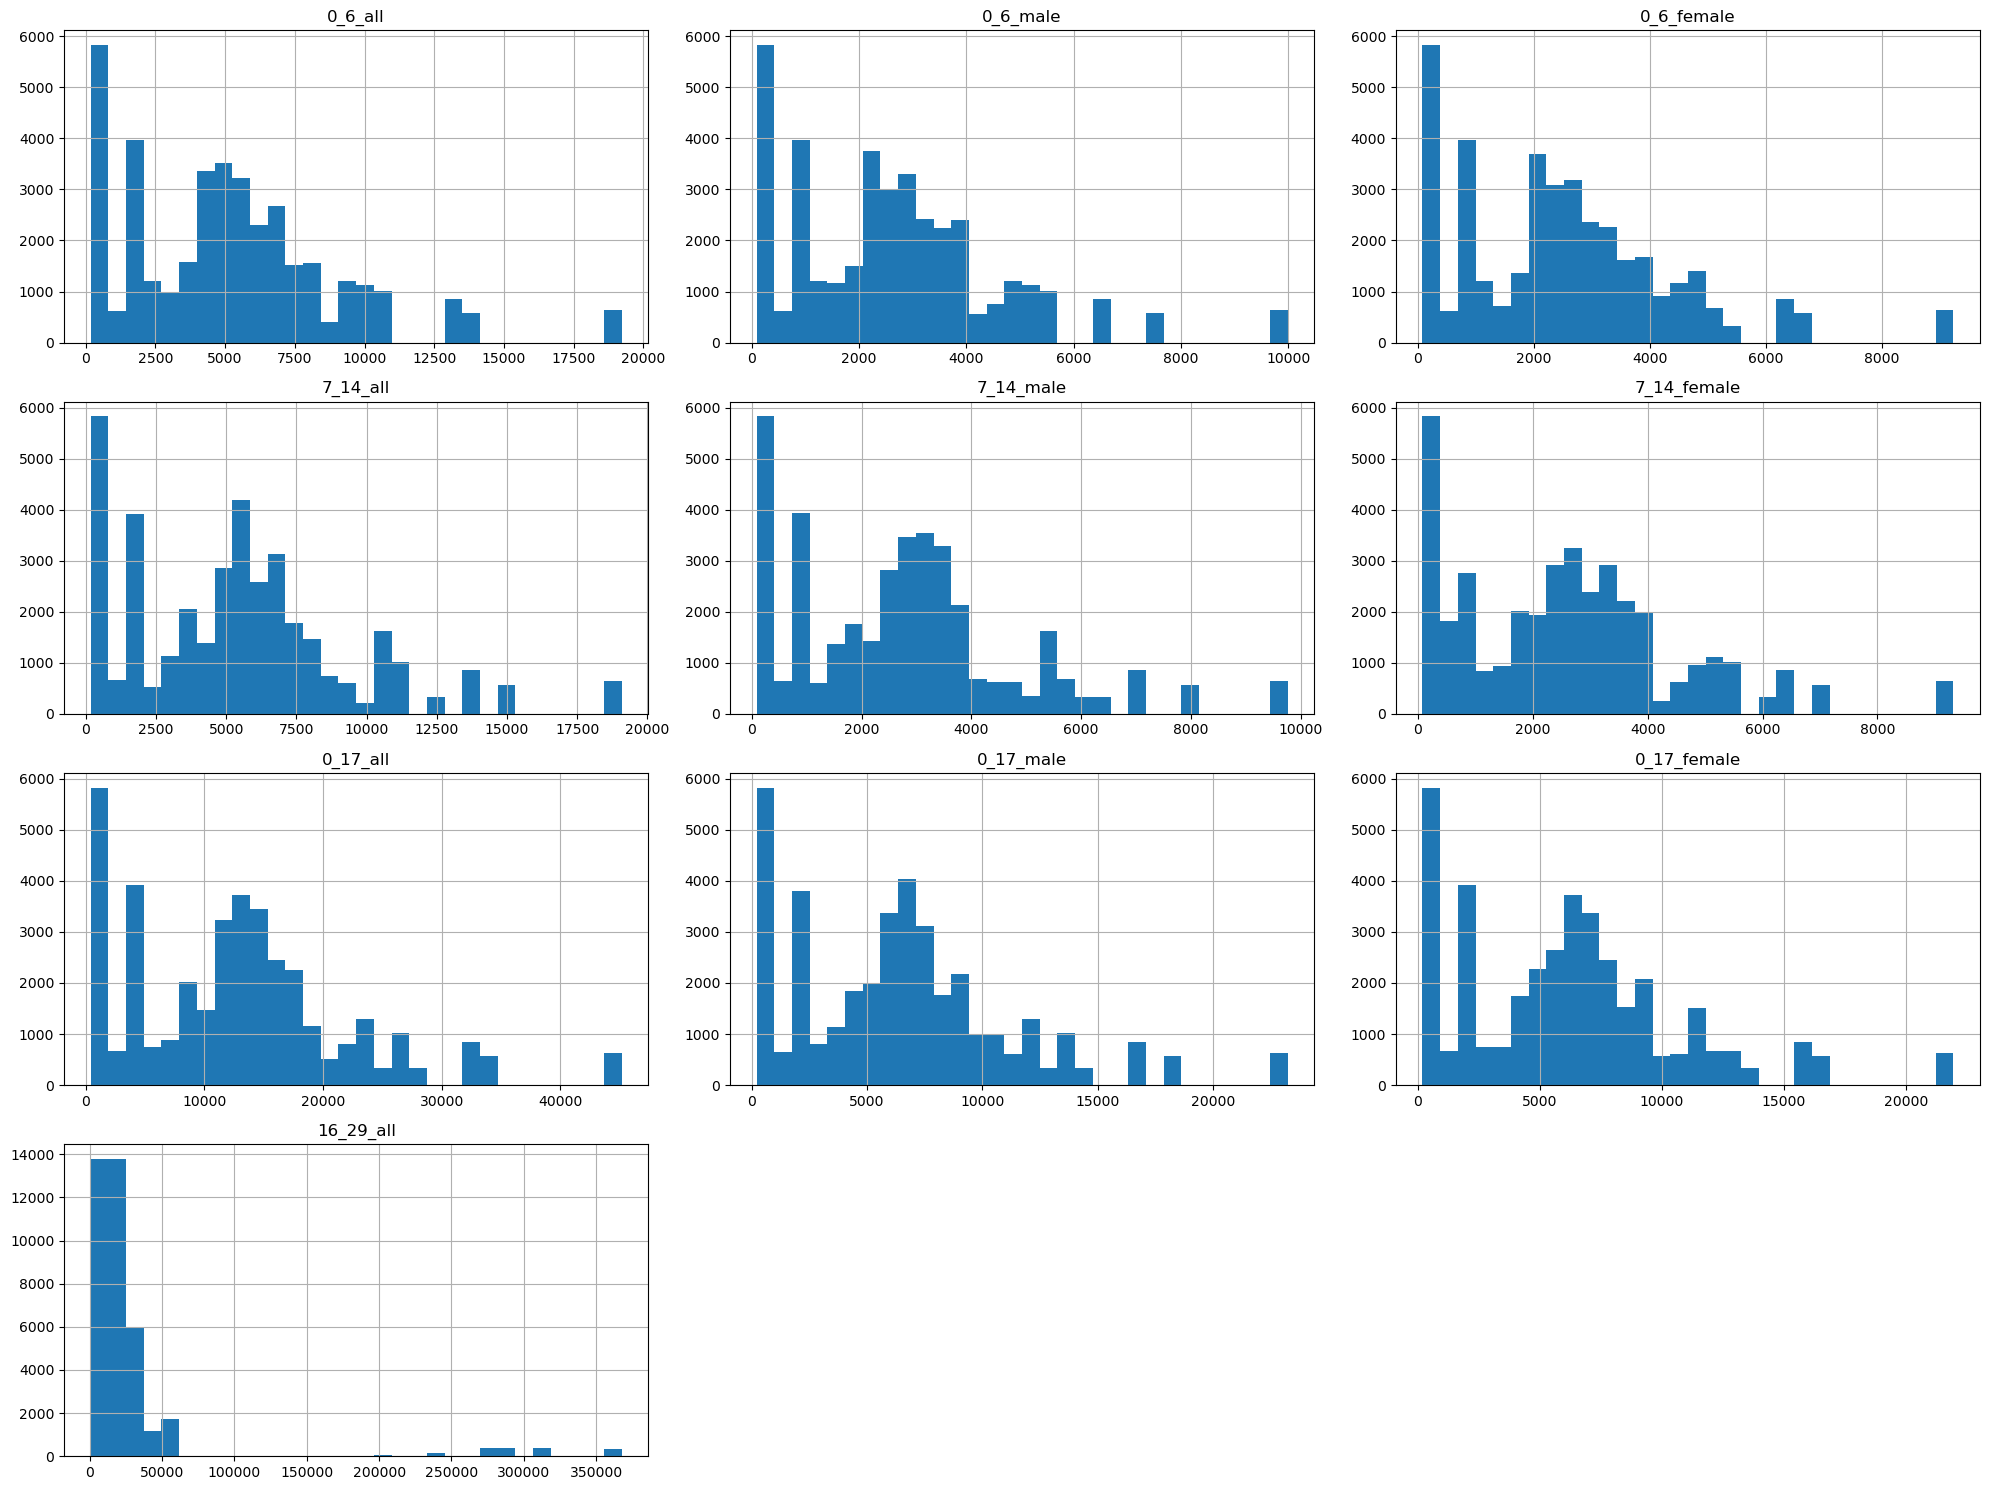

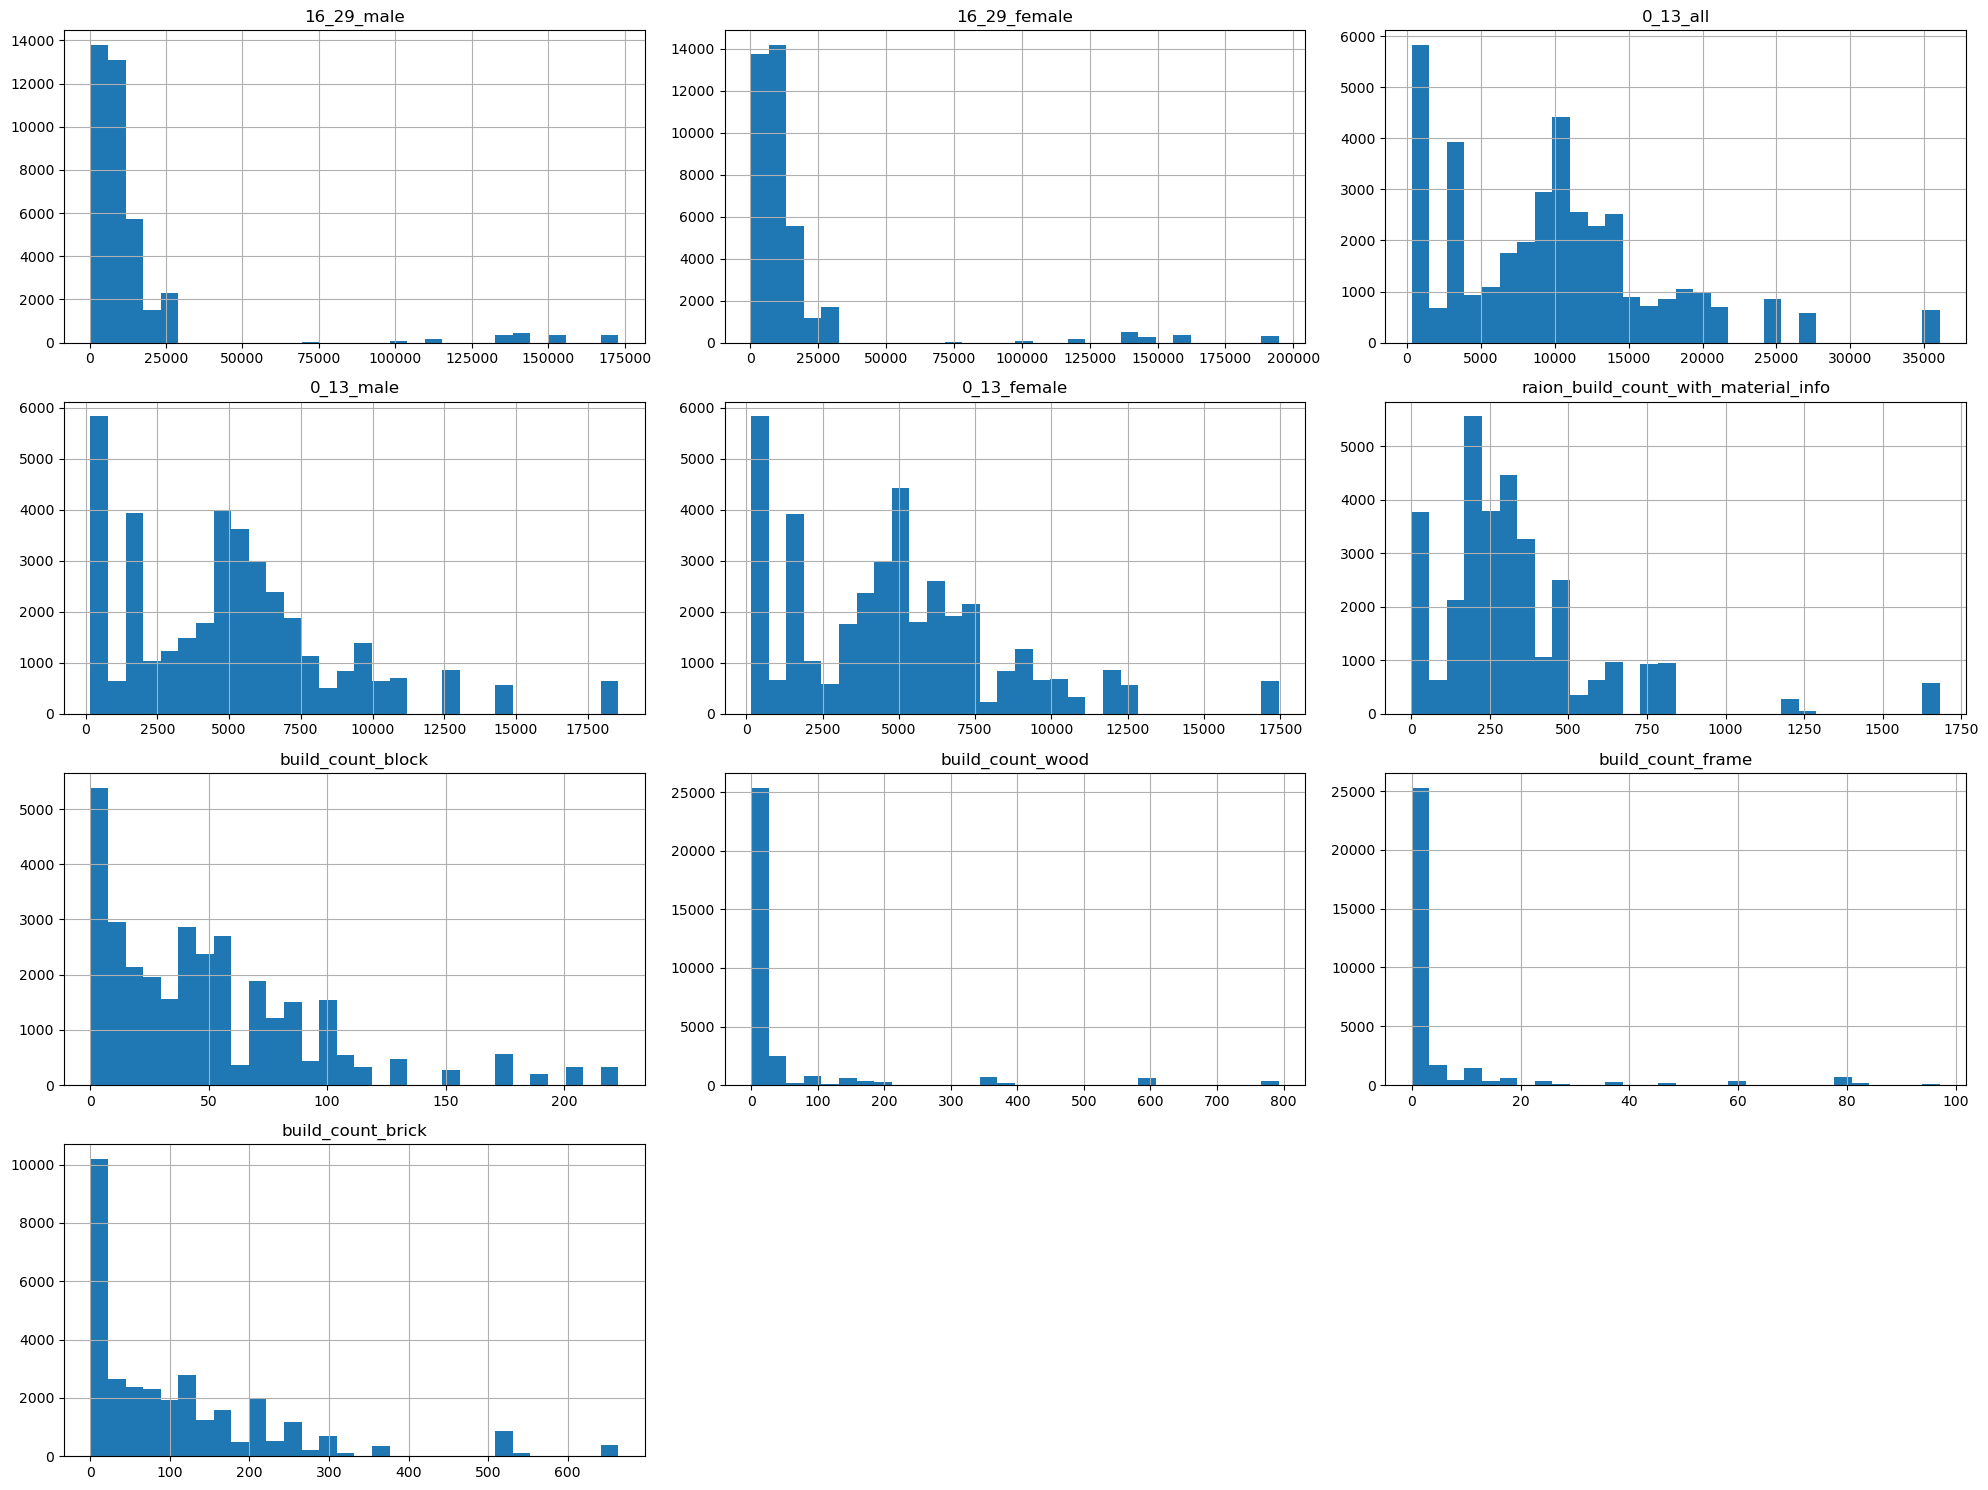

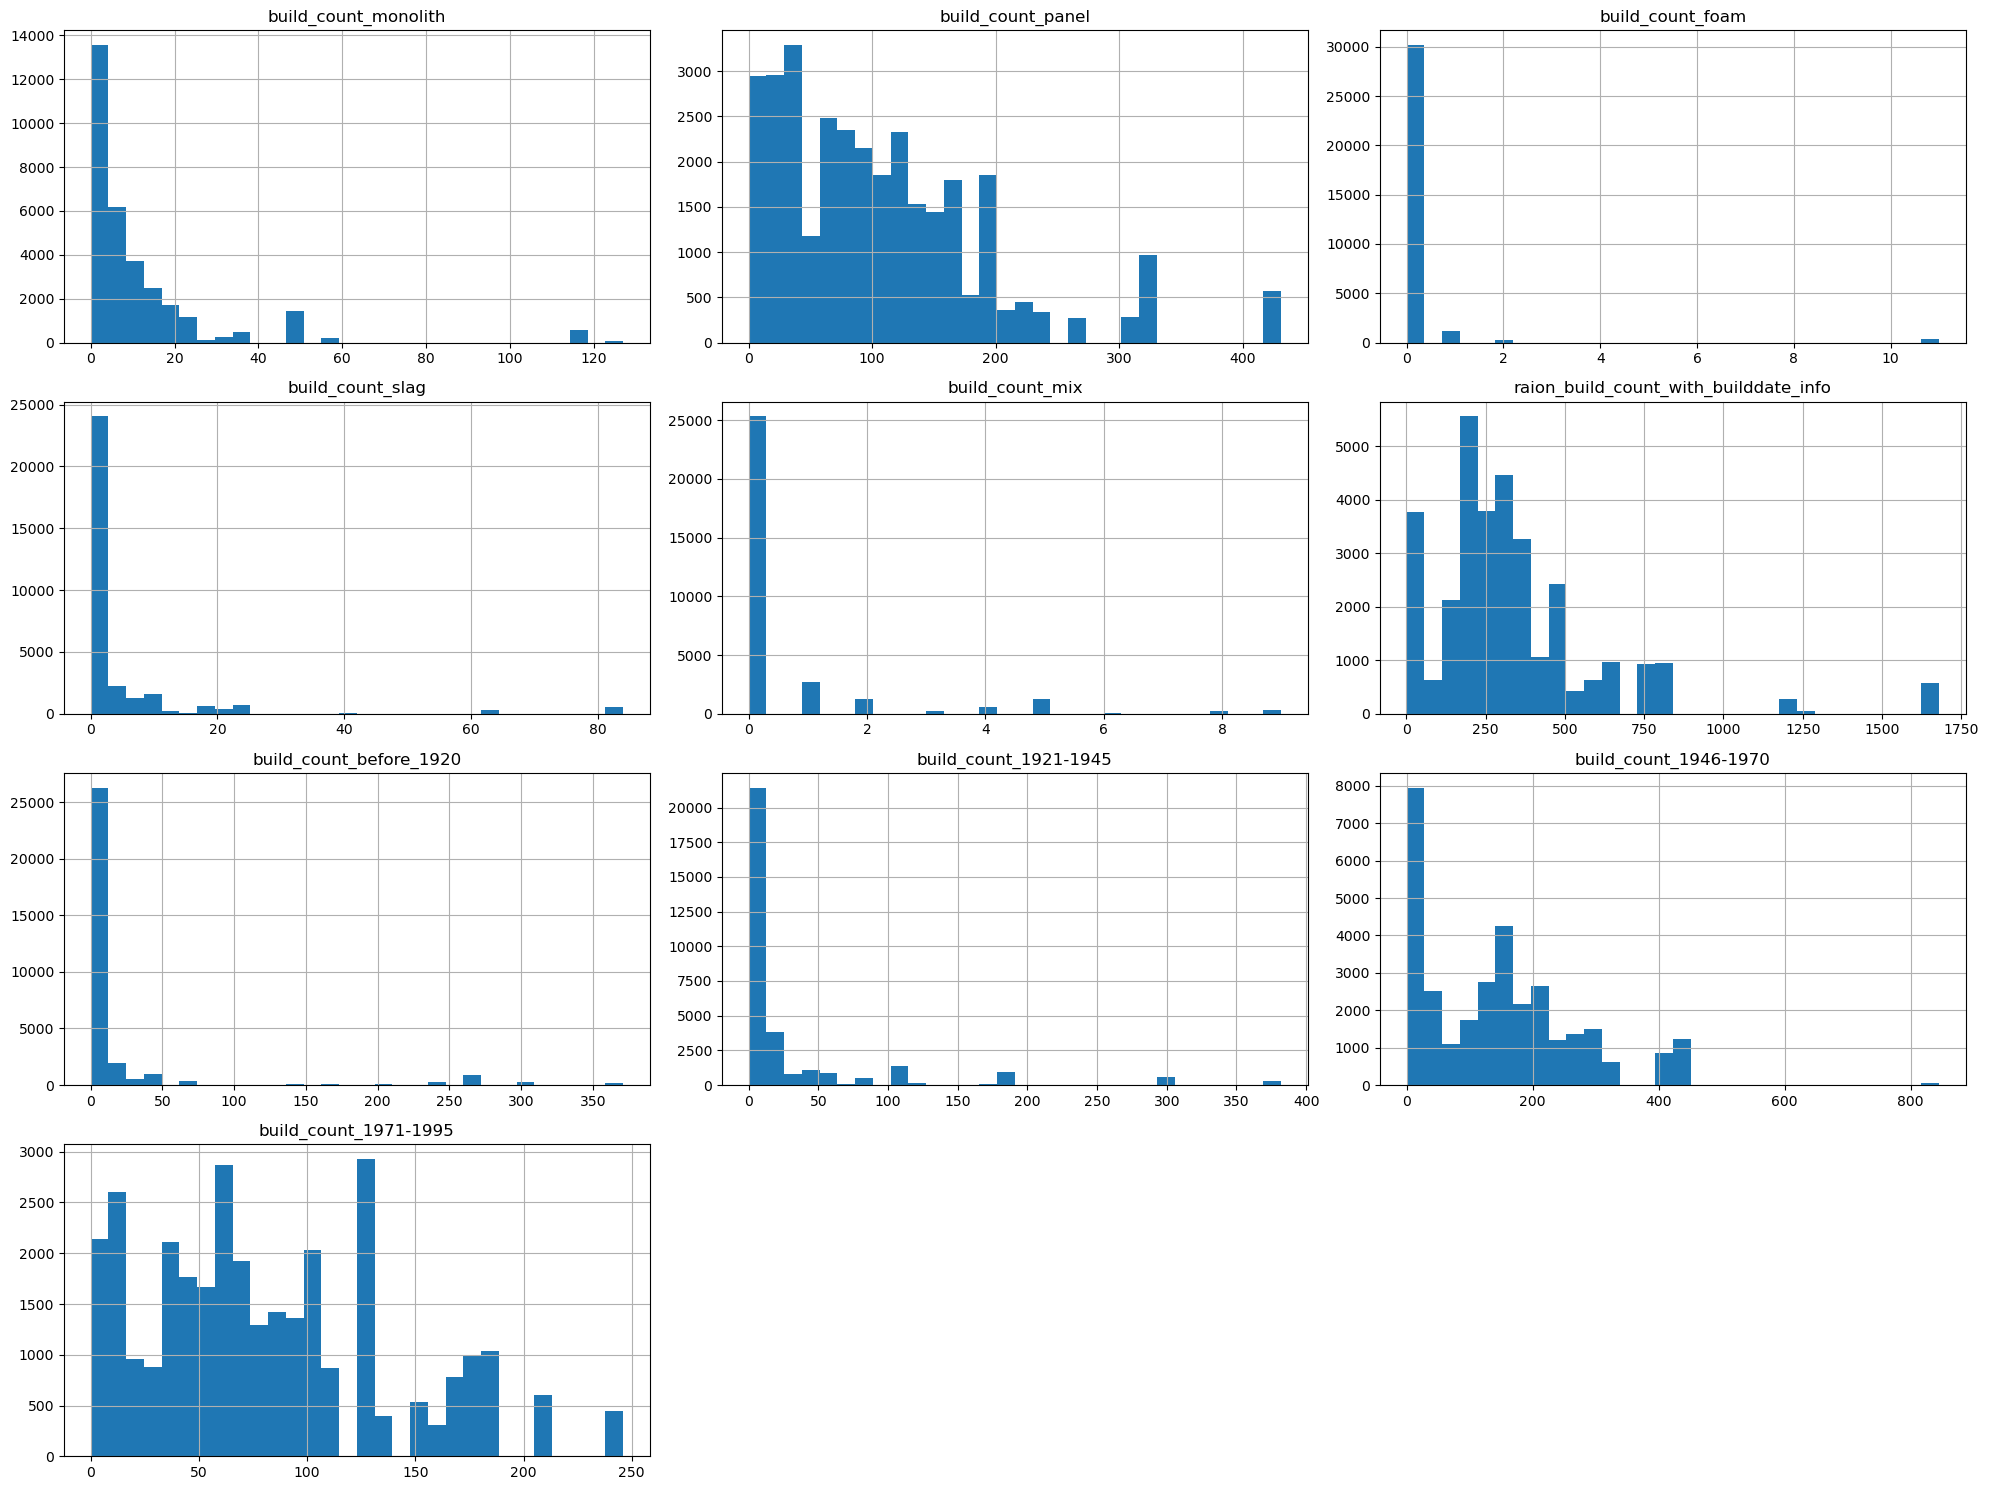

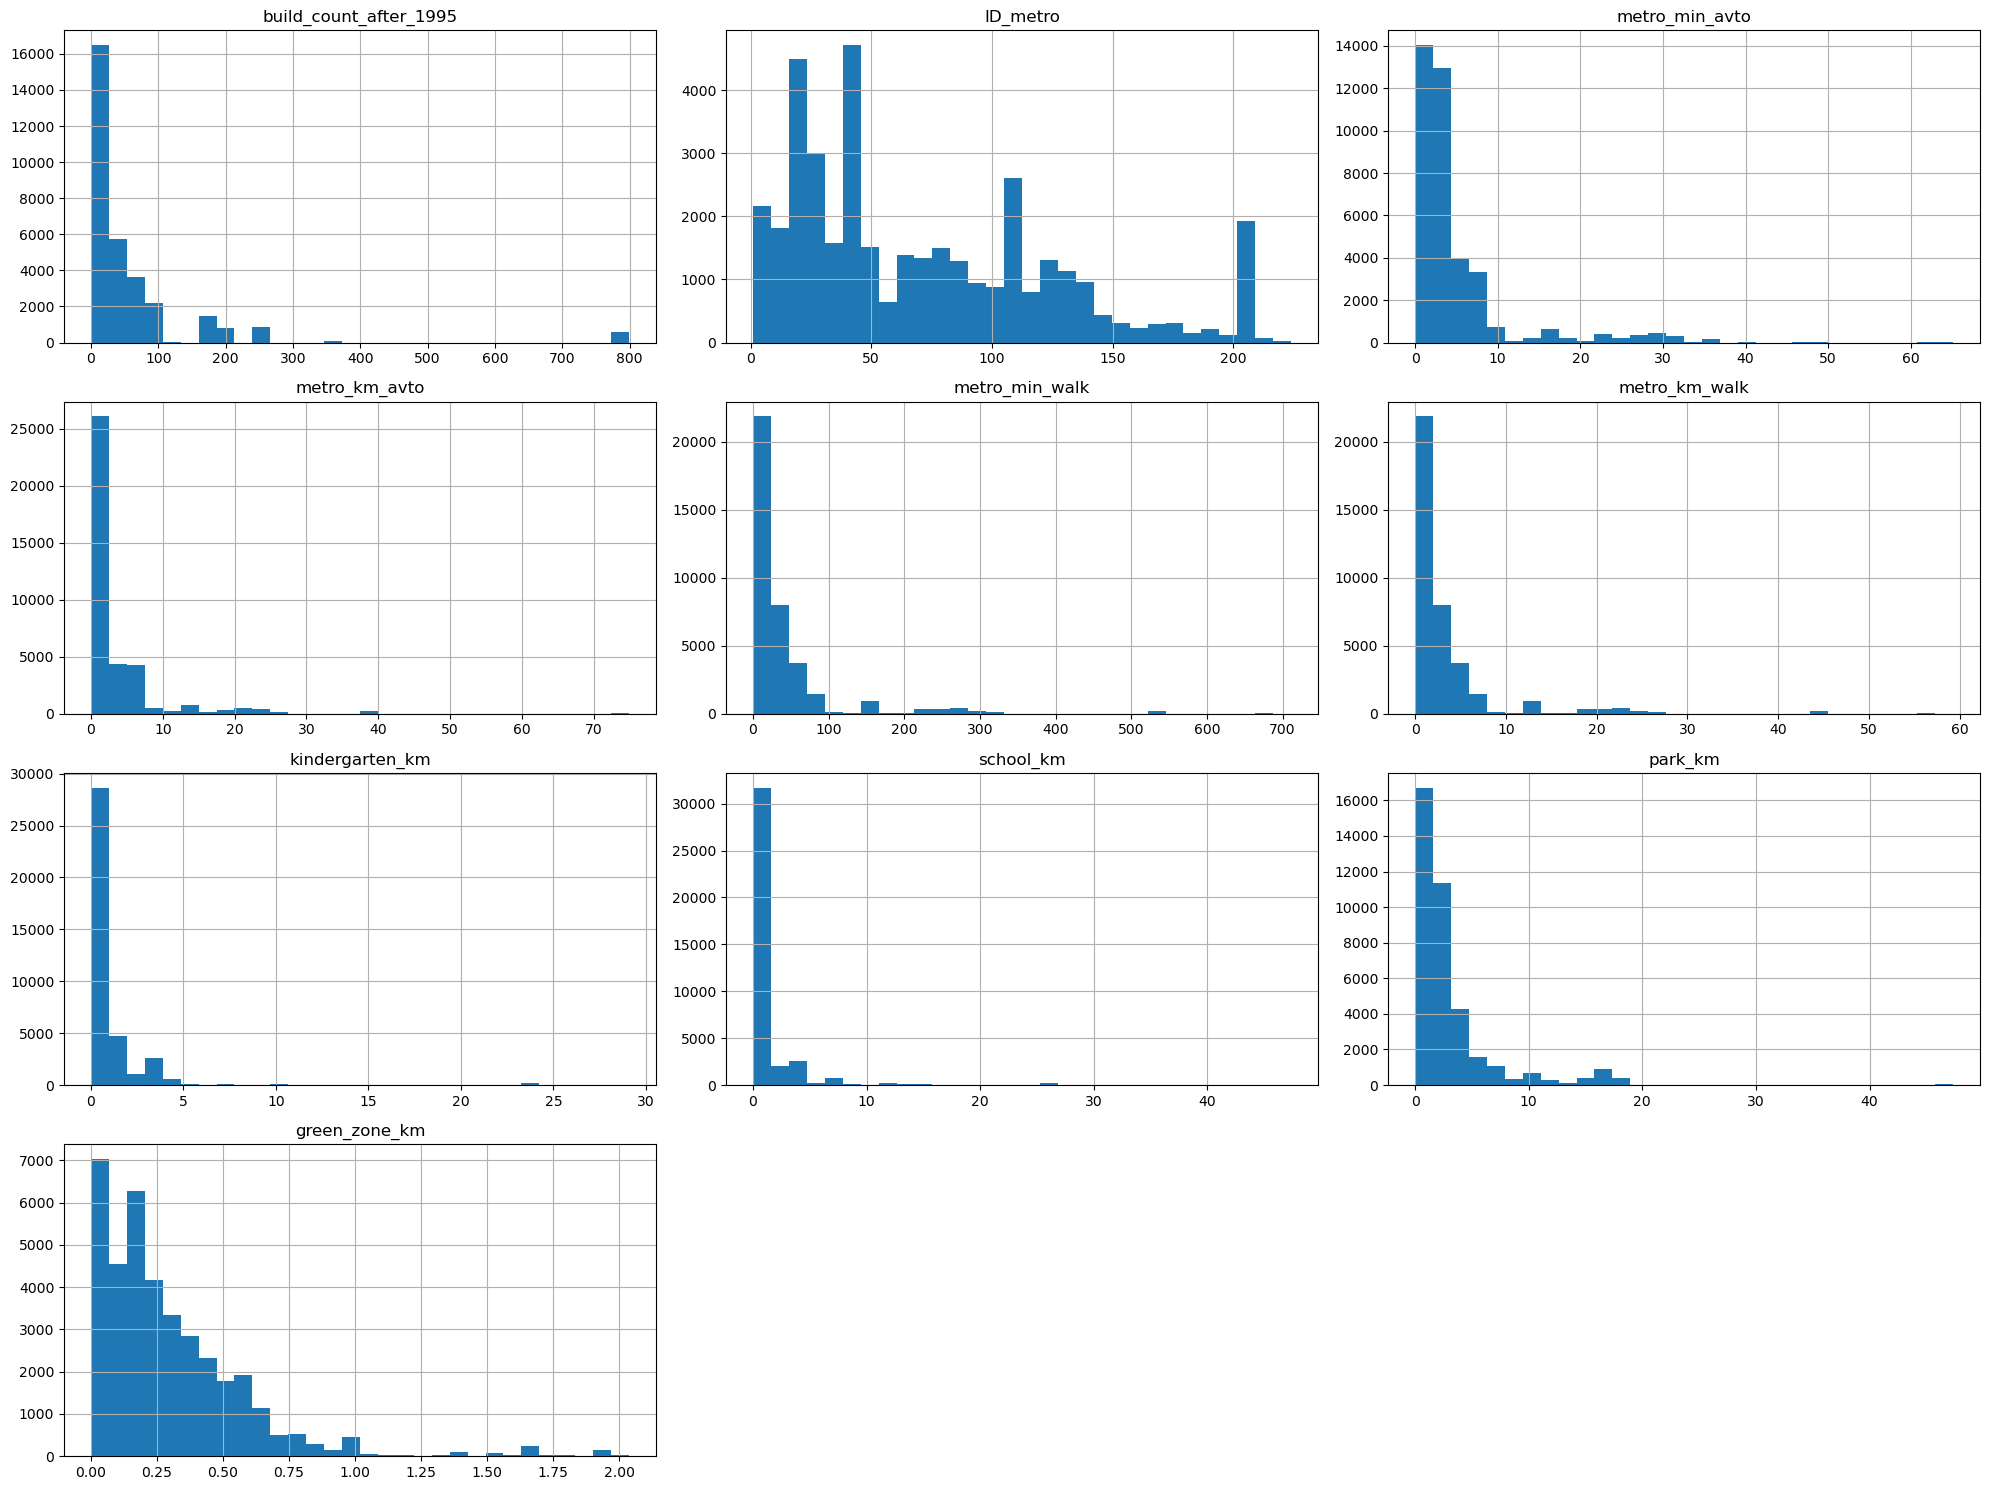

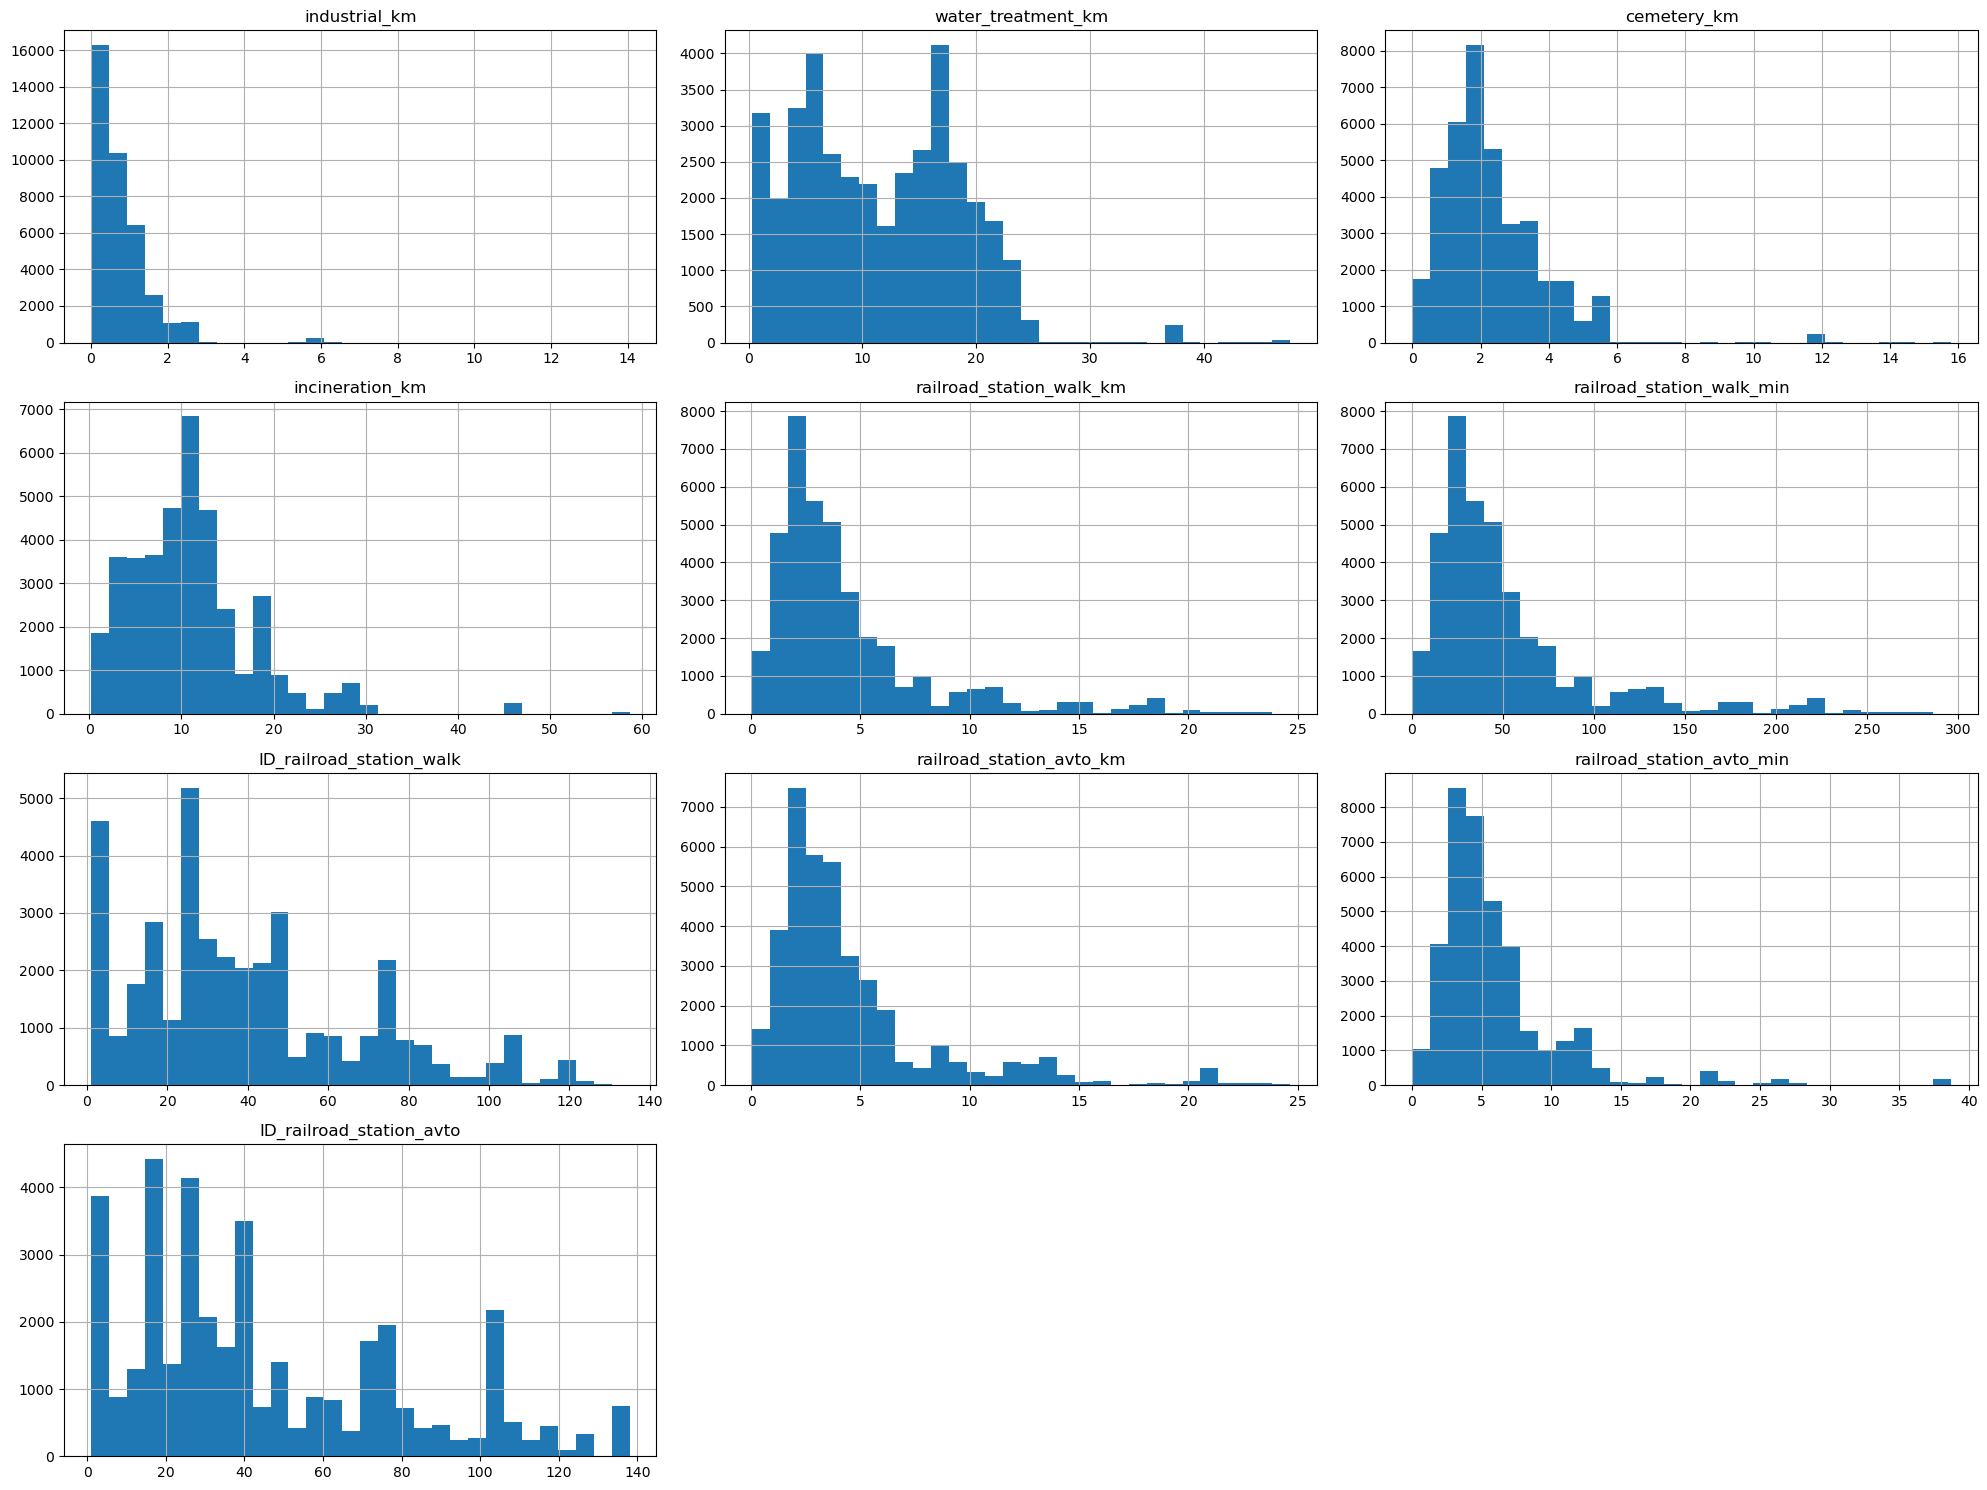

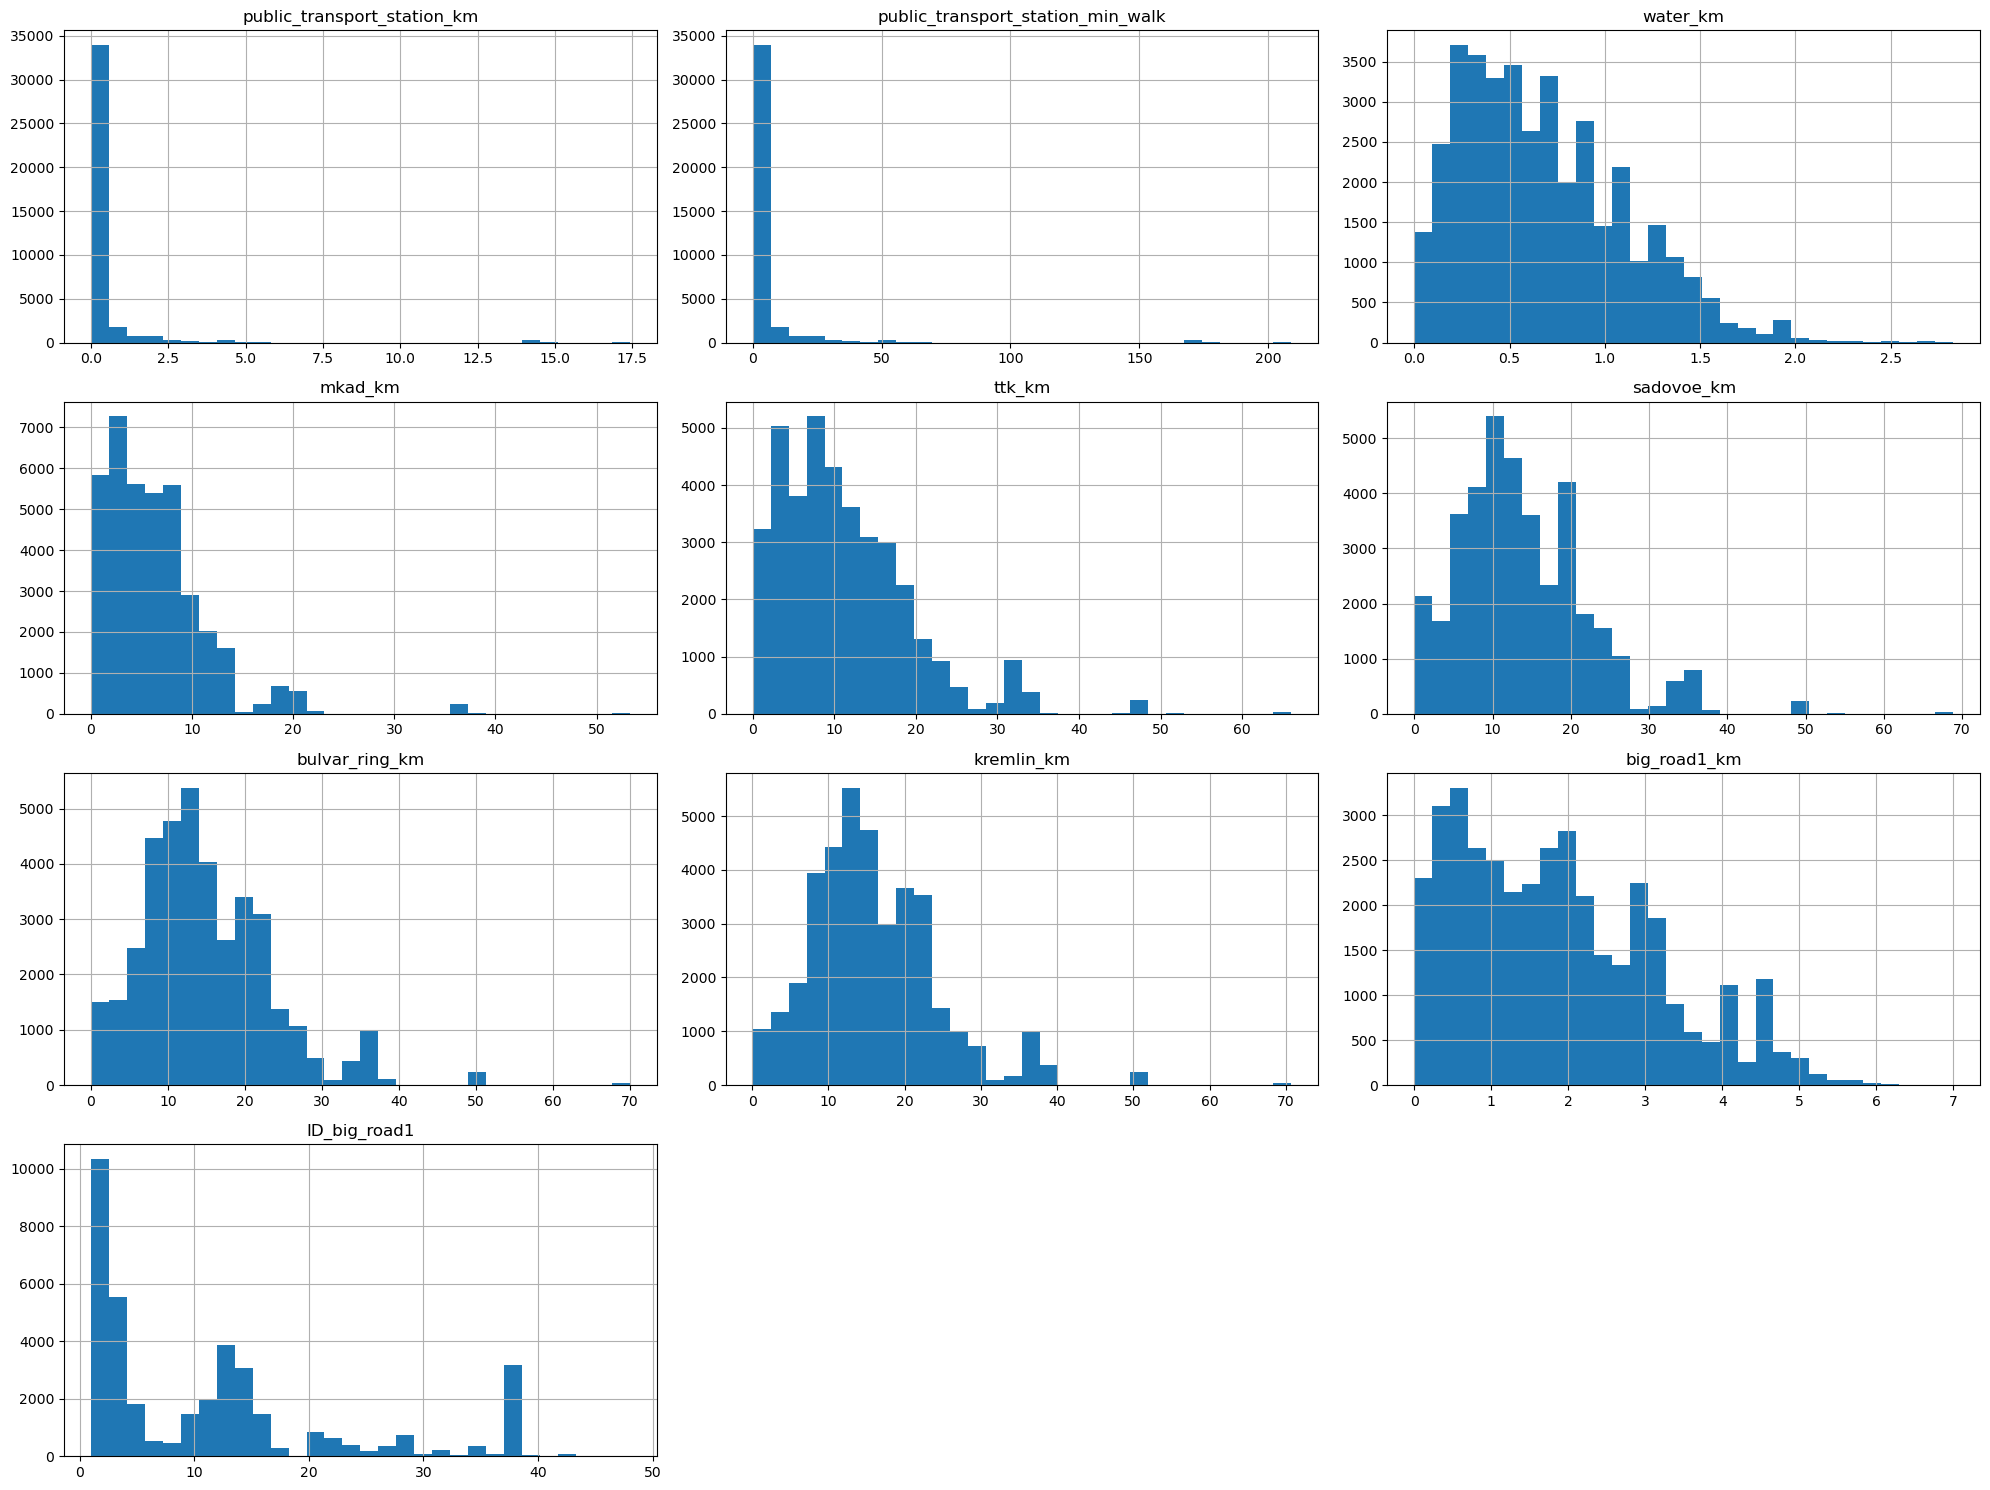

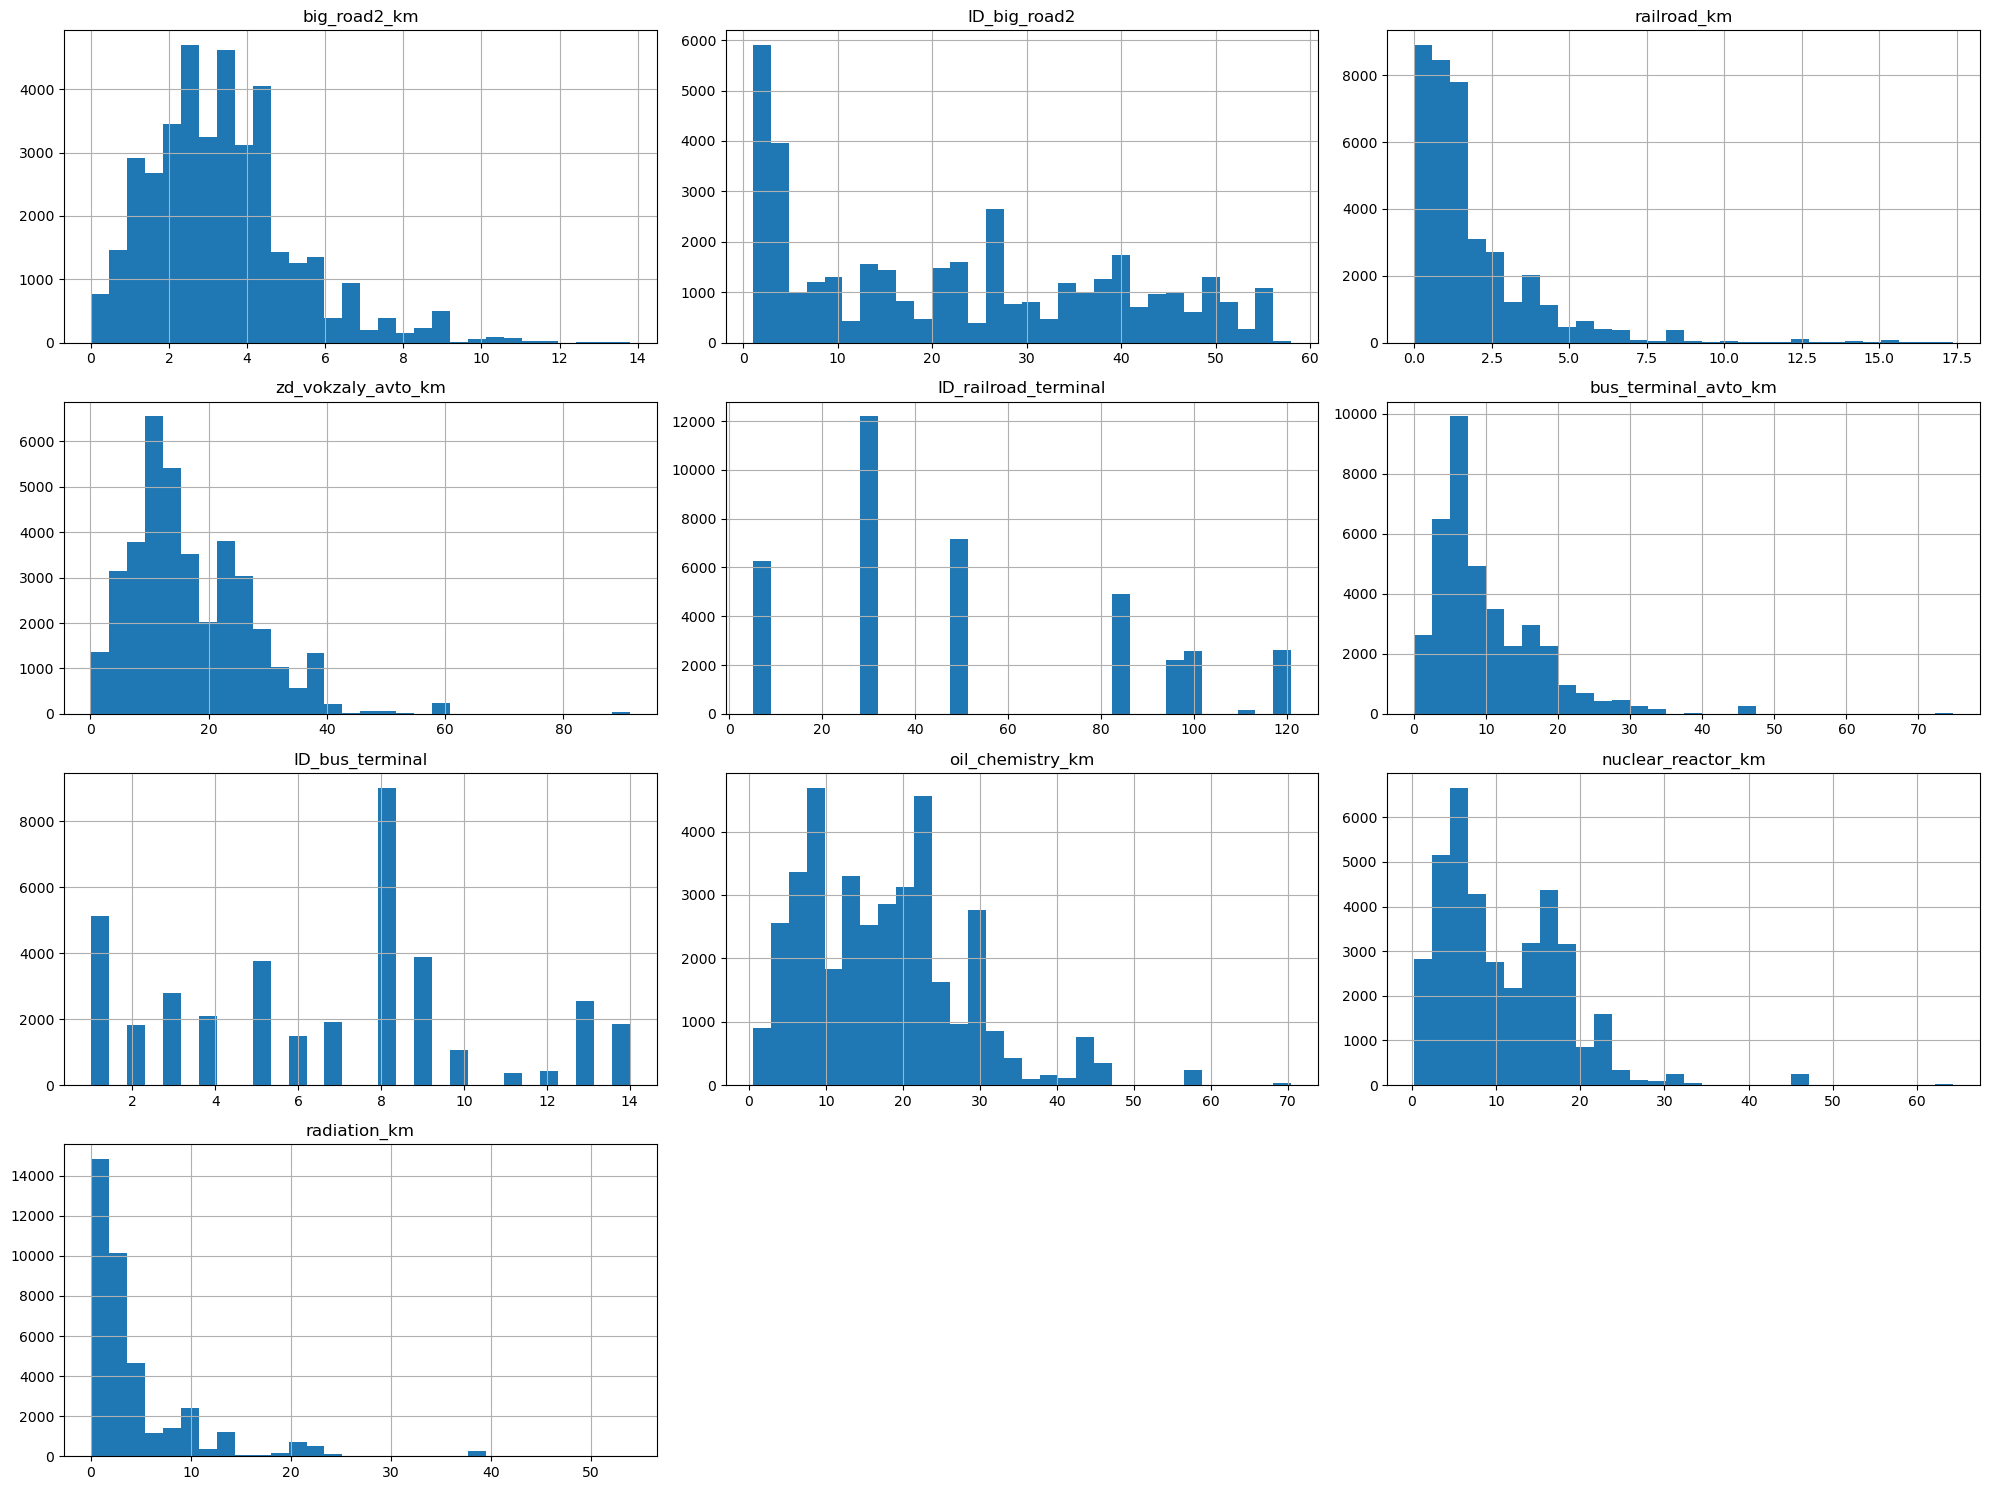

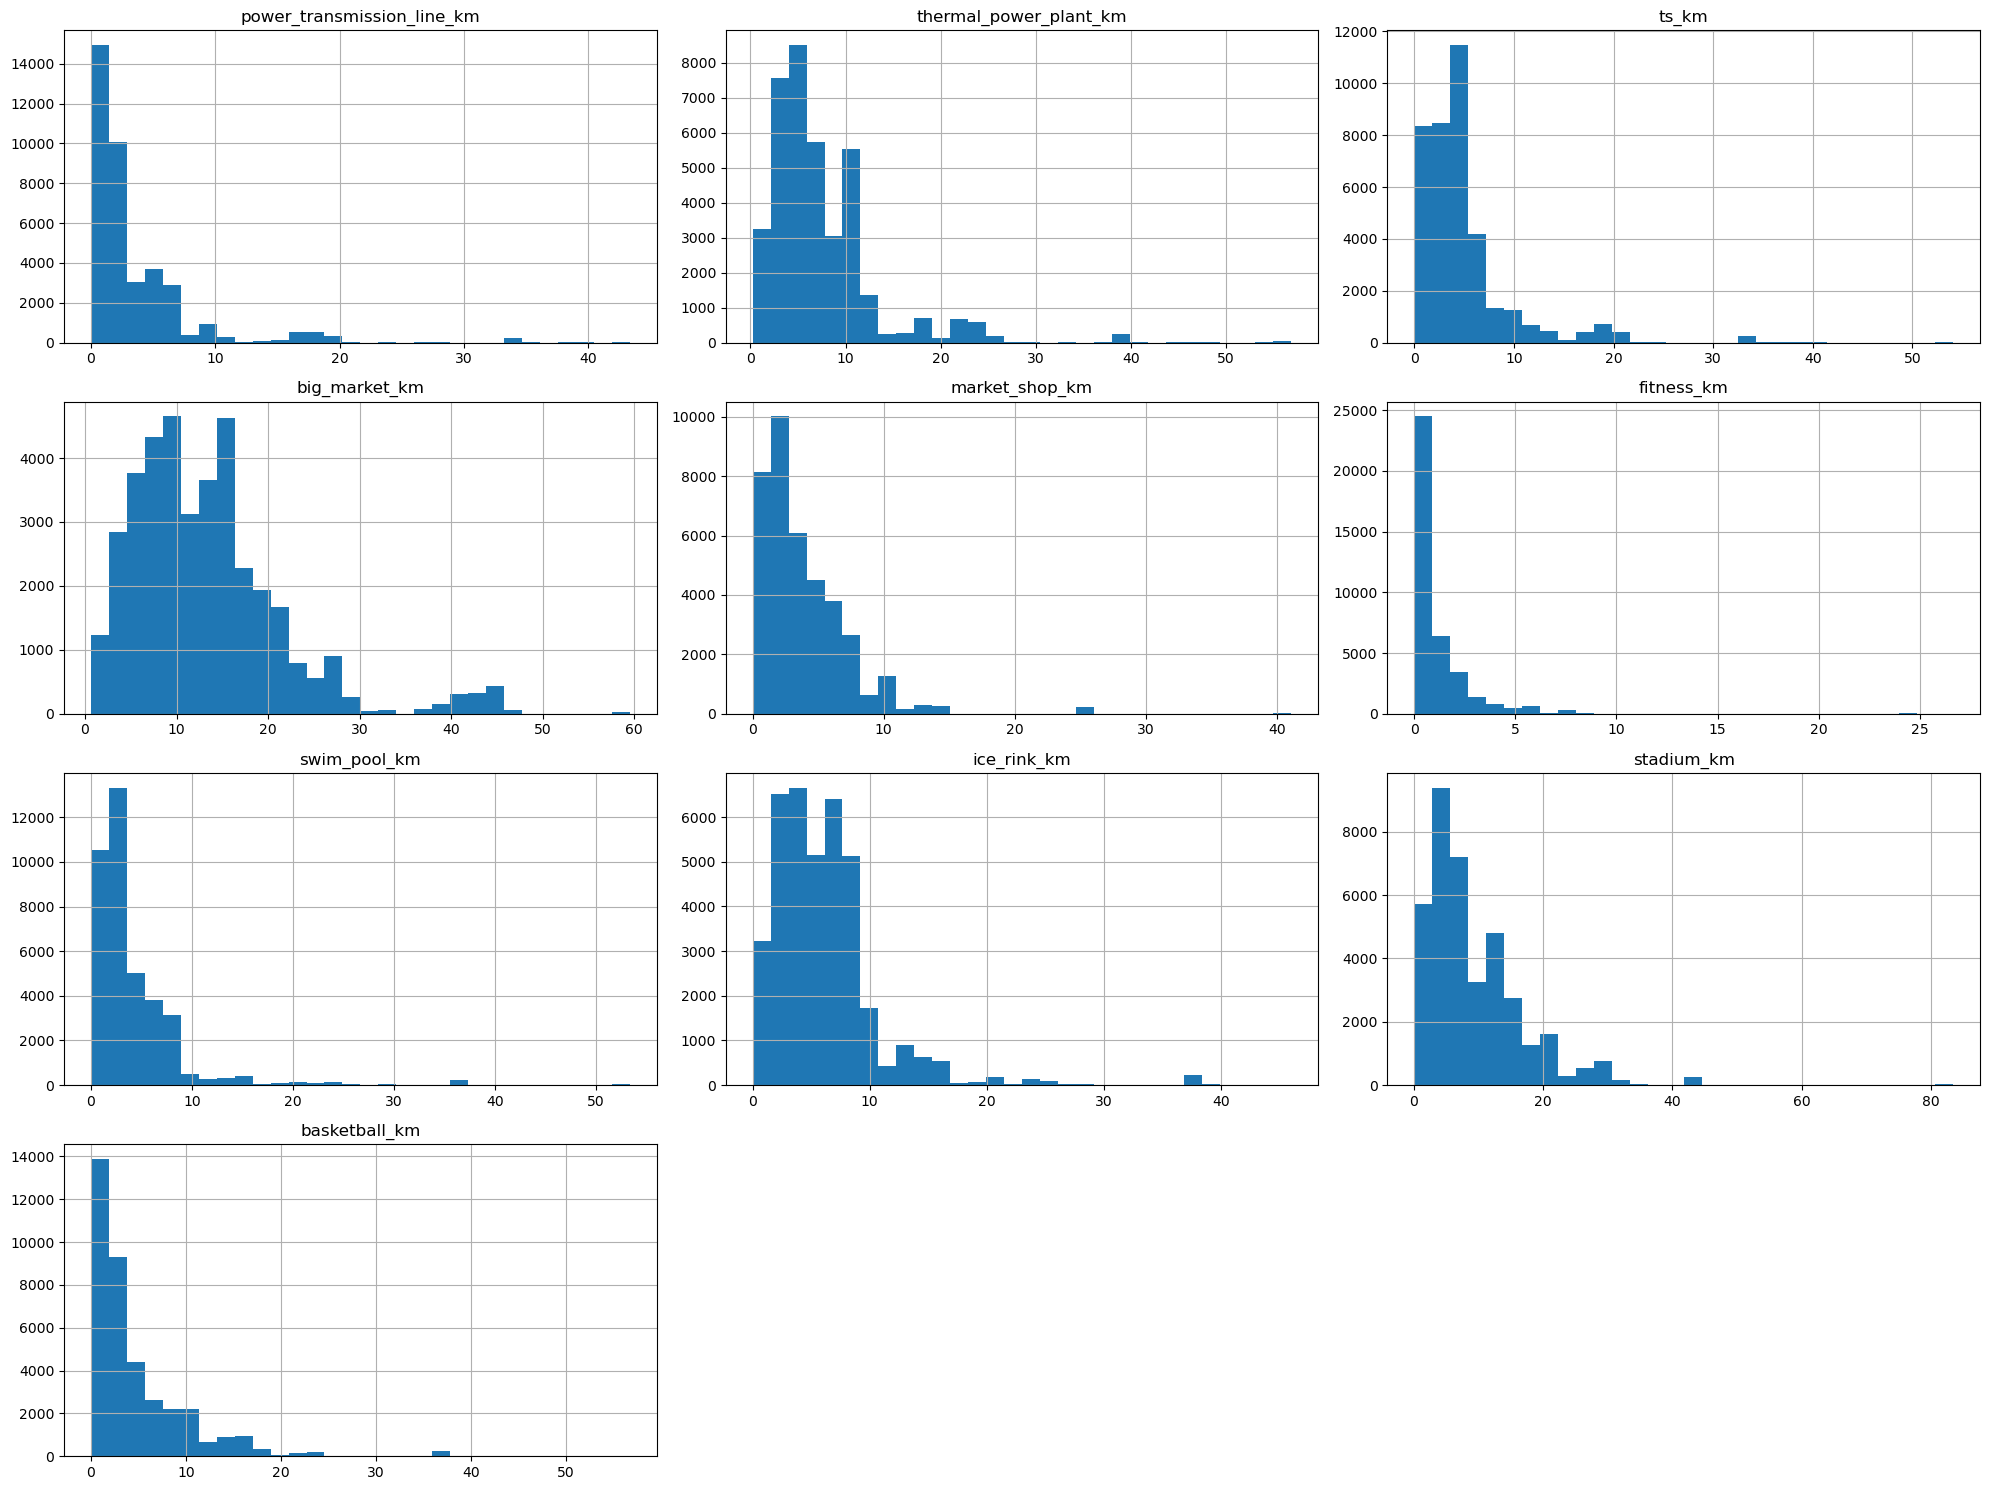

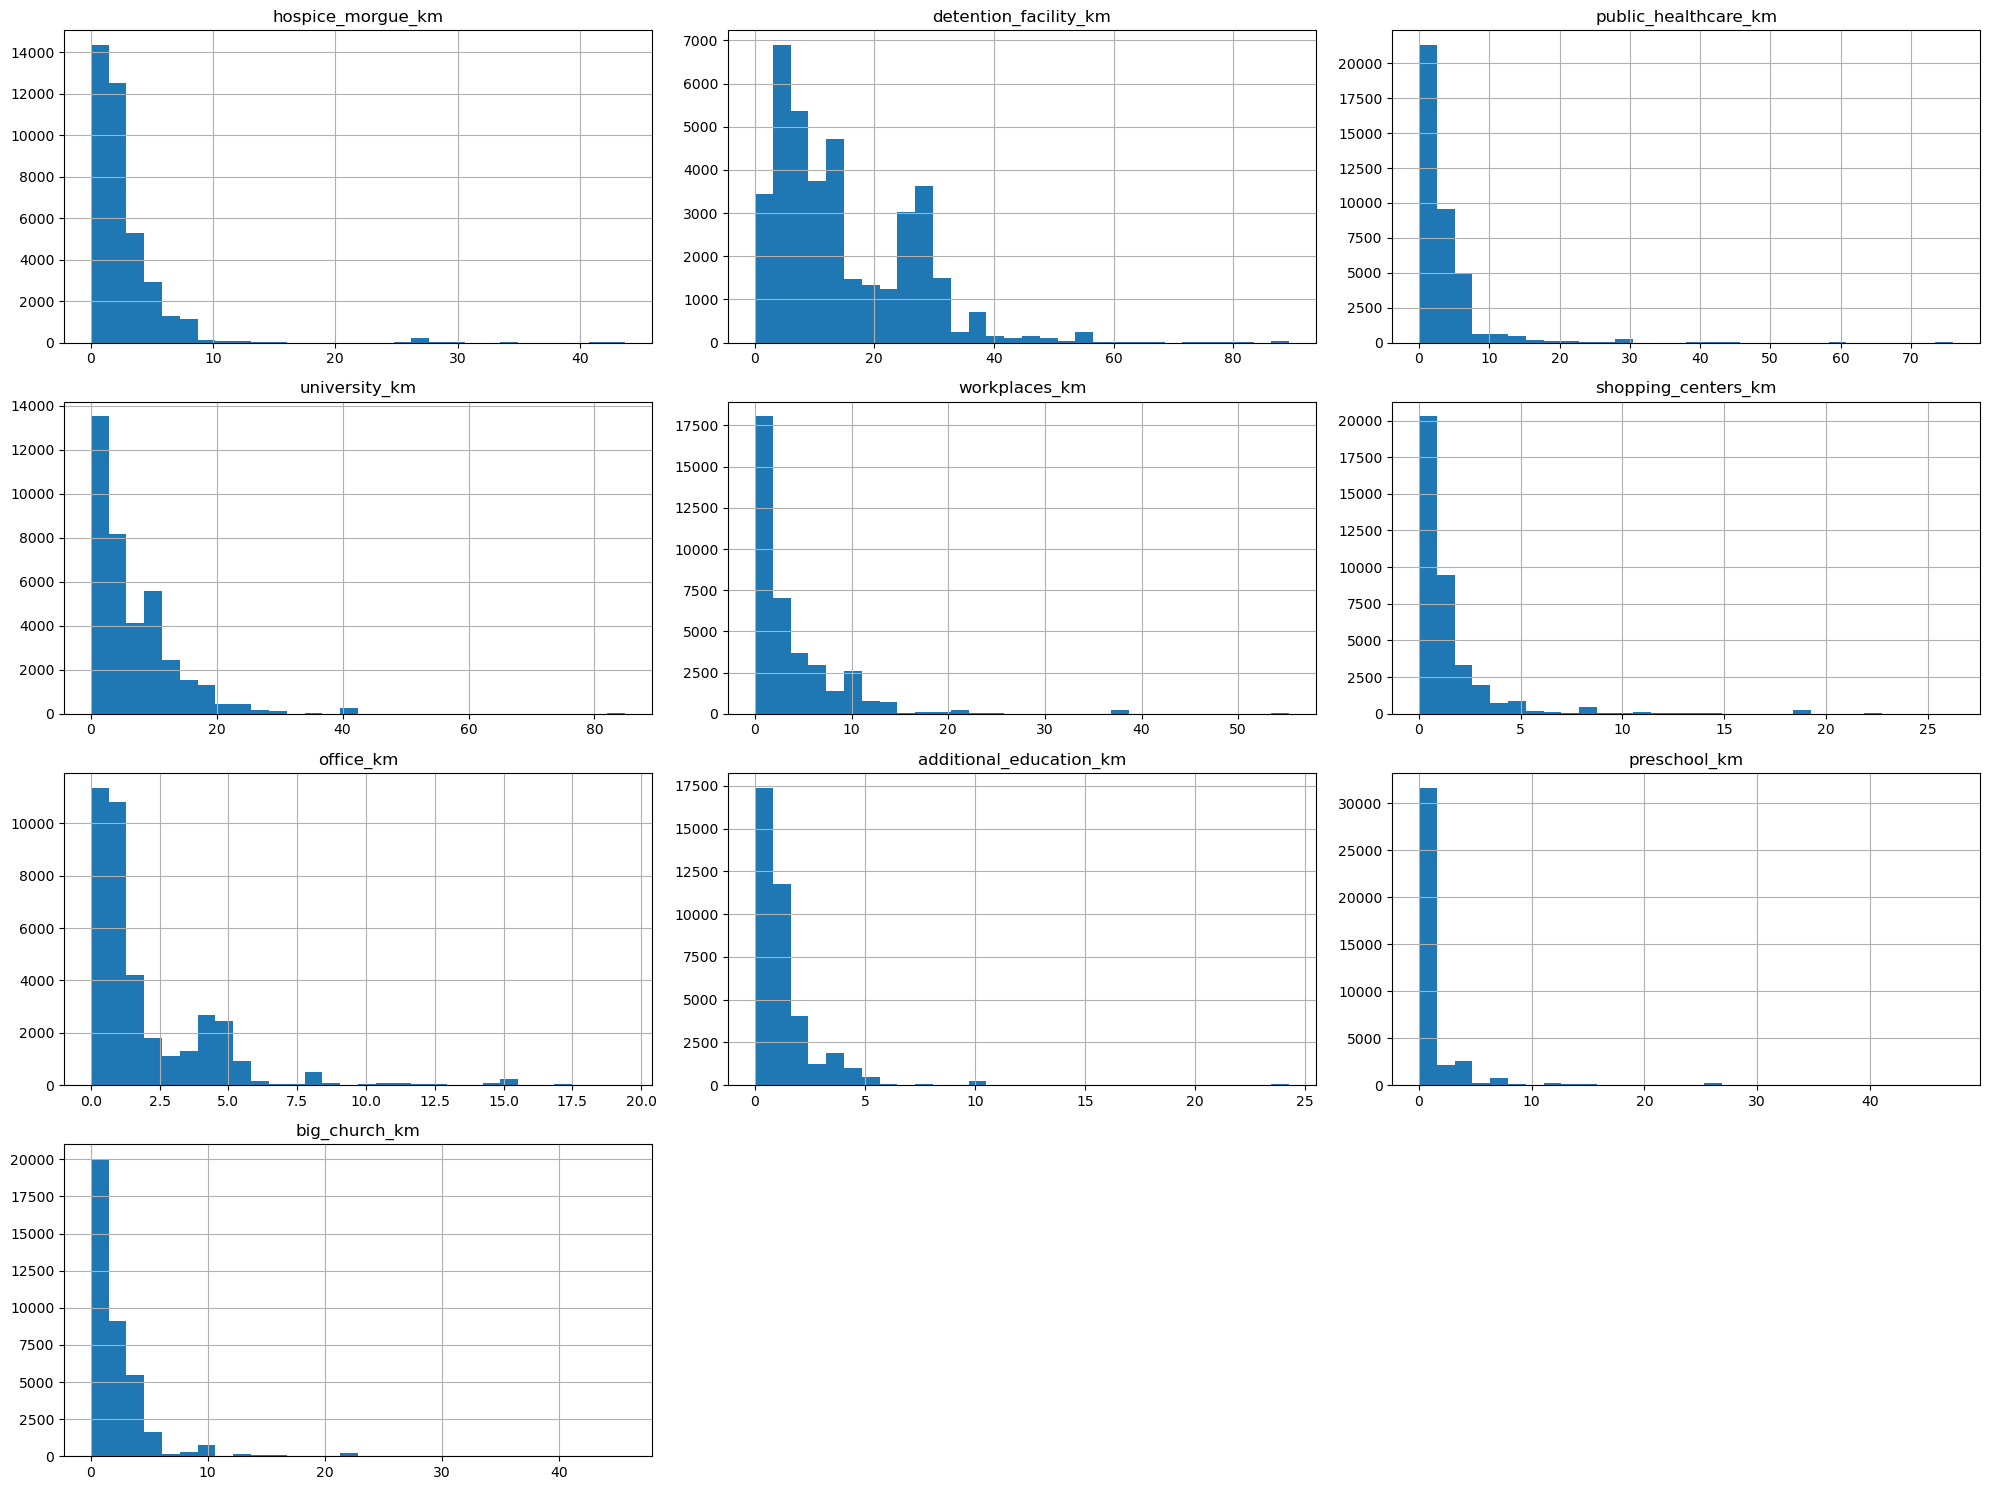

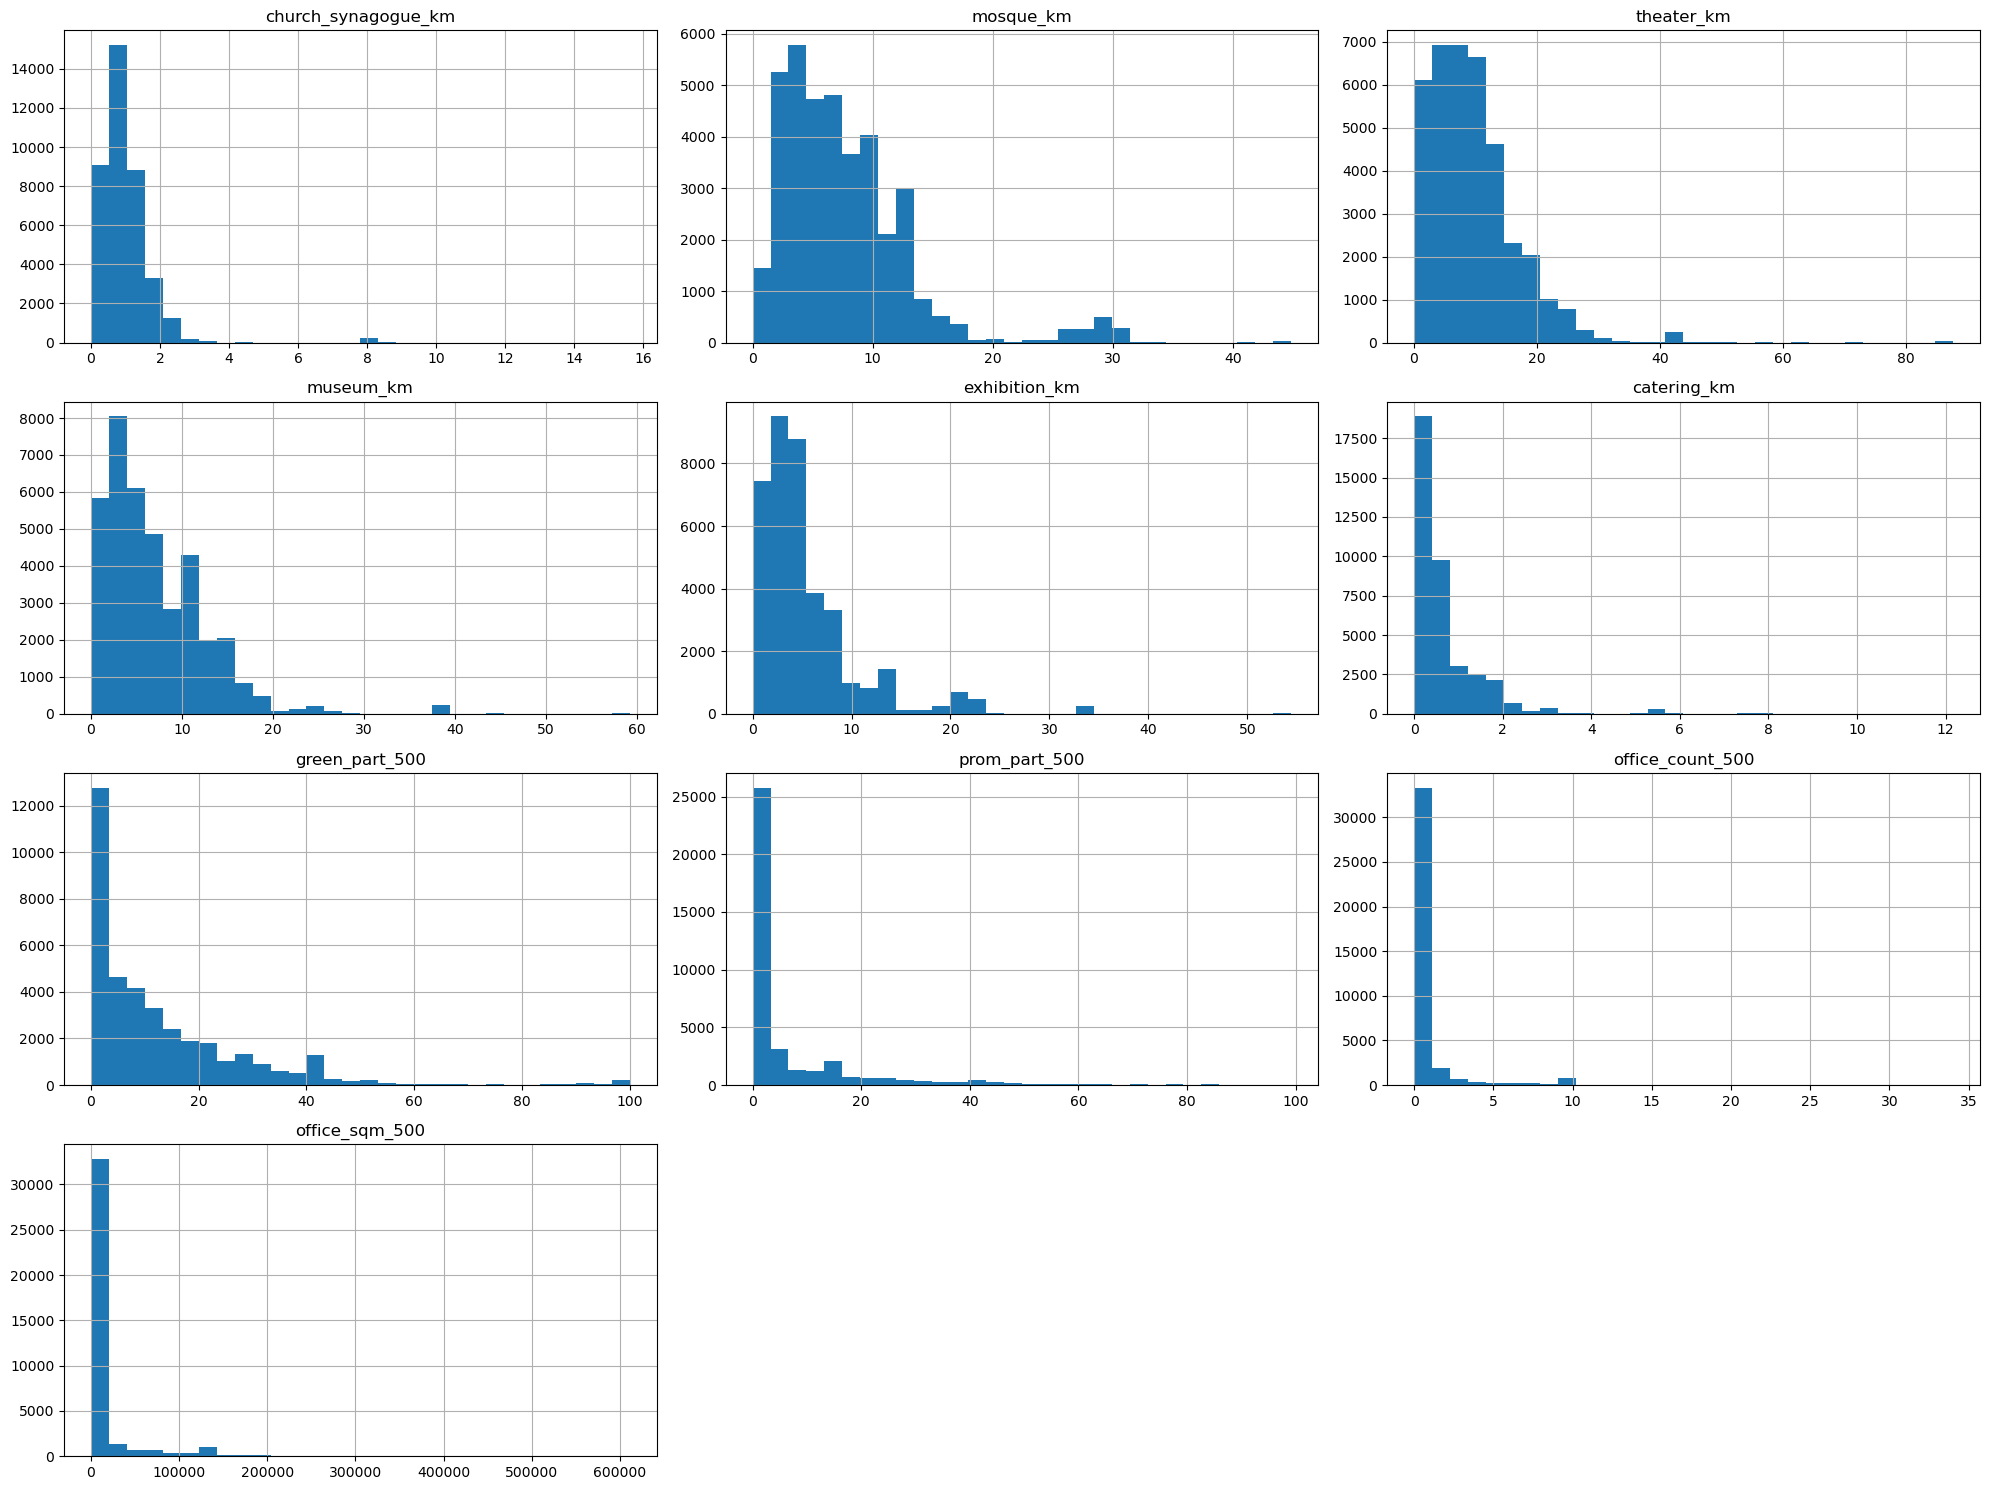

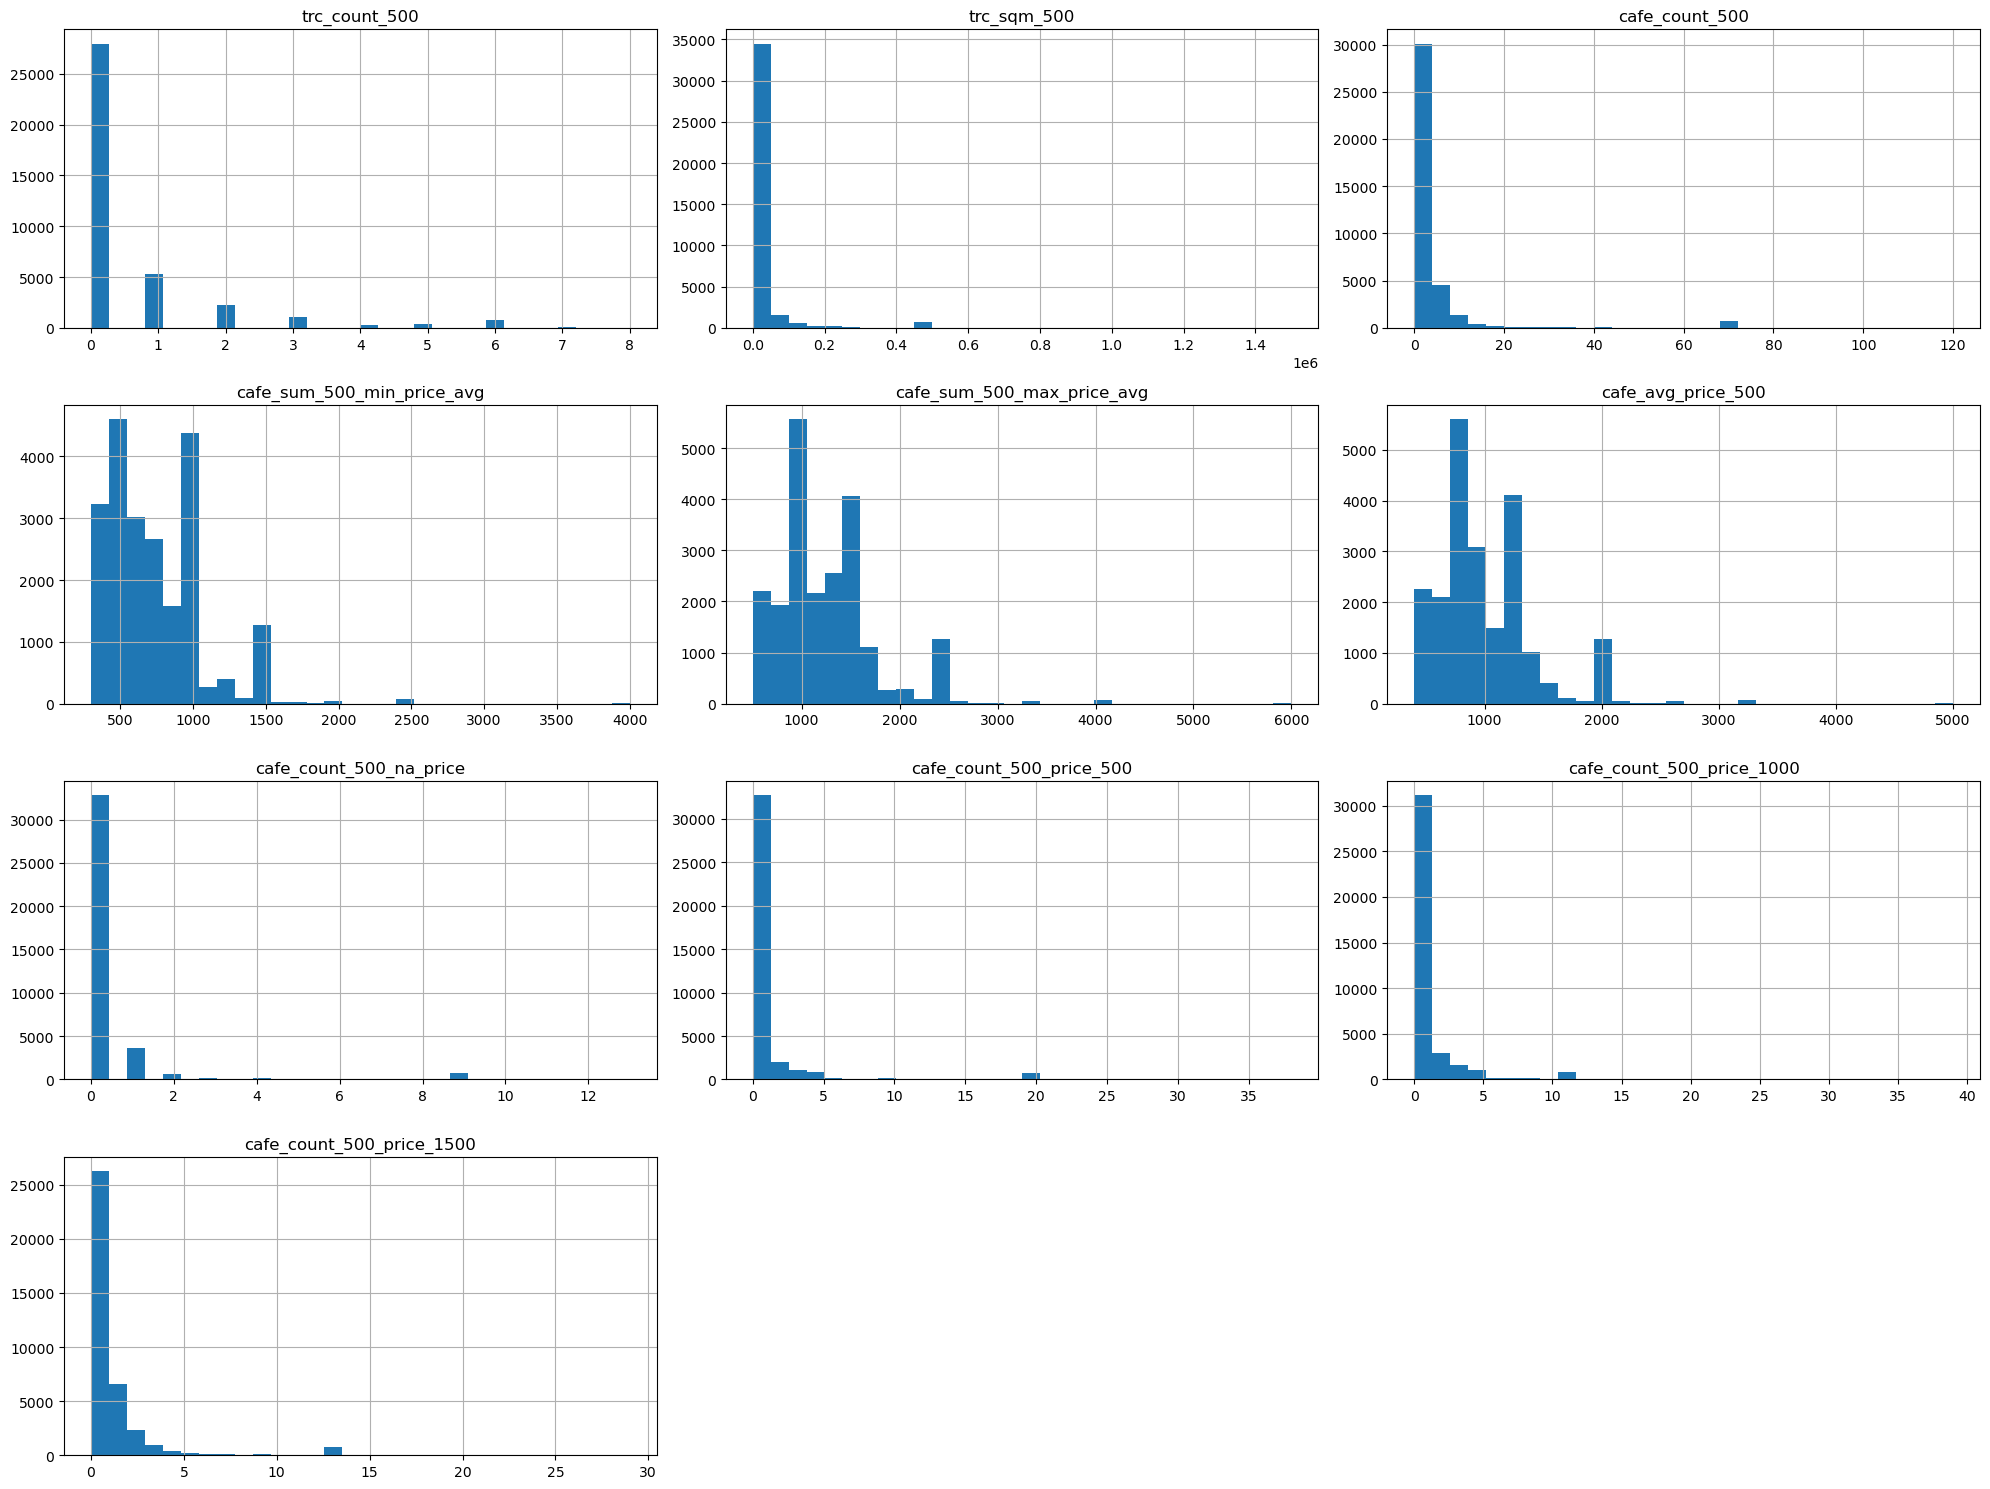

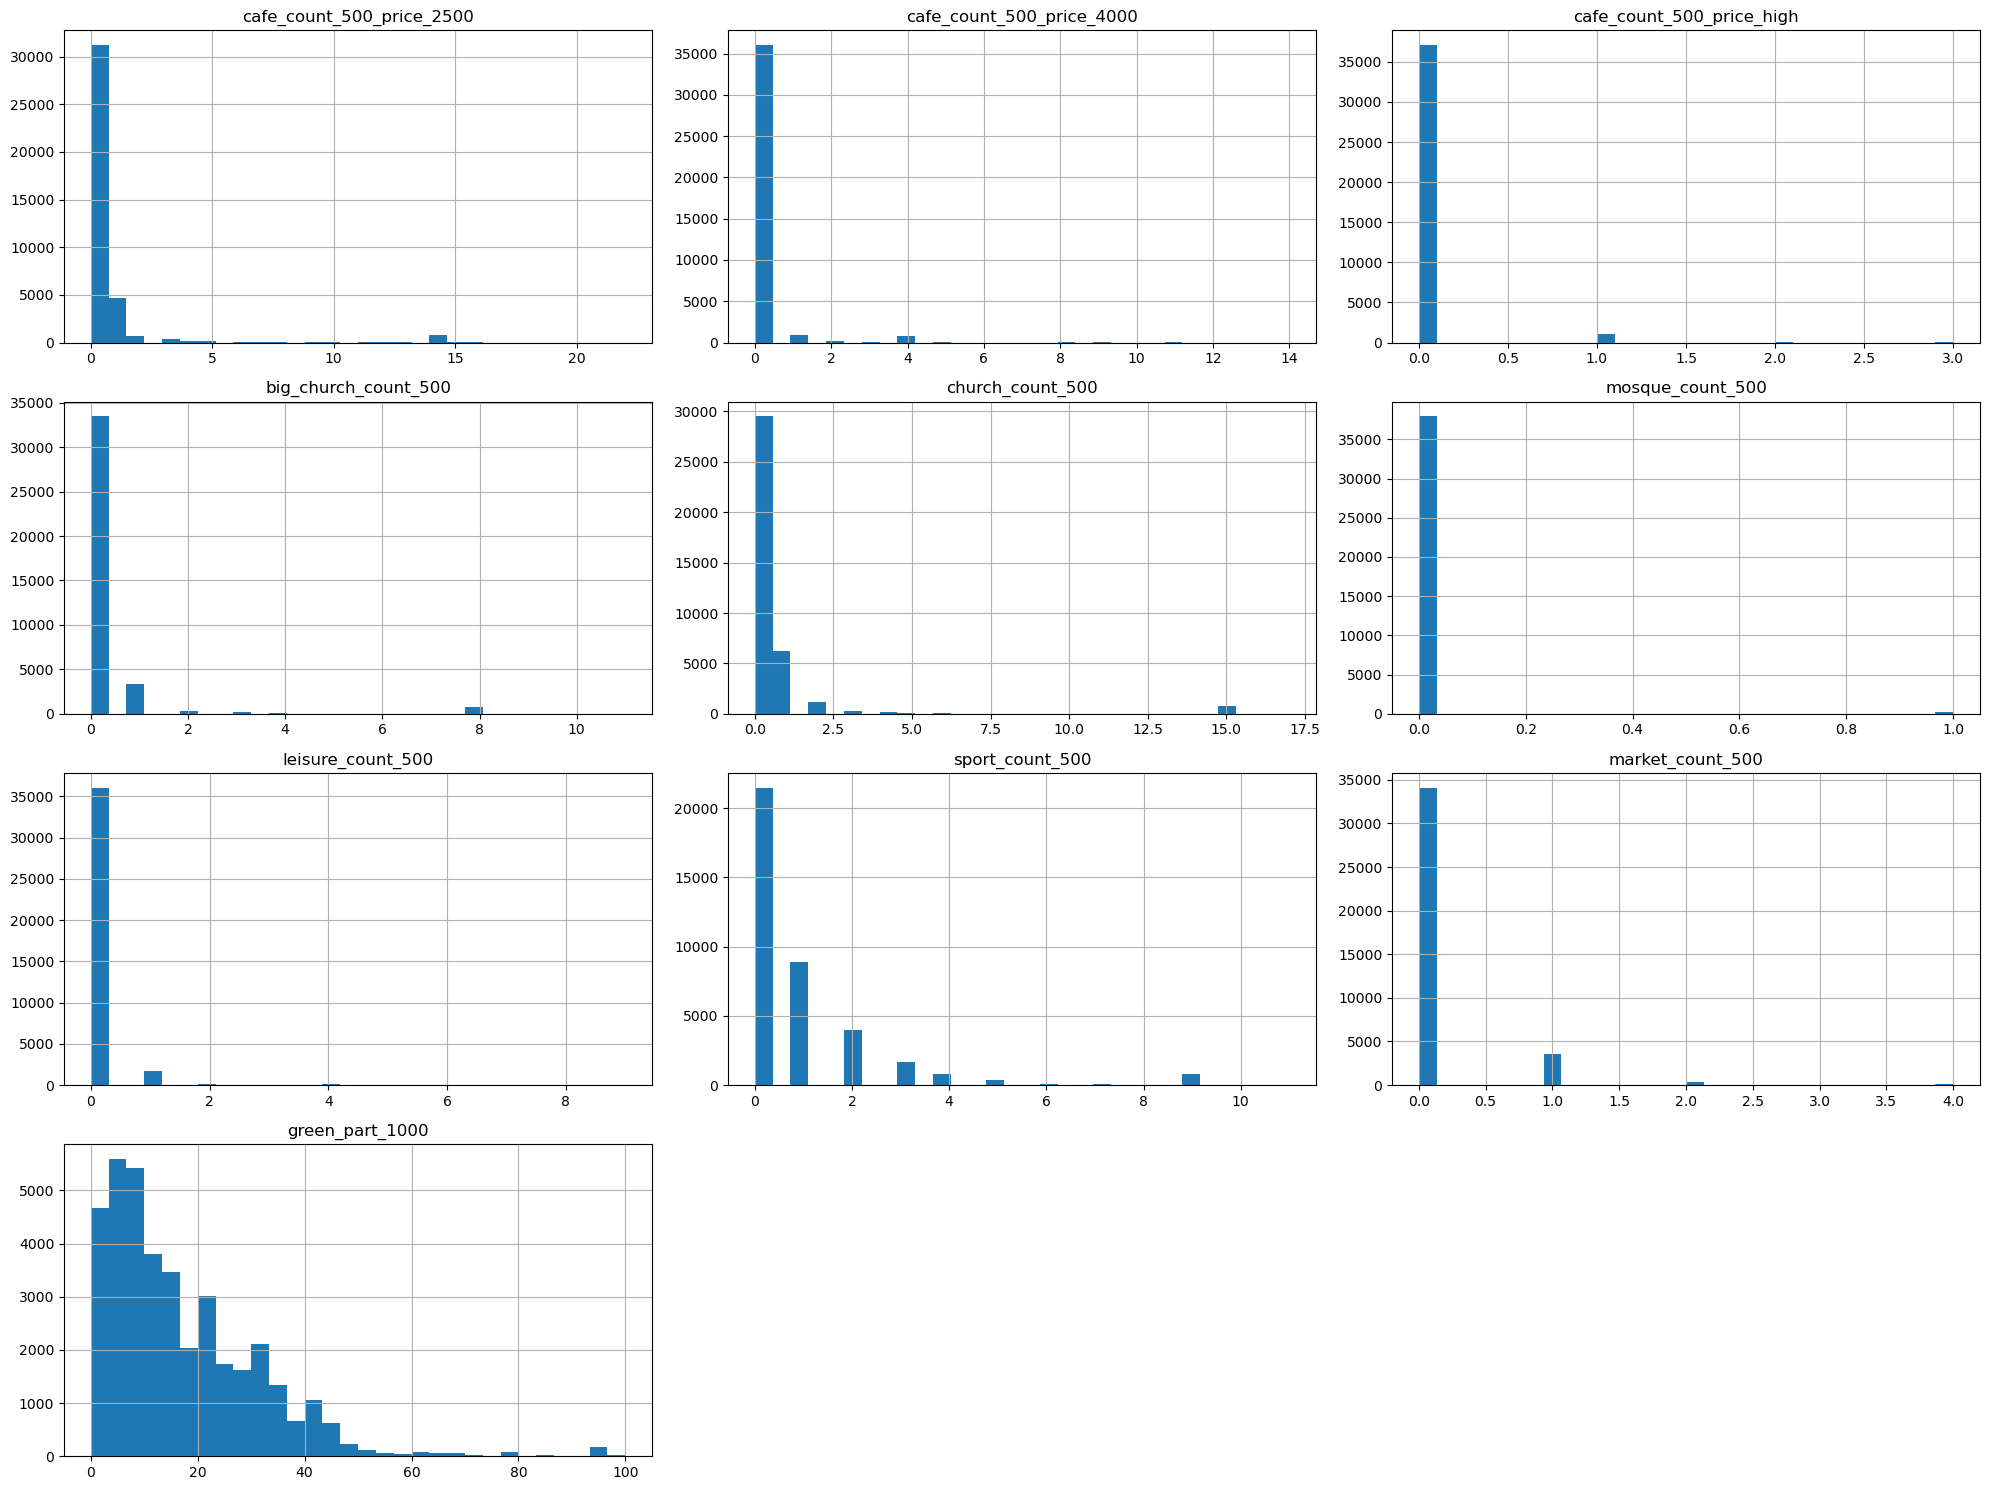

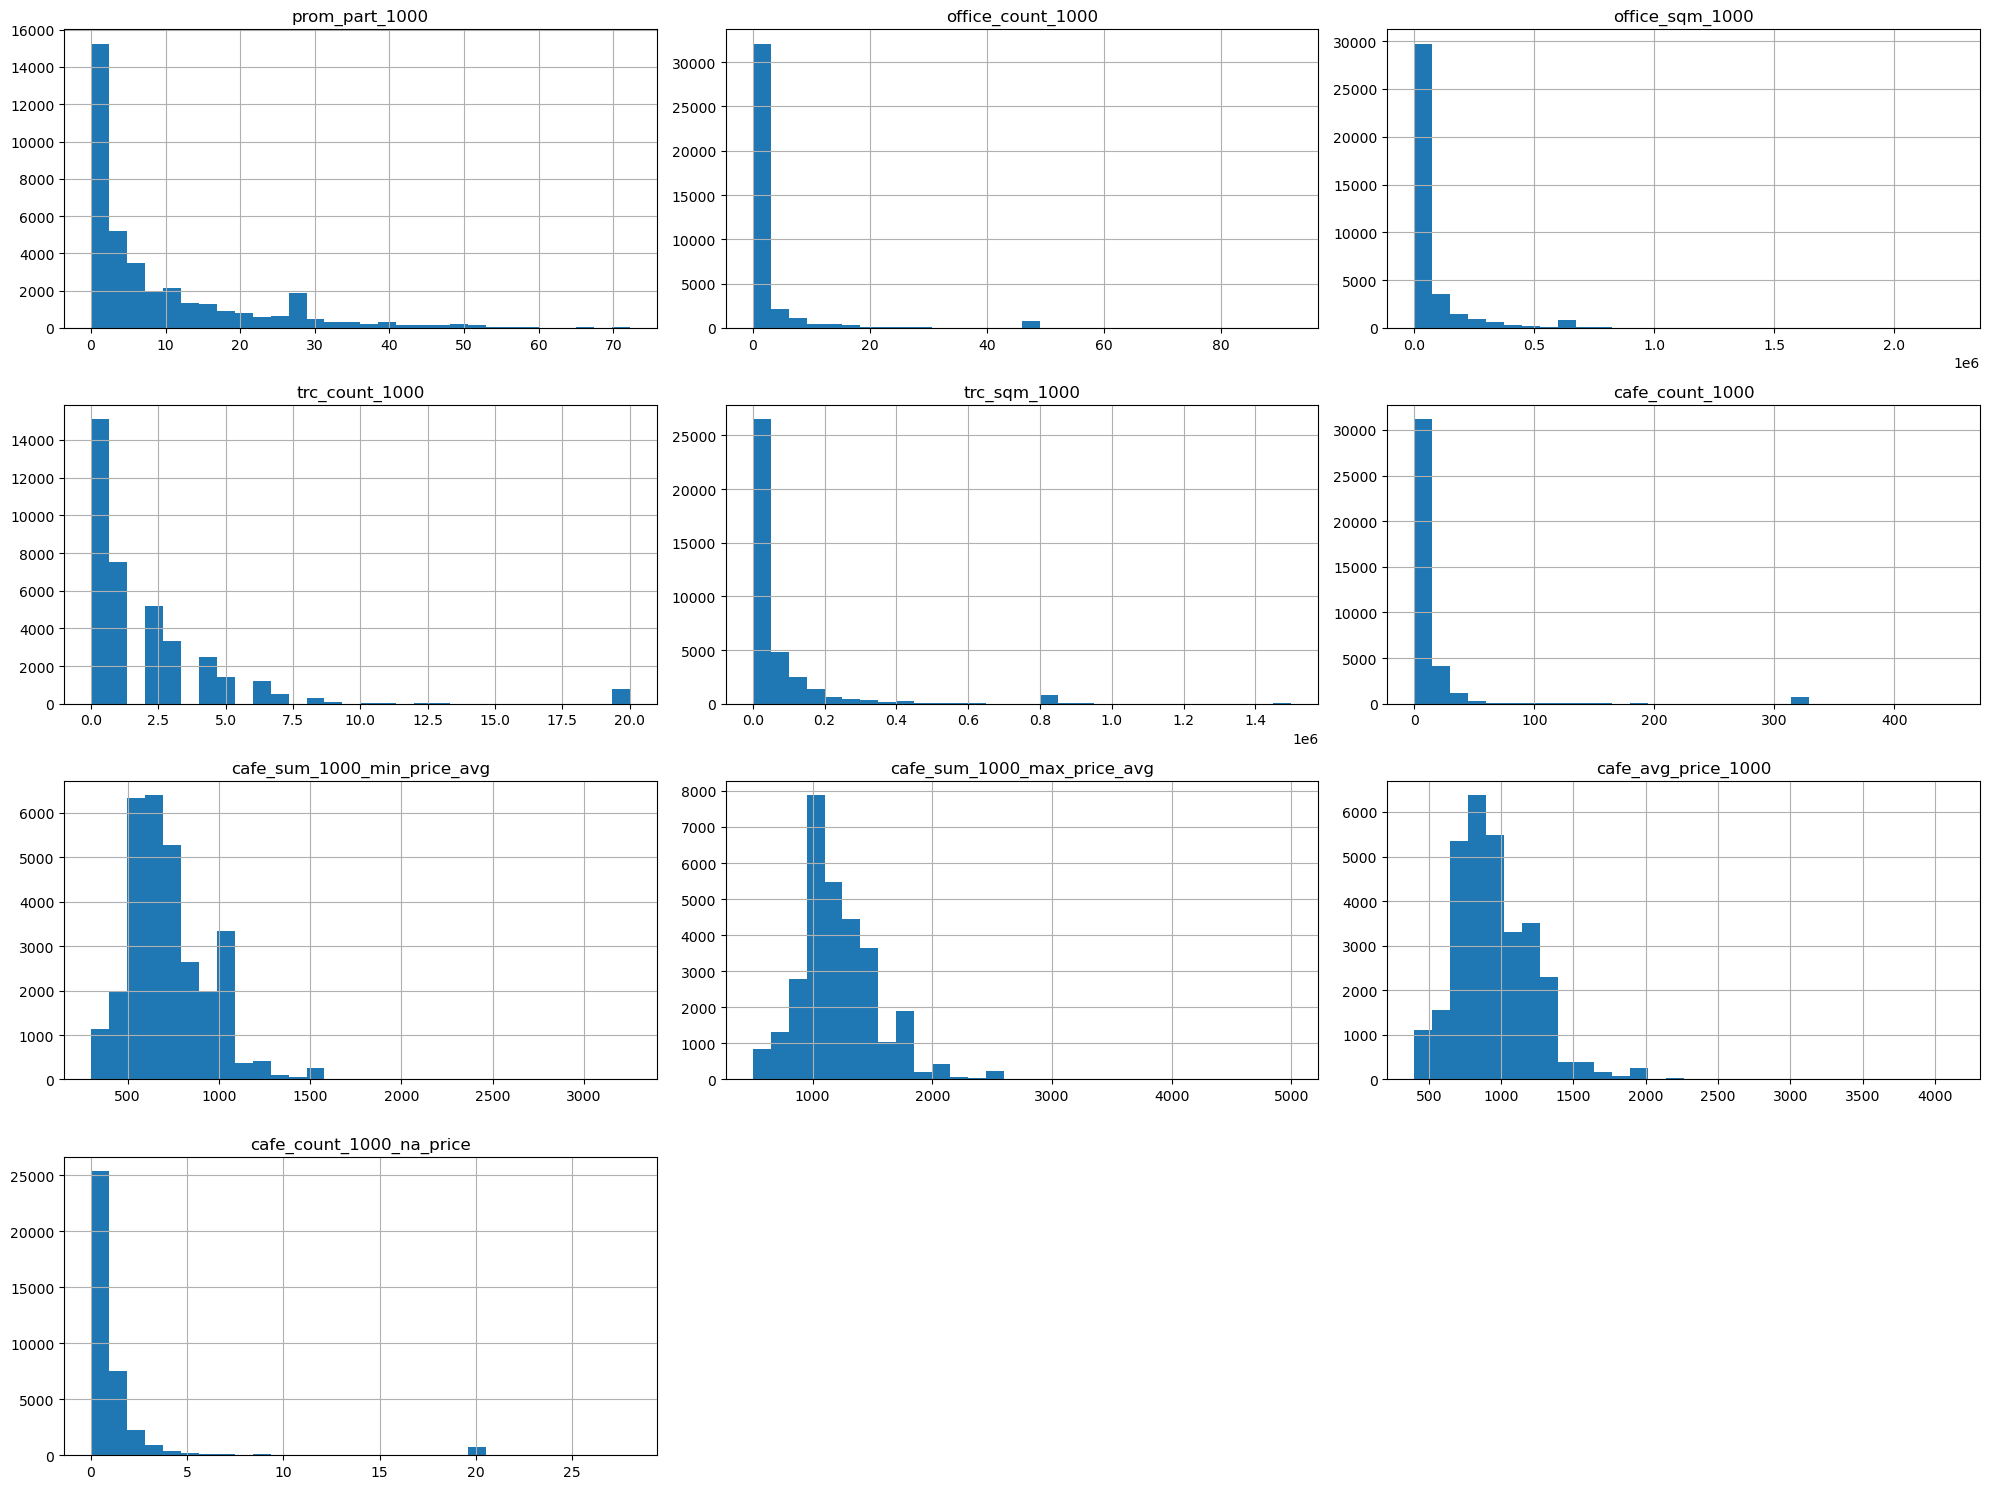

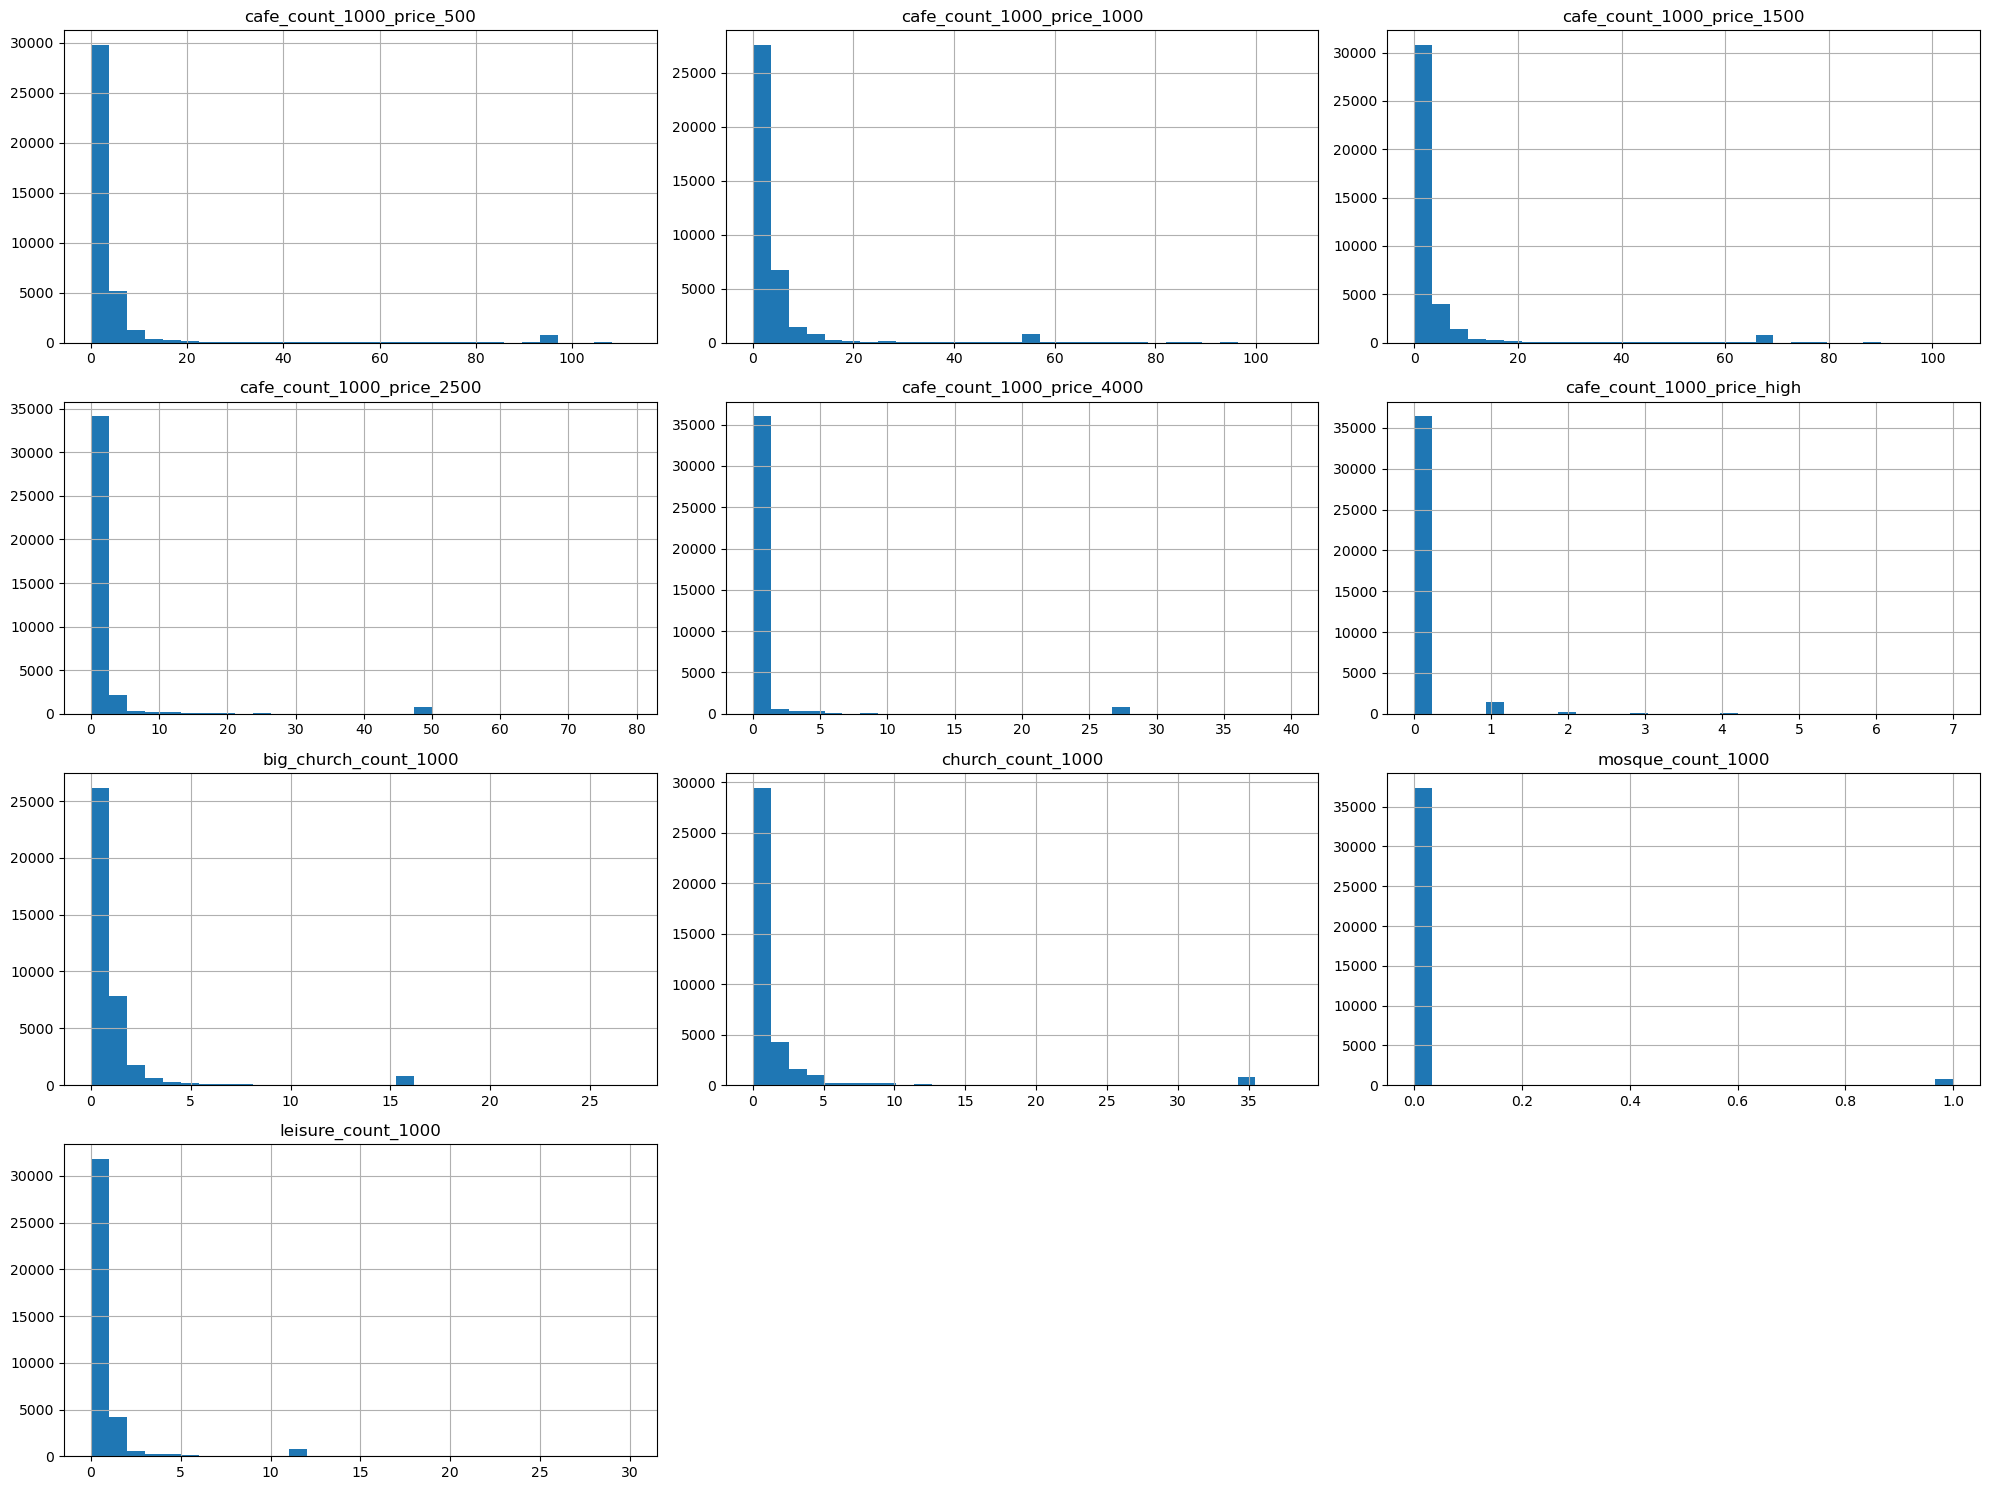

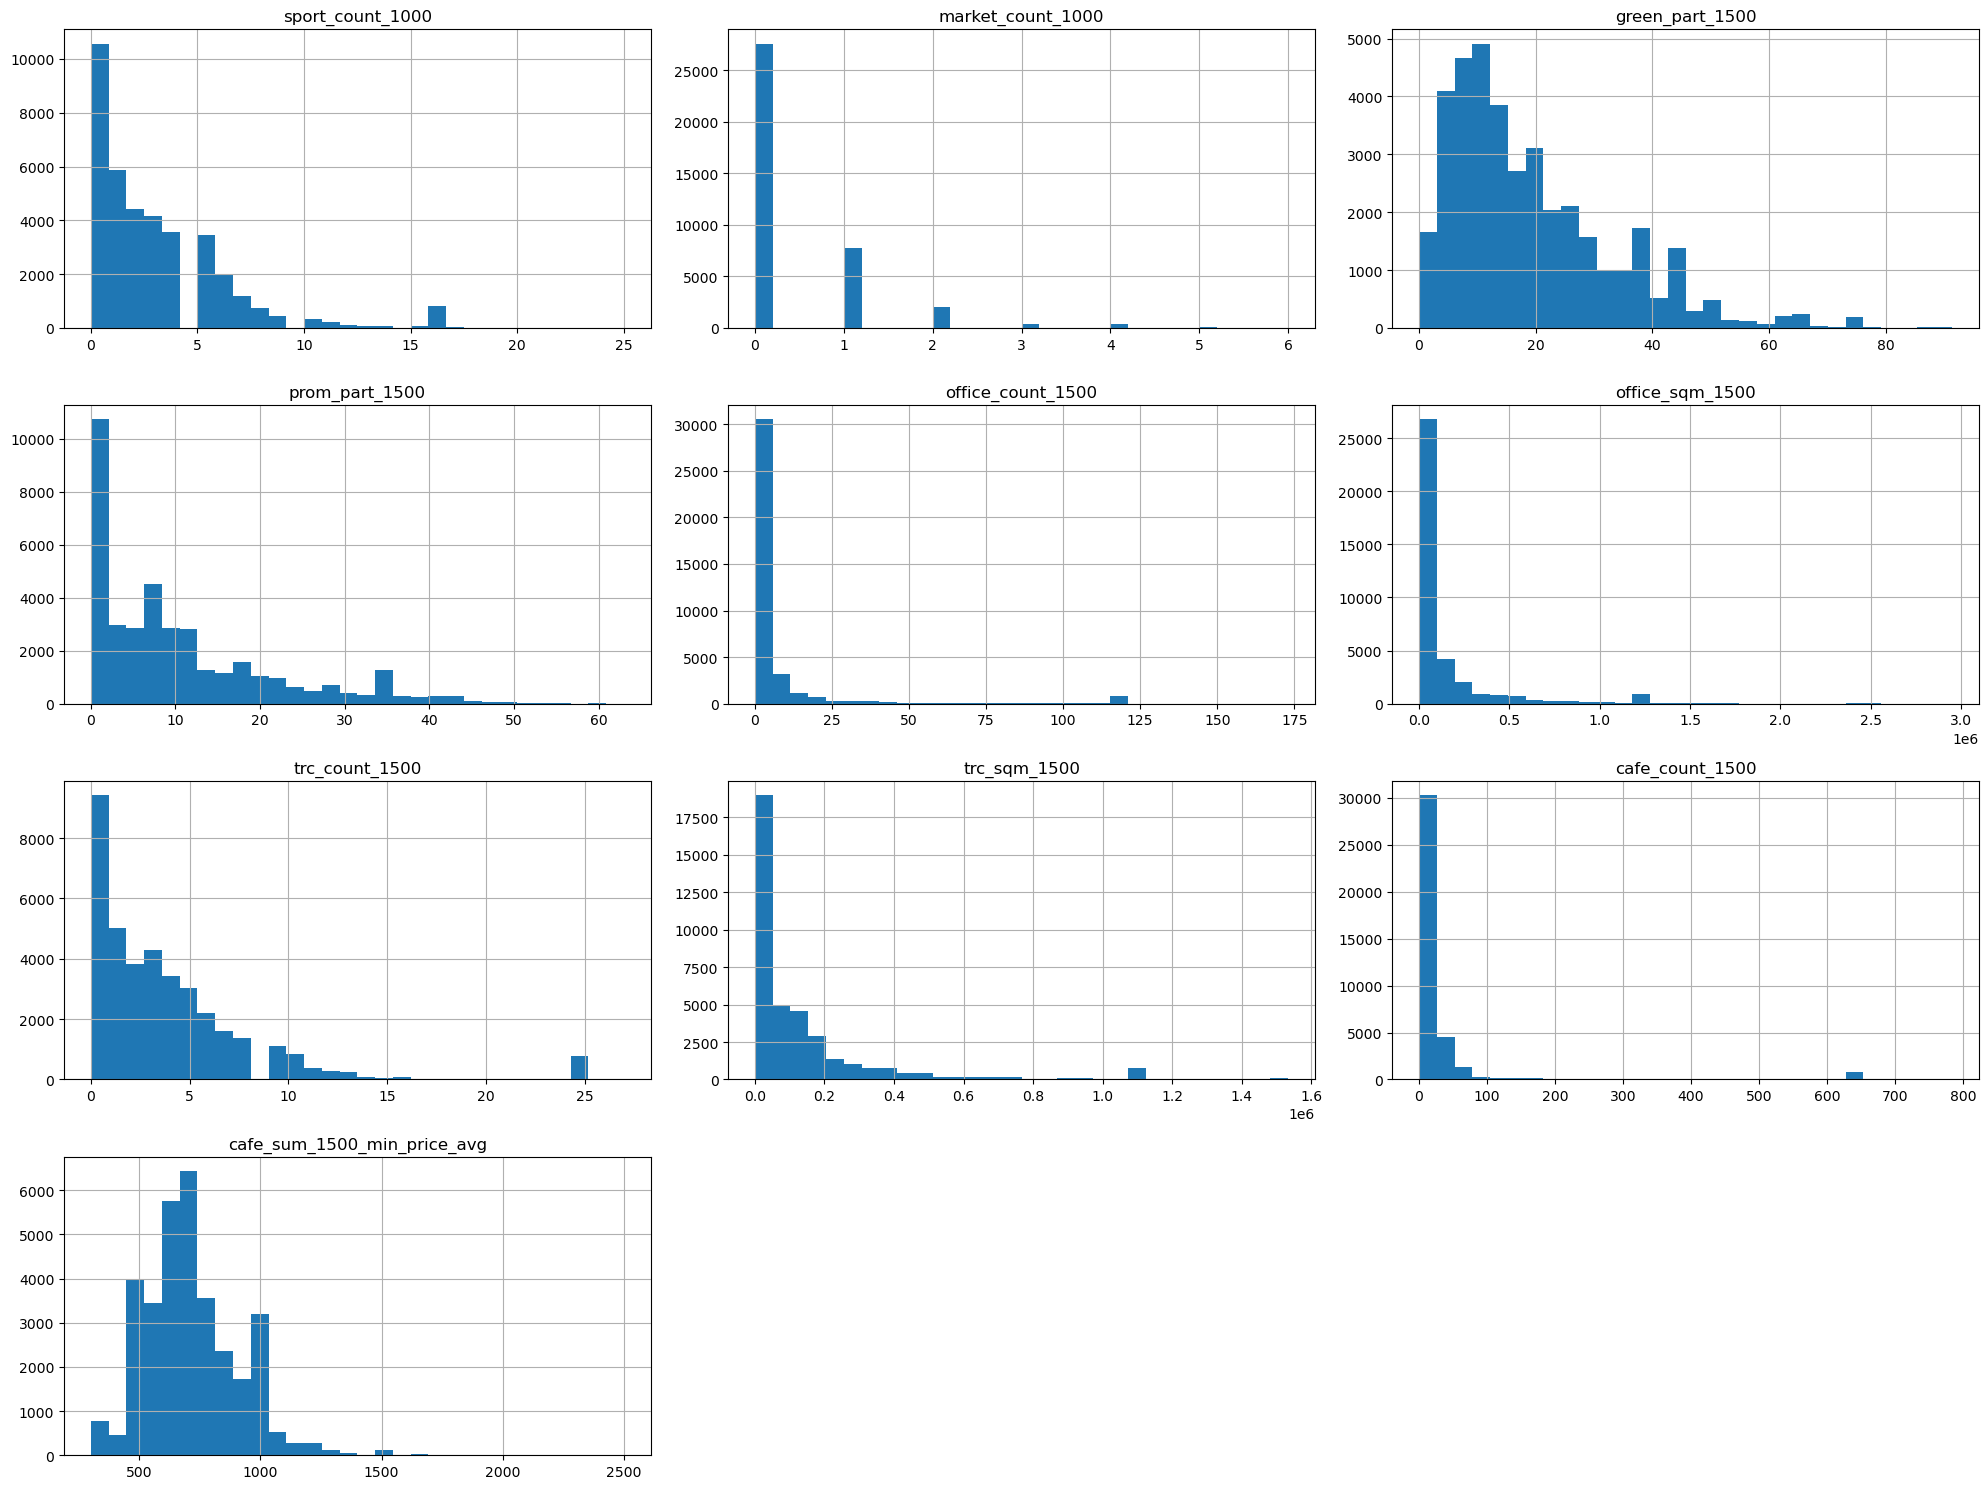

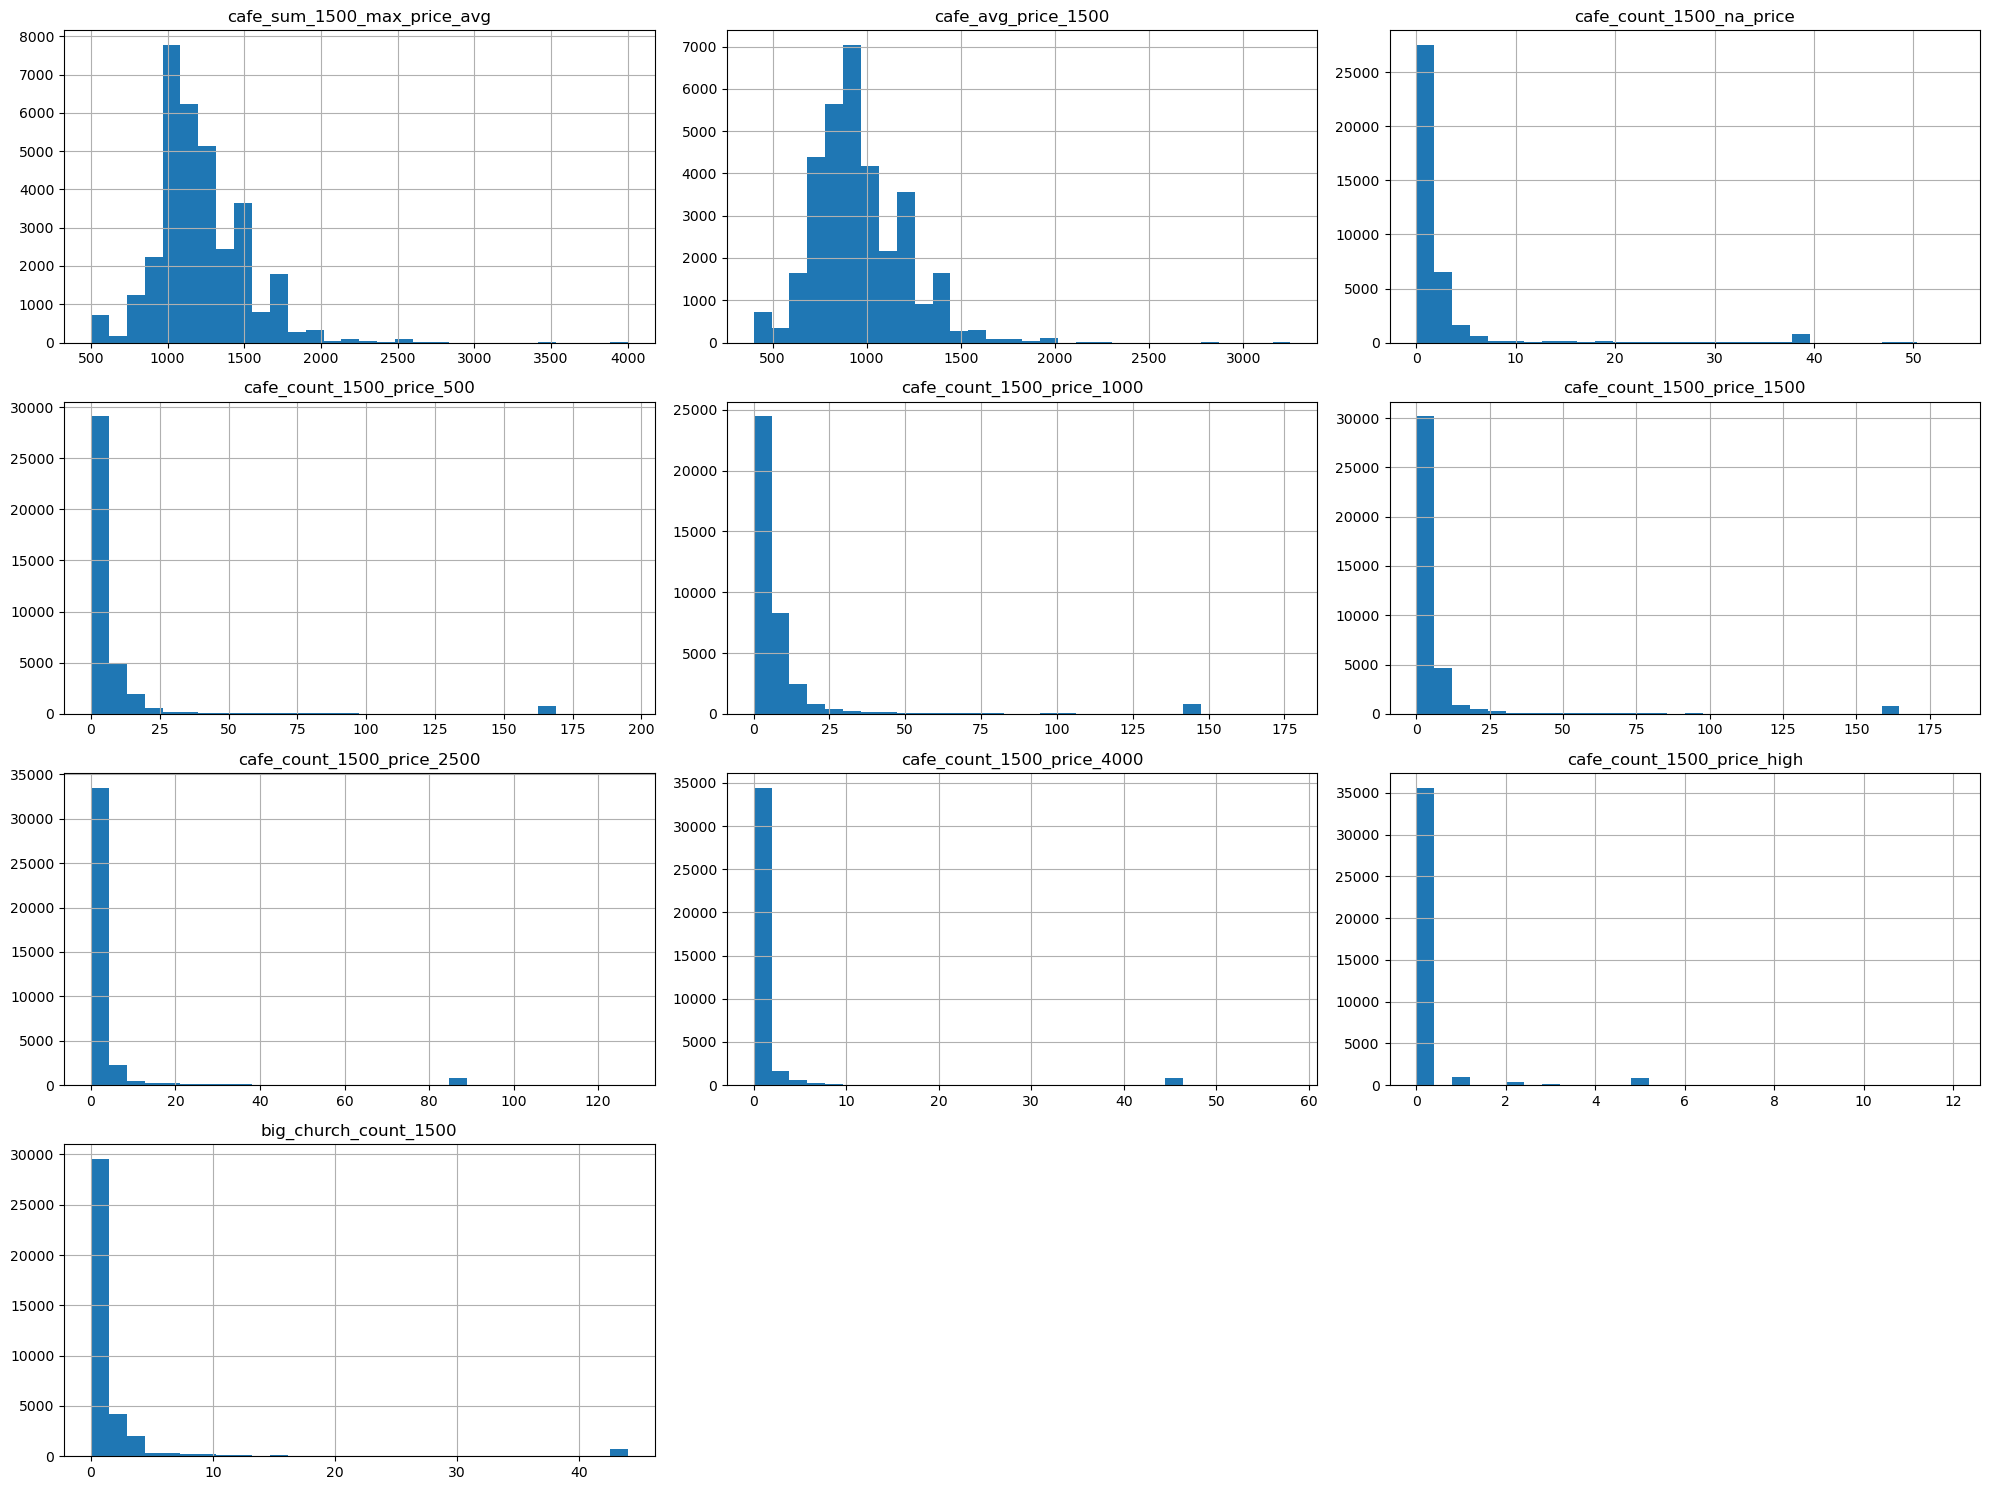

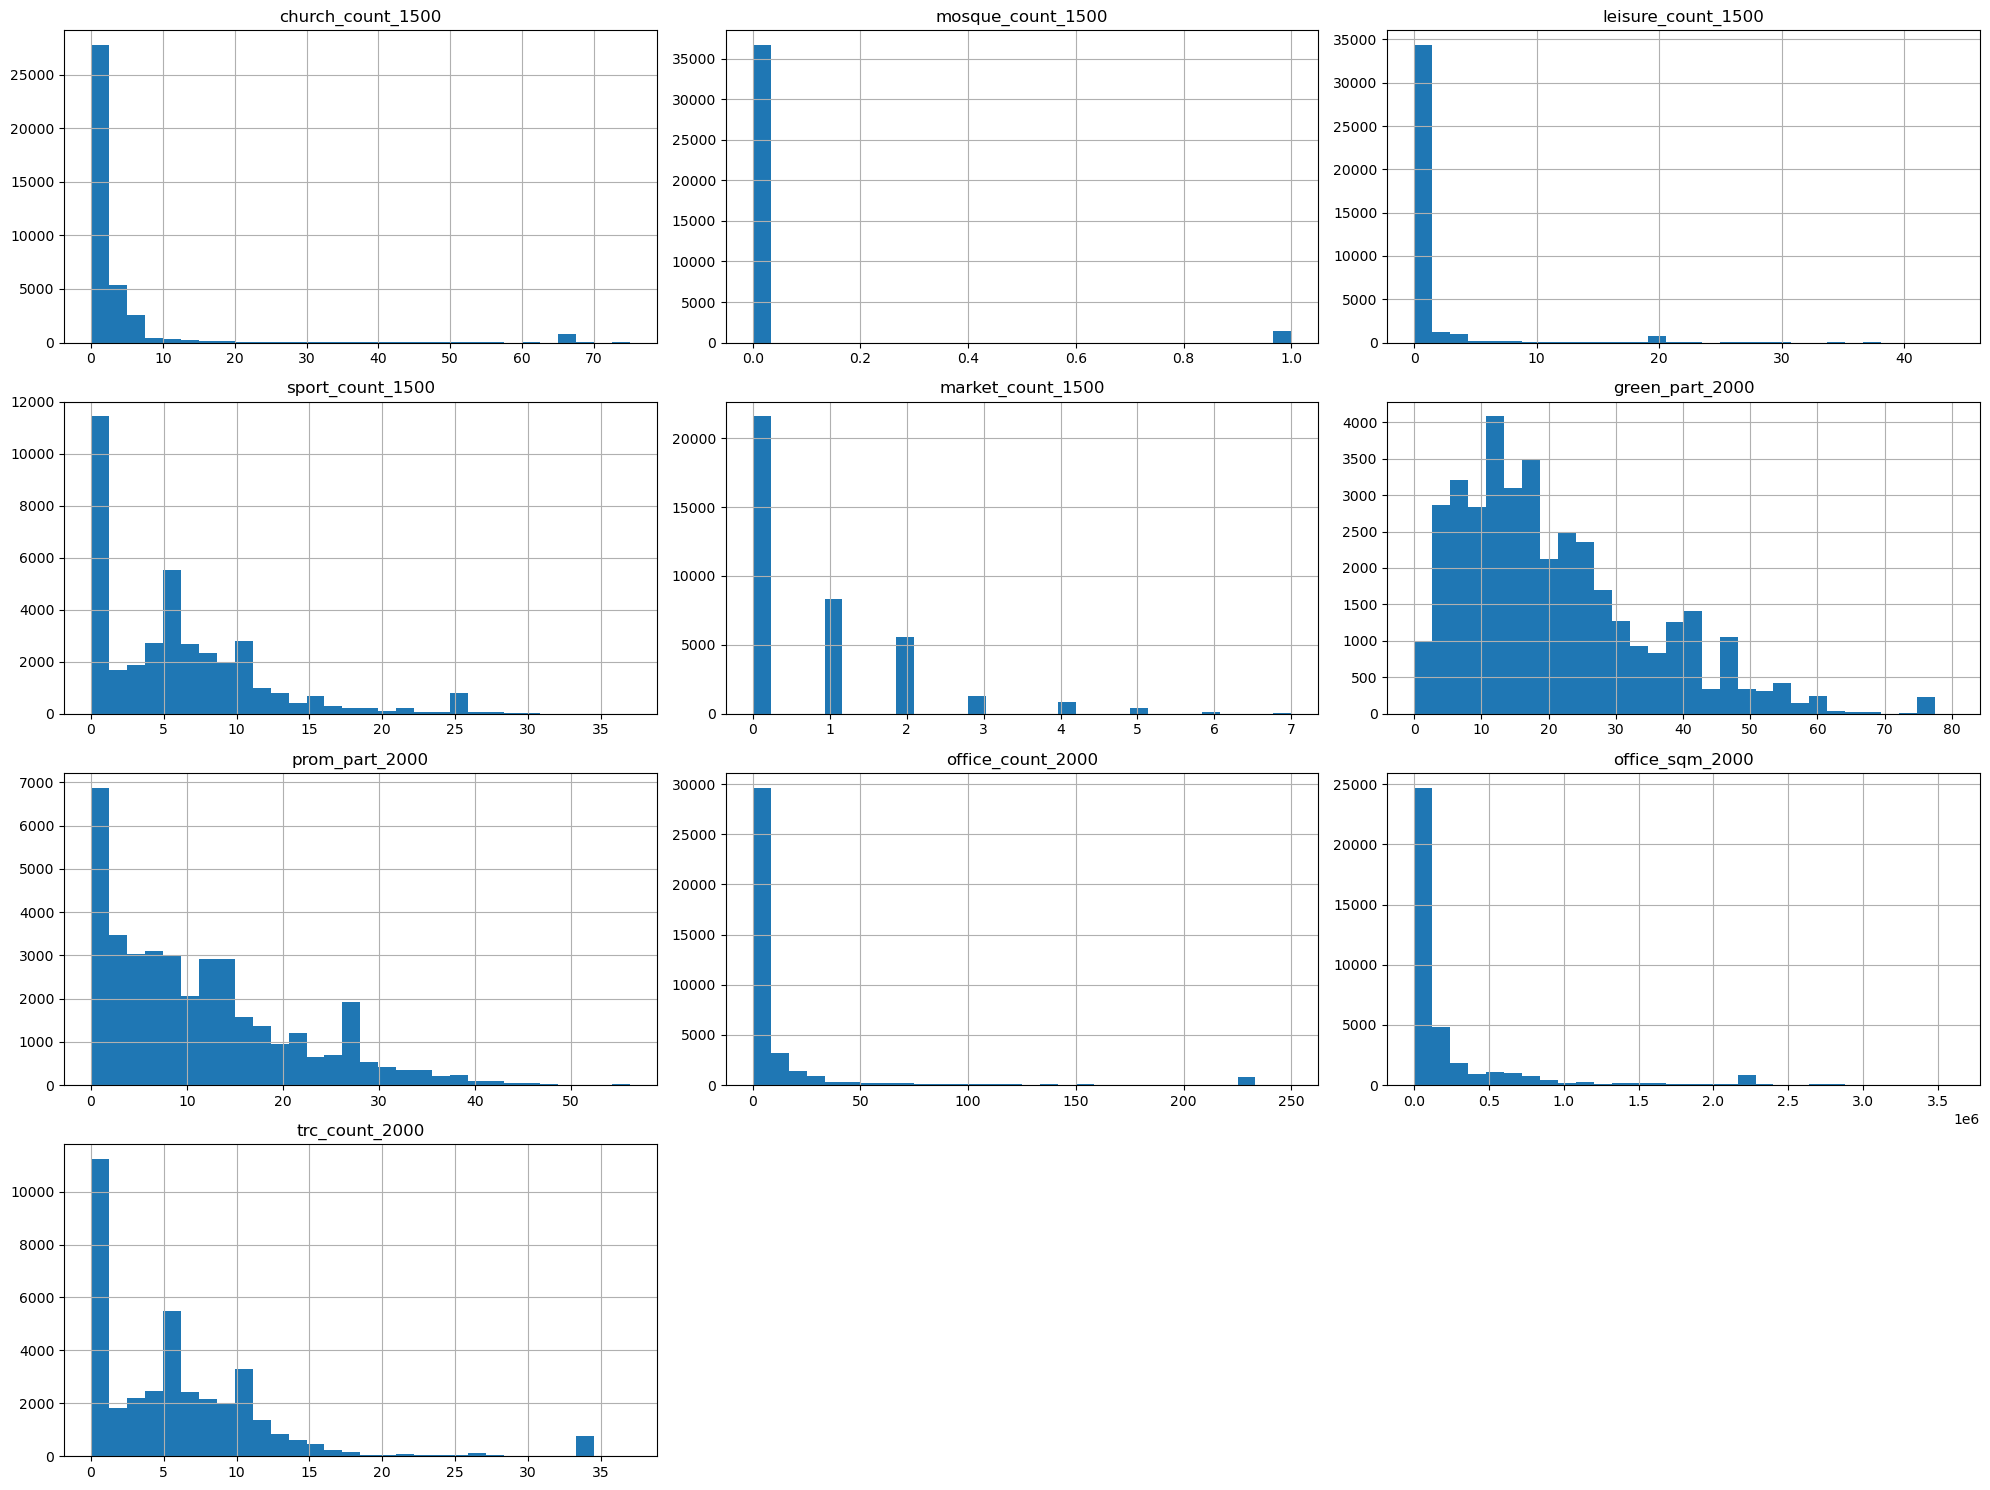

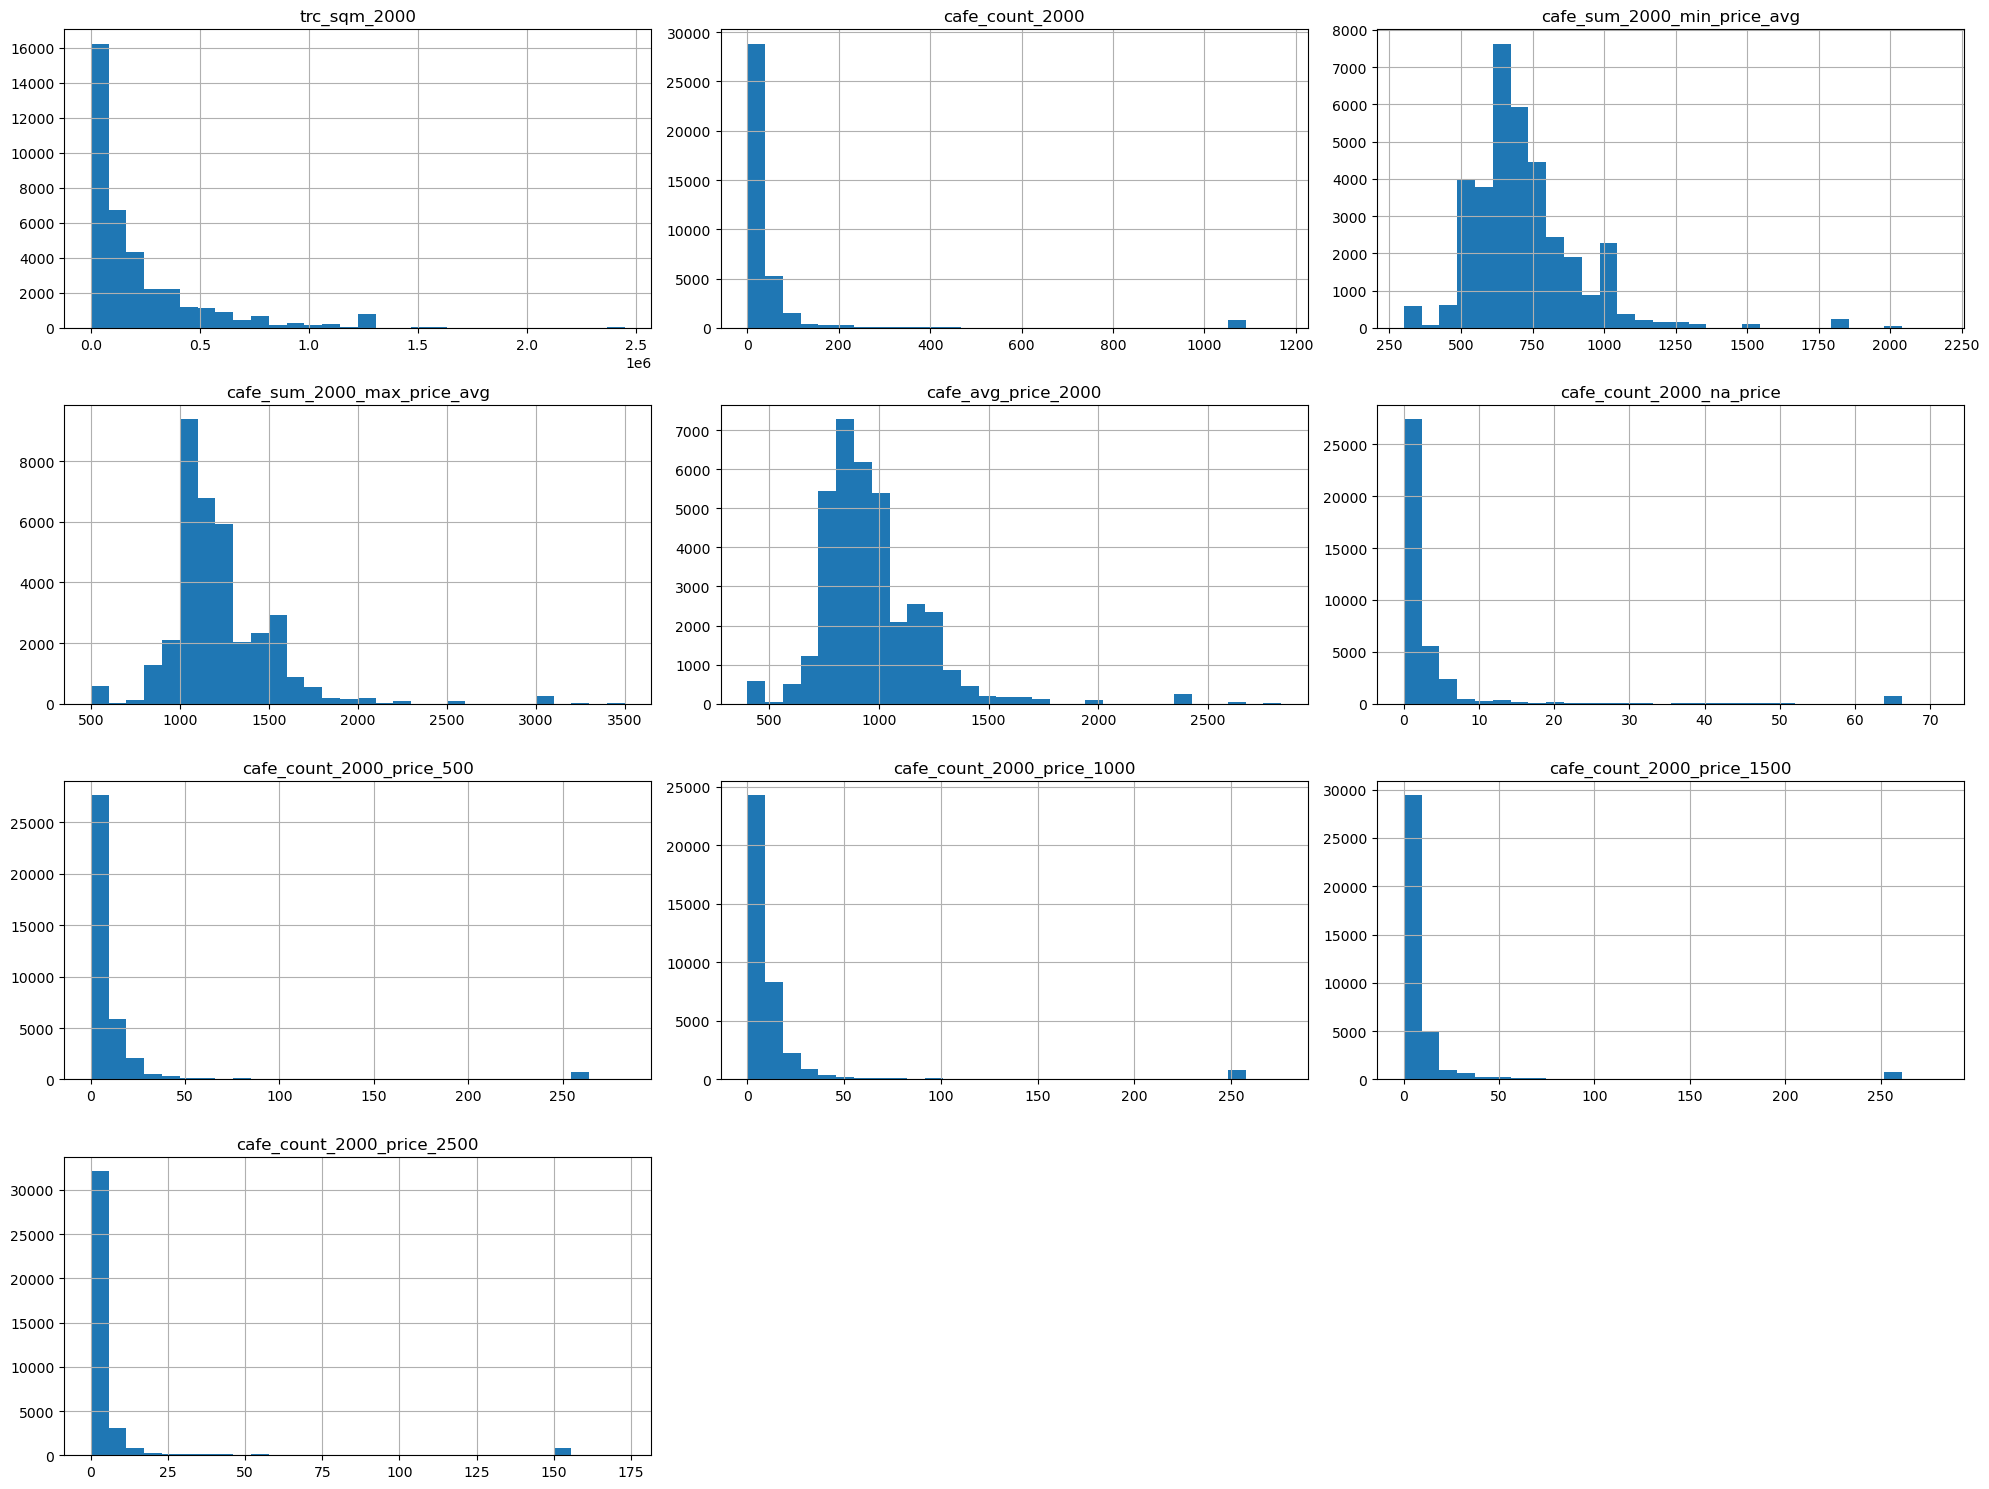

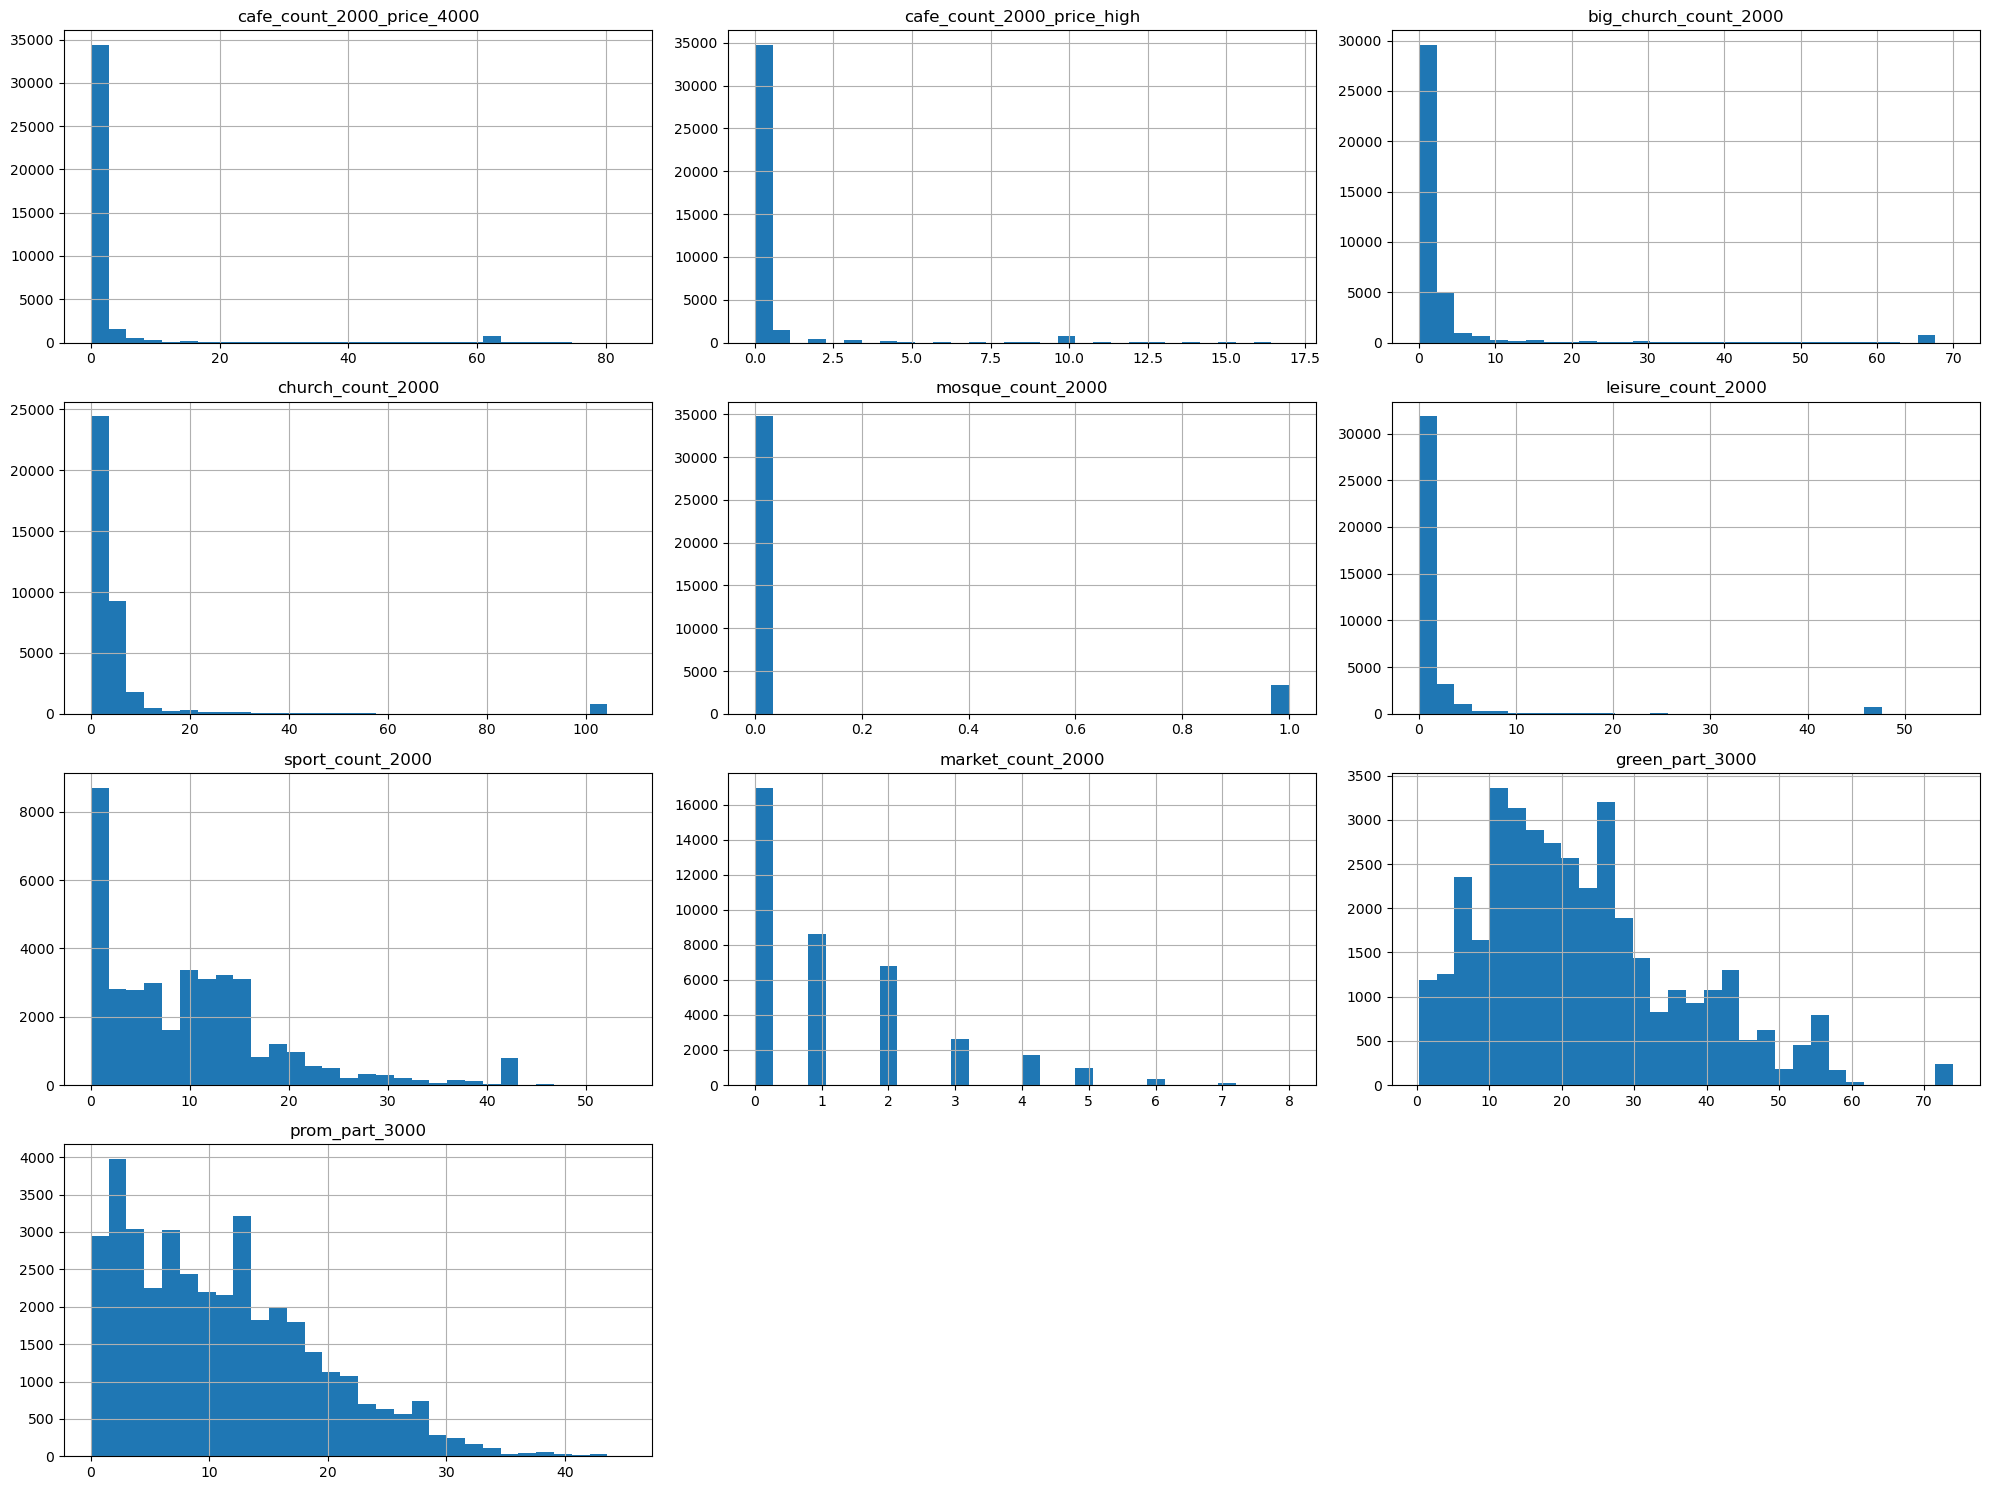

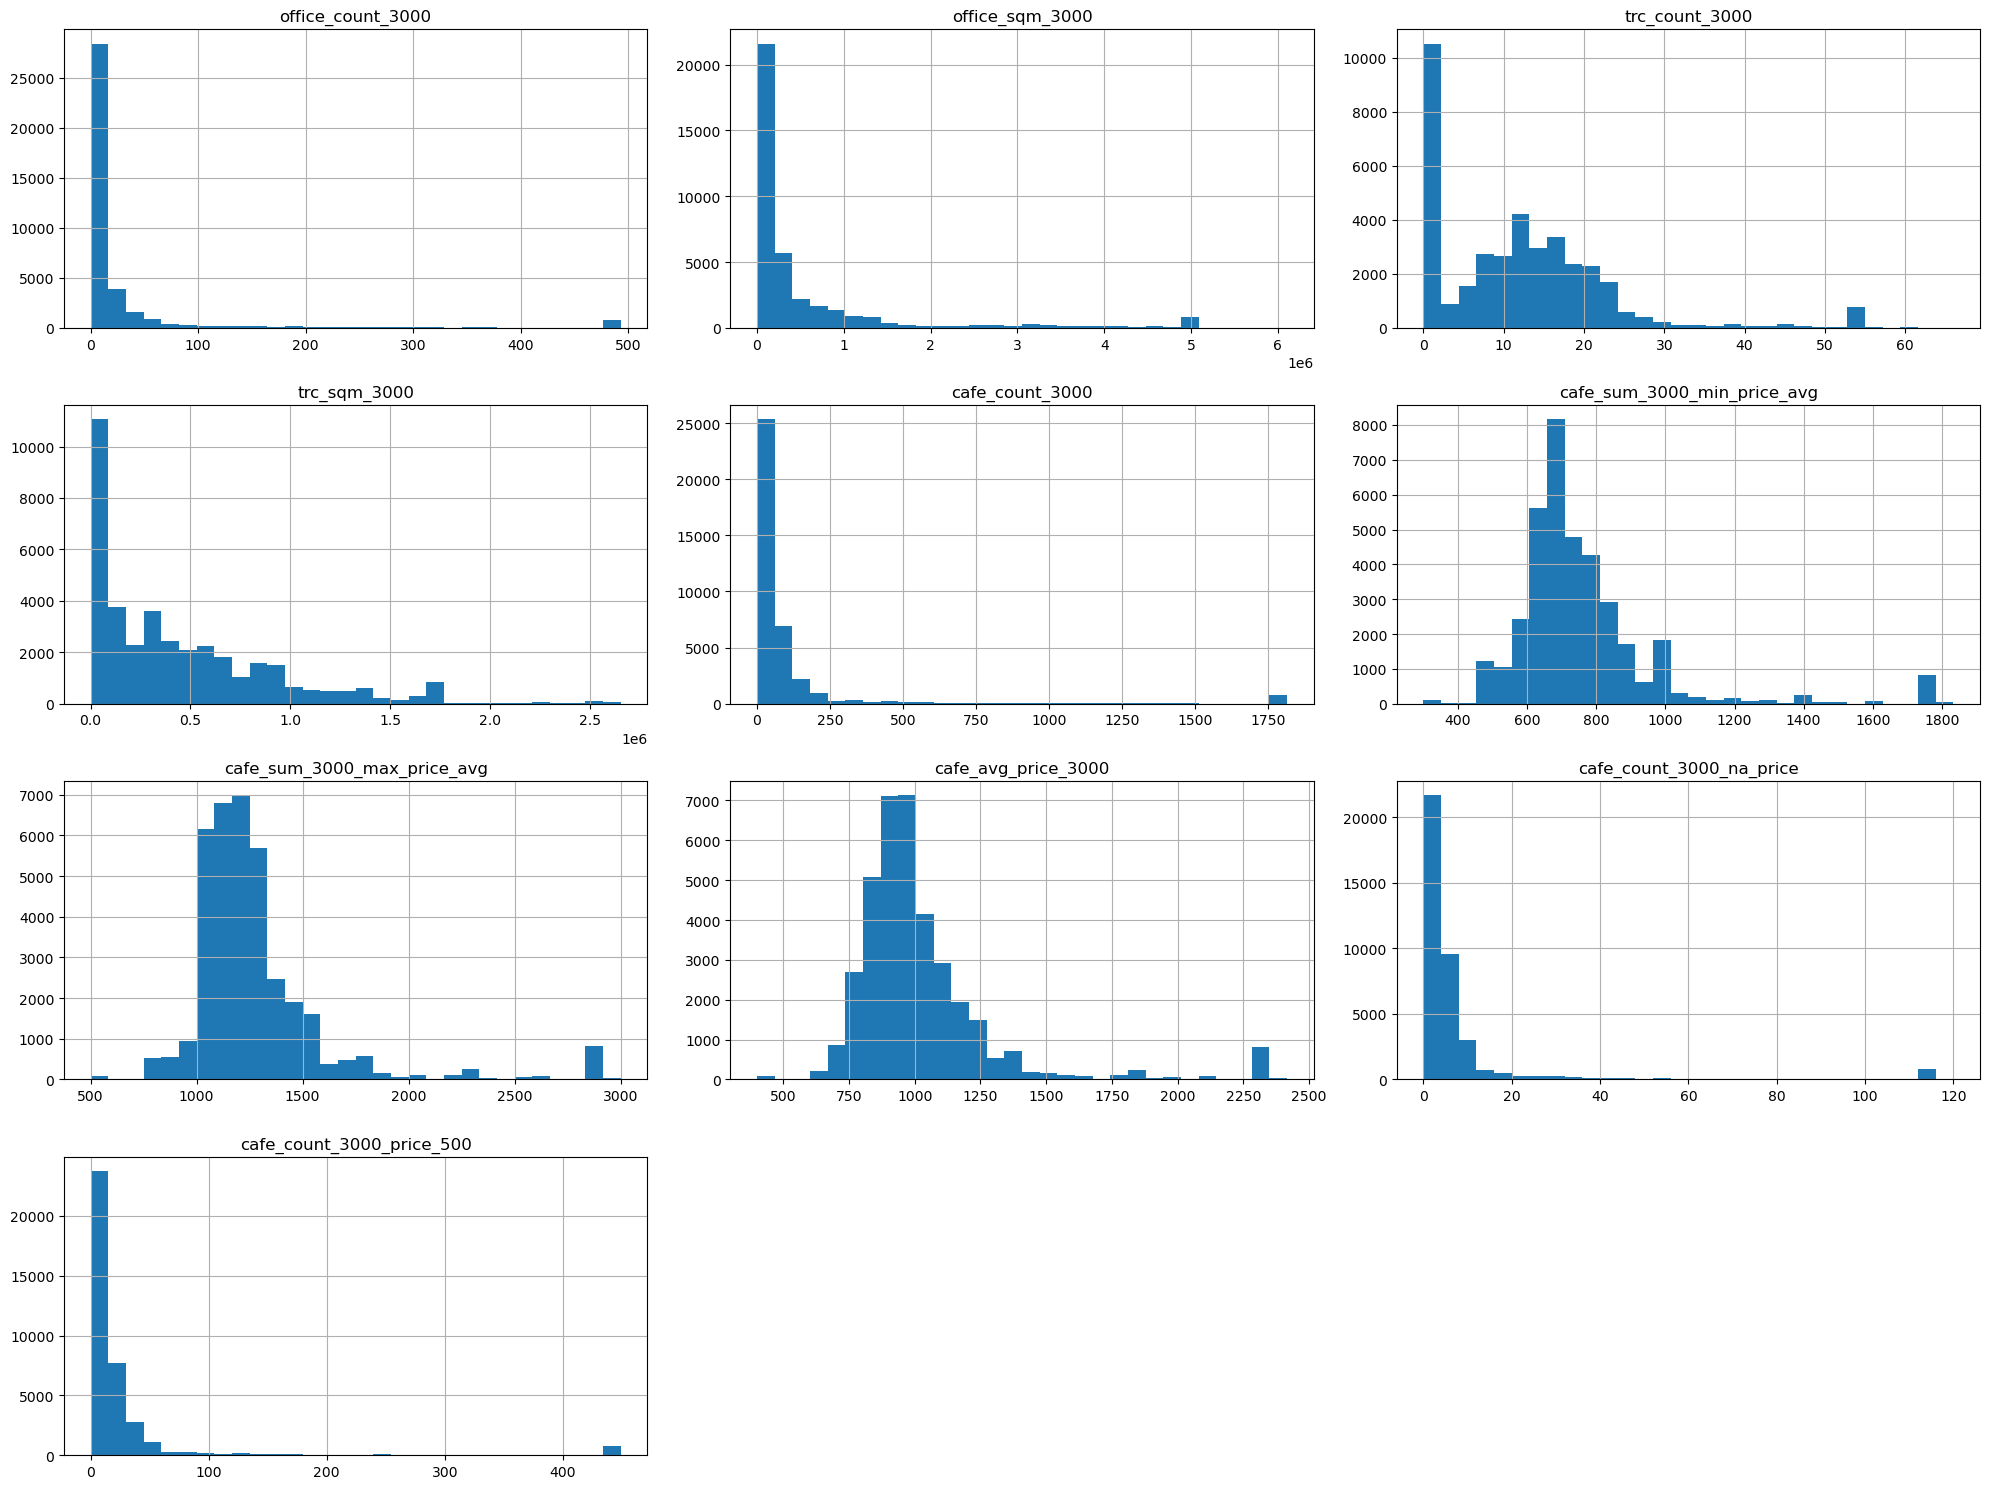

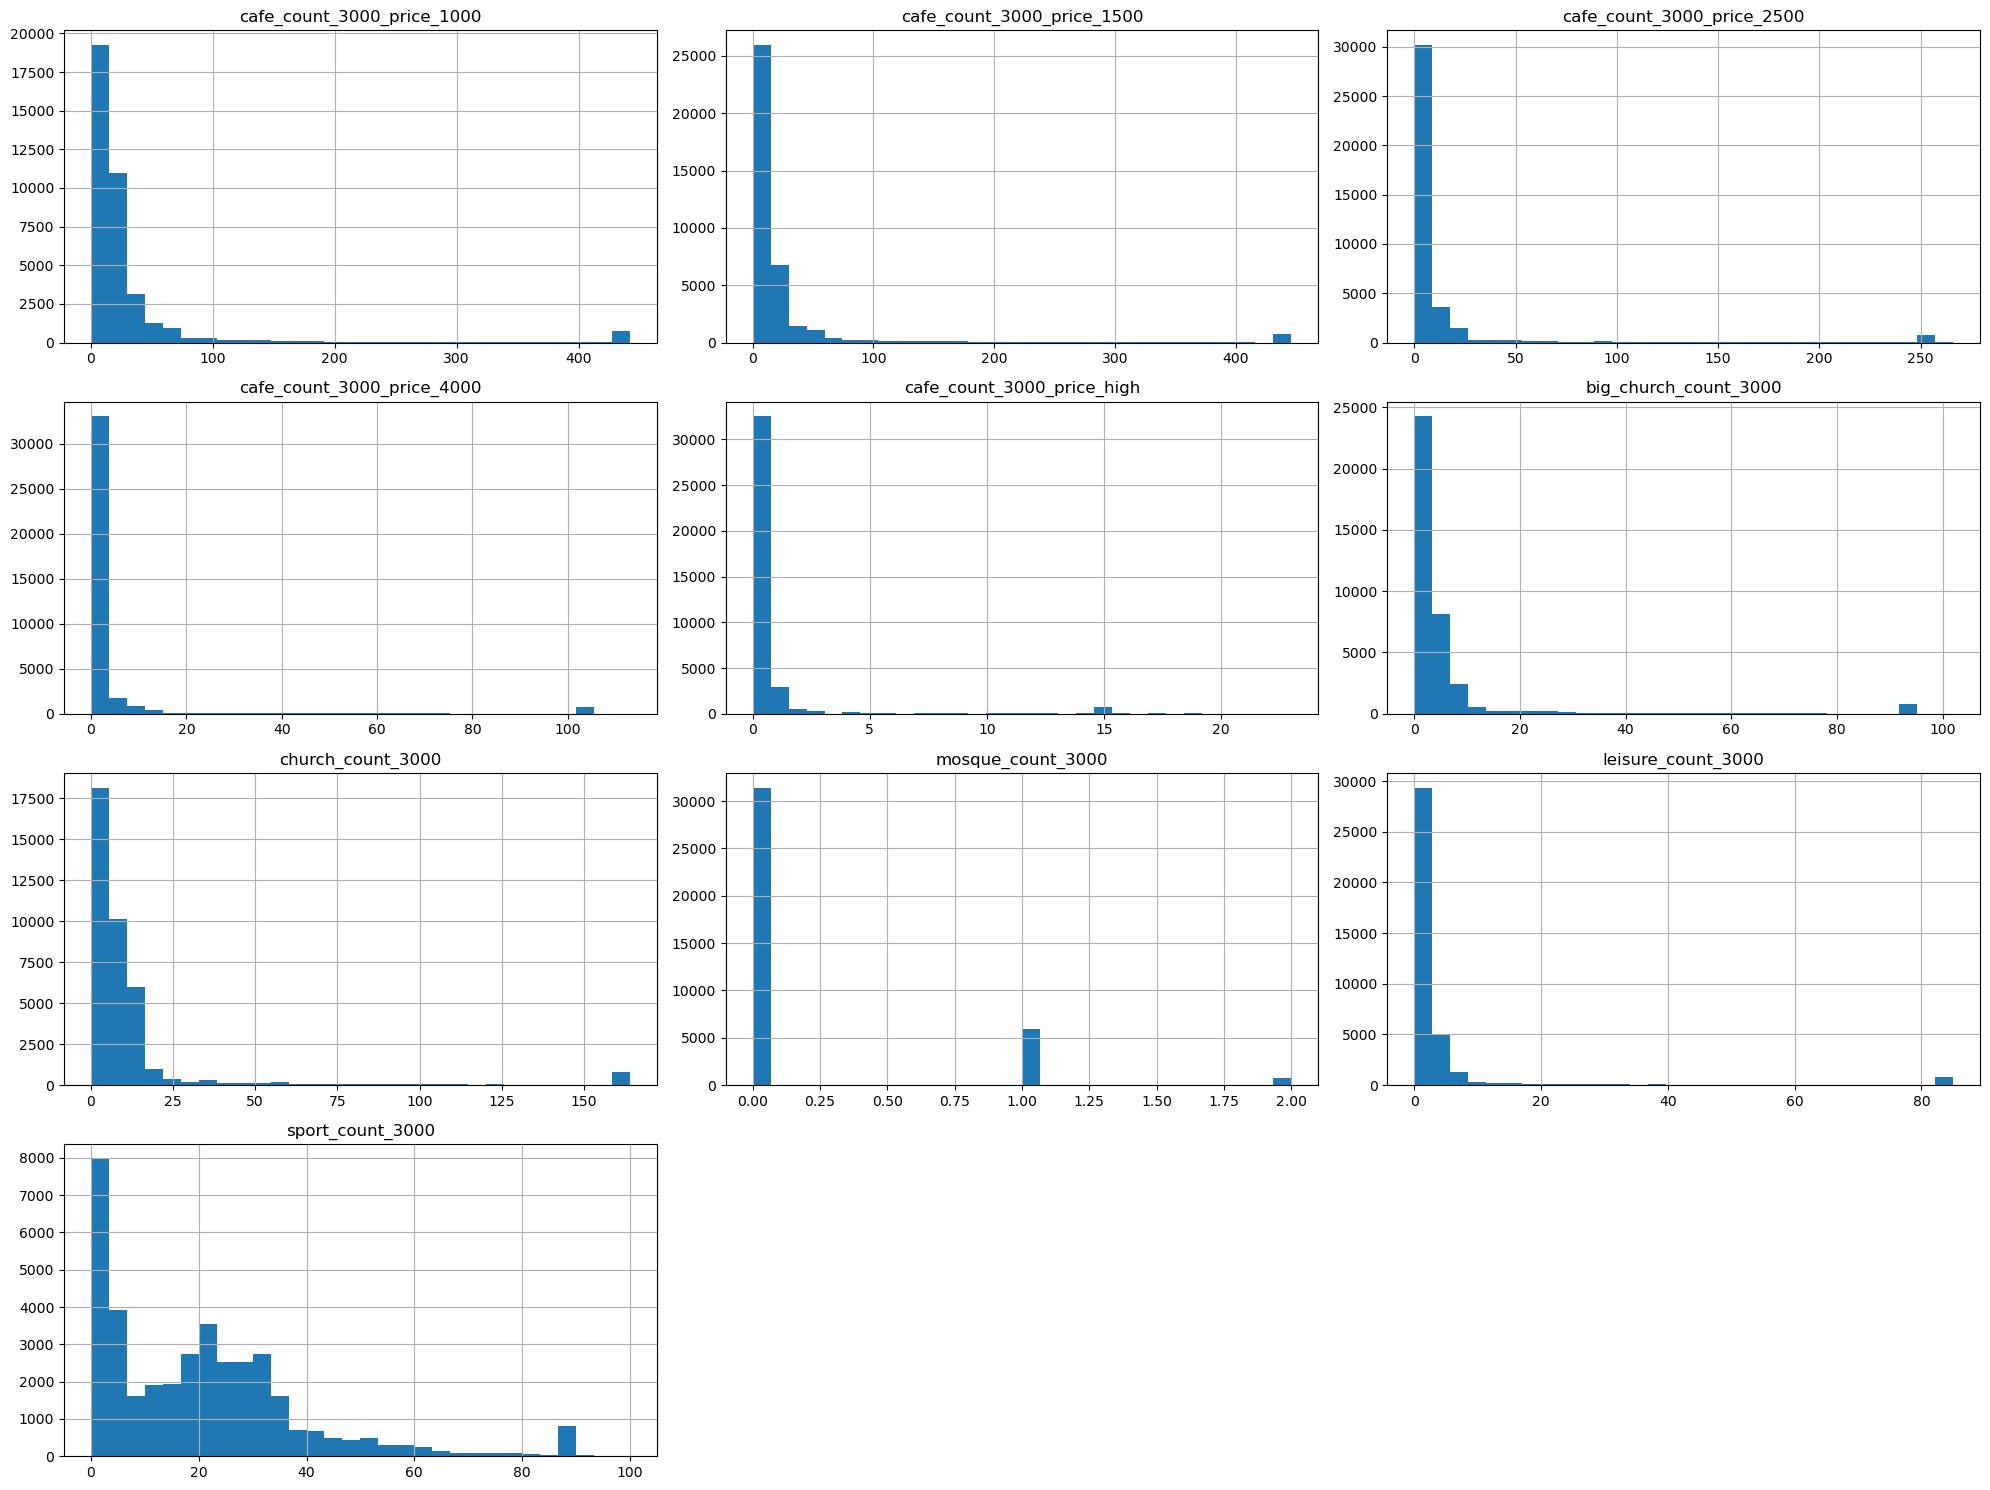

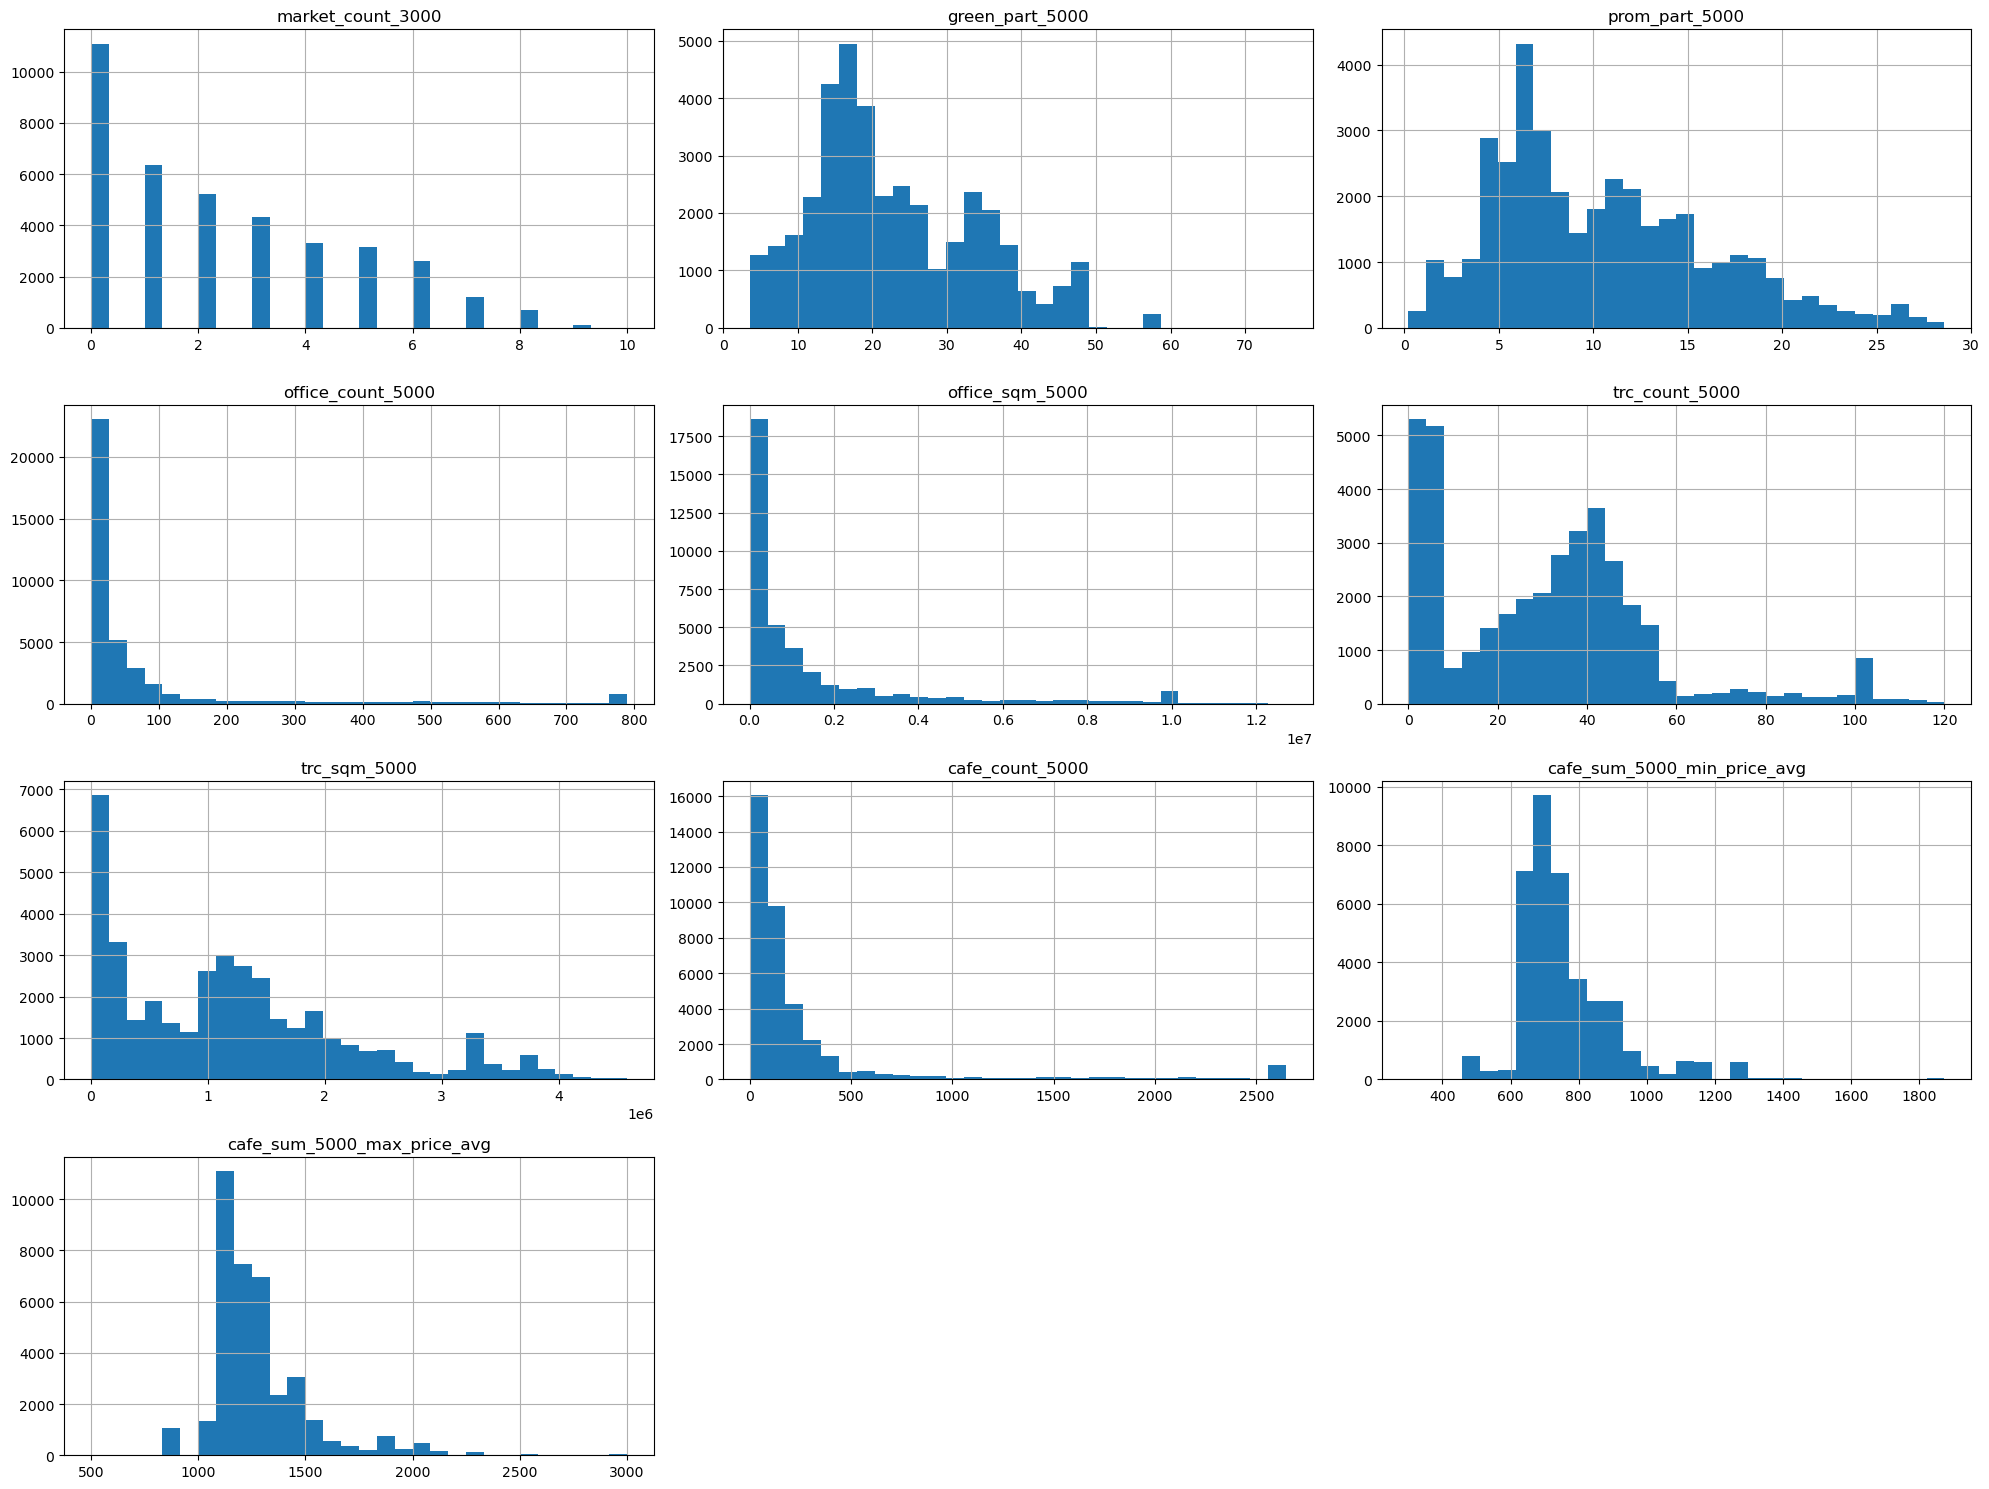

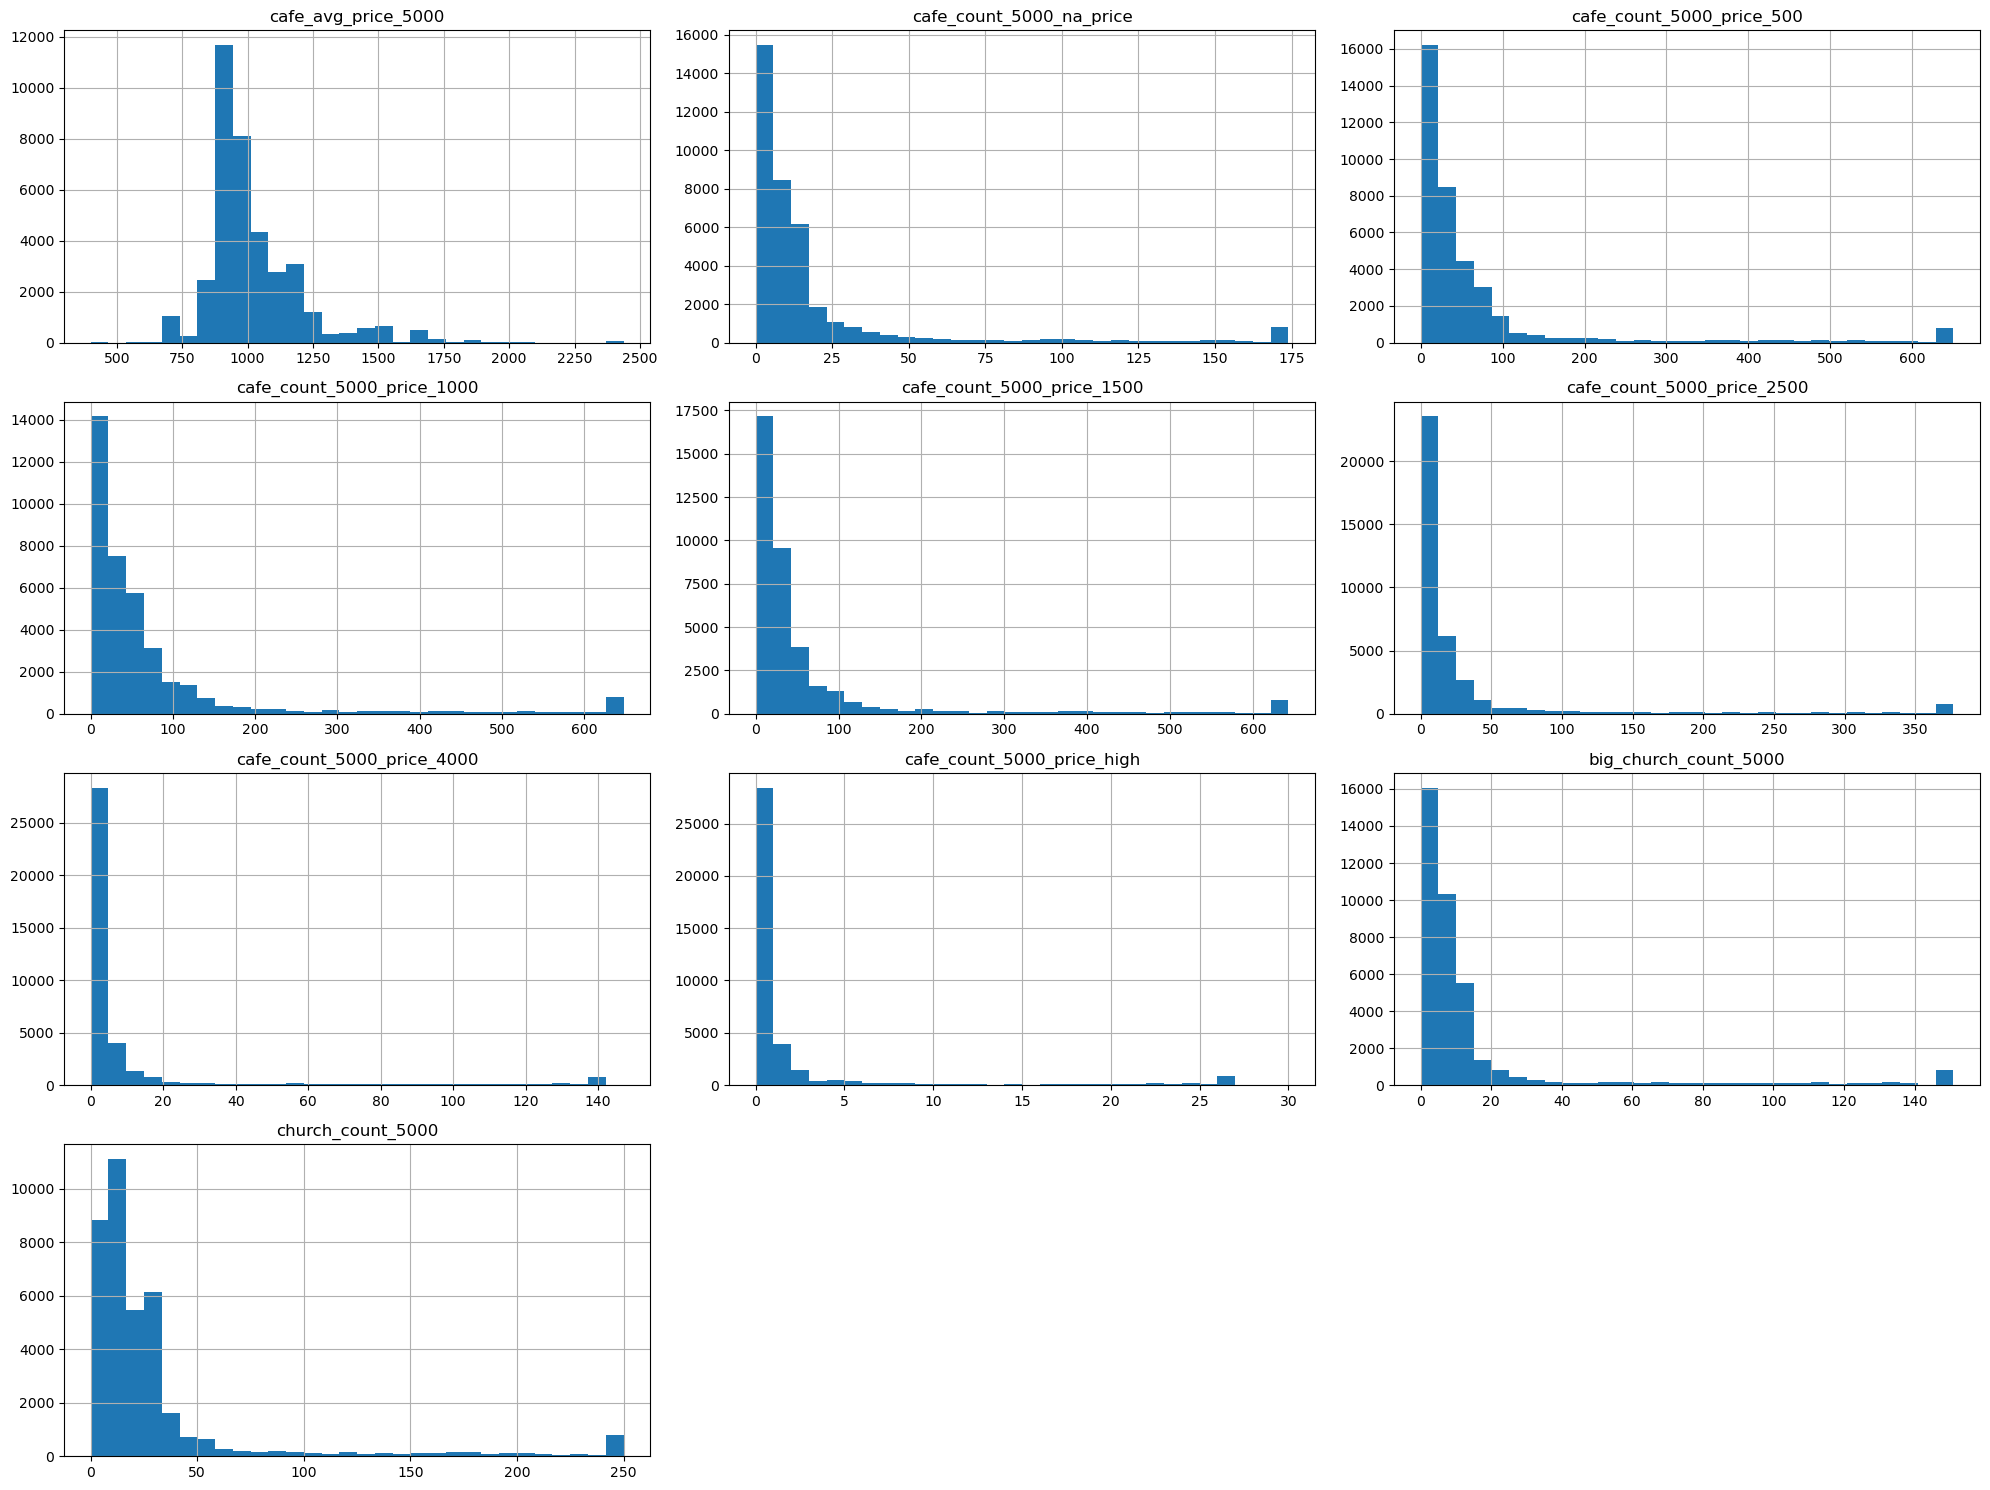

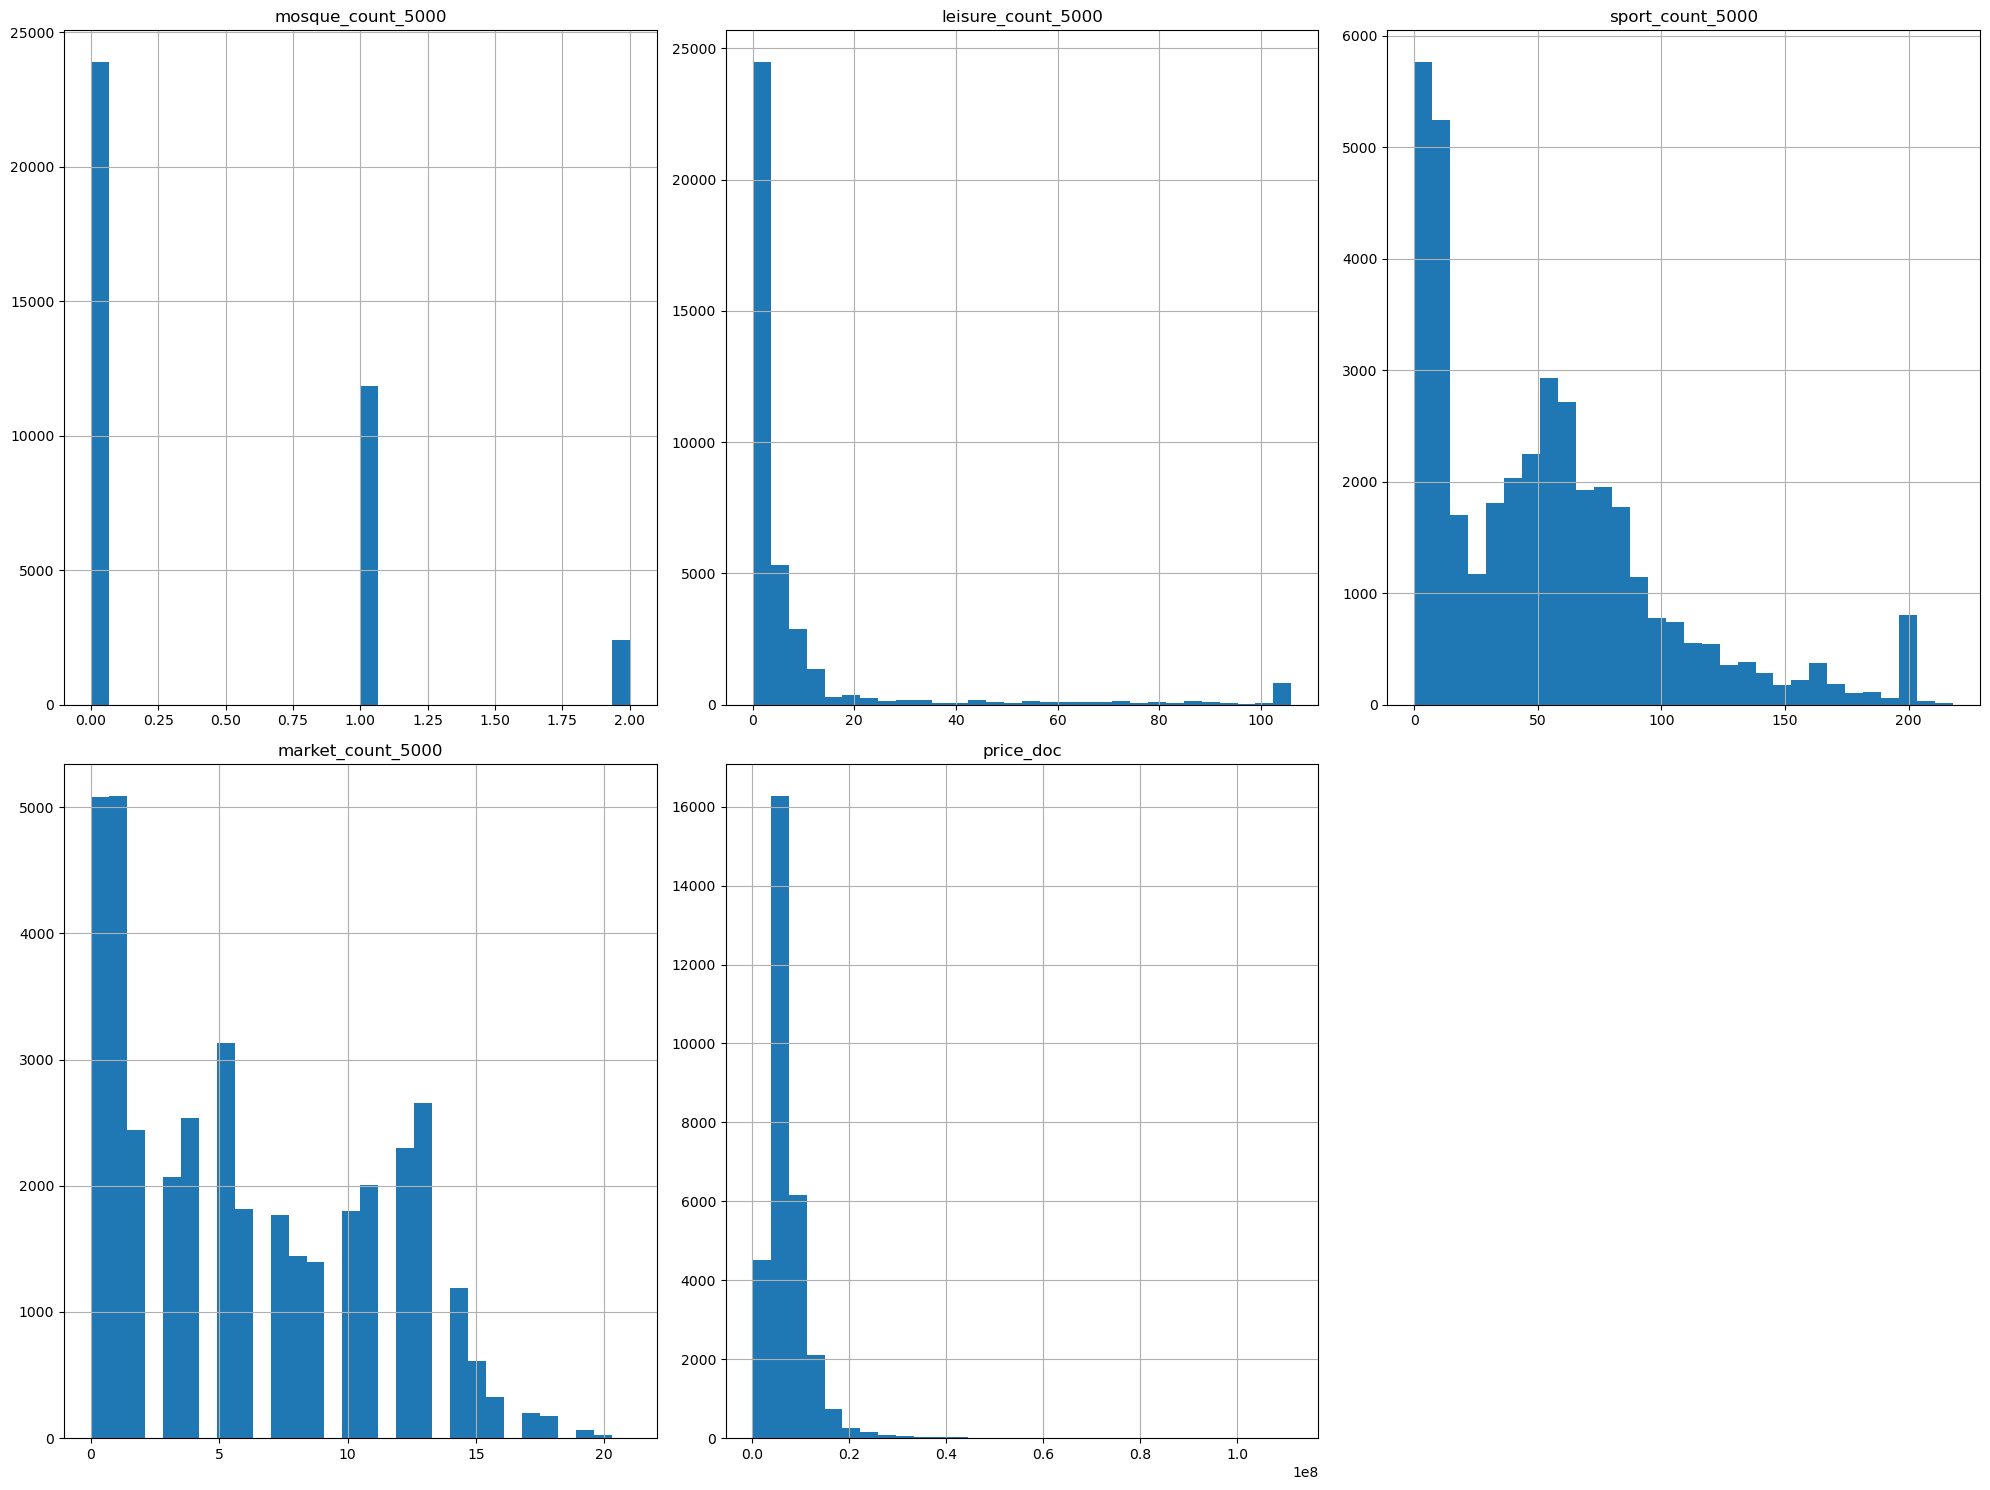

In [48]:
# Define a function to plot histograms in groups
def plot_histograms(df, cols, n_cols=3, figsize=(20, 15)):
    n_rows = (len(cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        df[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(col)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Plot histograms in groups of 10 columns
for i in range(0, len(numeric_columns), 10):
    plot_histograms(df_2, numeric_columns[i:i+10])


#### 6.3- Distributions

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_2 is your DataFrame
numeric_columns = df_2.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))  # Adjusting the size to accommodate all subplots

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the number of rows and columns if necessary
    sns.histplot(df_2[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


#### 6.4- Scatter-Plotting

#### 6.5- Outliers Checking

### 7- Building Model-0 // Benchmark

#### 7.1- Logistic Regression

### 8- Data Cleaning

#### 8.1- Drop Outliers

##### 8.1.1- Balance

##### 8.1.2- EstimatedSalary

#### 8.2- Standart Scaler

### 9- Building Alternative Models

#### 9.1- Model 1 - Decision Trees

#### 9.2- Model 2 - Random Forest

#### 9.3- Model 3 - Gradient Boosting Machines

#### 9.4- Model 4 - xgboost

#### 10- Handling Imbalanced Data

#### 11- Re-Train Models with Balanced Dataset 

### 12- Feature Engineering

#### 12.1 Correlation Test

#### 12.2 Recursive Feature Elimination

### 13- Hyperparameter Tuning

#### 13.1- Grid Search

#### 13.2- Random Search

### 14- Cross Validation